In [2]:
import numpy as np
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('seaborn')

In [3]:
signals_close = []
signals_open = []

file = open("problem3_data.txt")
readed = file.read().split('\n\n')

for sig in readed:
    sig = sig.split('\n')
    dick = {'1' : signals_close, '2' : signals_open}
    arr = np.array(sig[1].split(), dtype='int16')
    dick[sig[0]].append(arr)

In [4]:
def getX(sig):
    N = sig.size
    return rfftfreq(N, 1 / 256)

def getY(sig):
    yf = rfft(sig)
    return np.abs(yf)

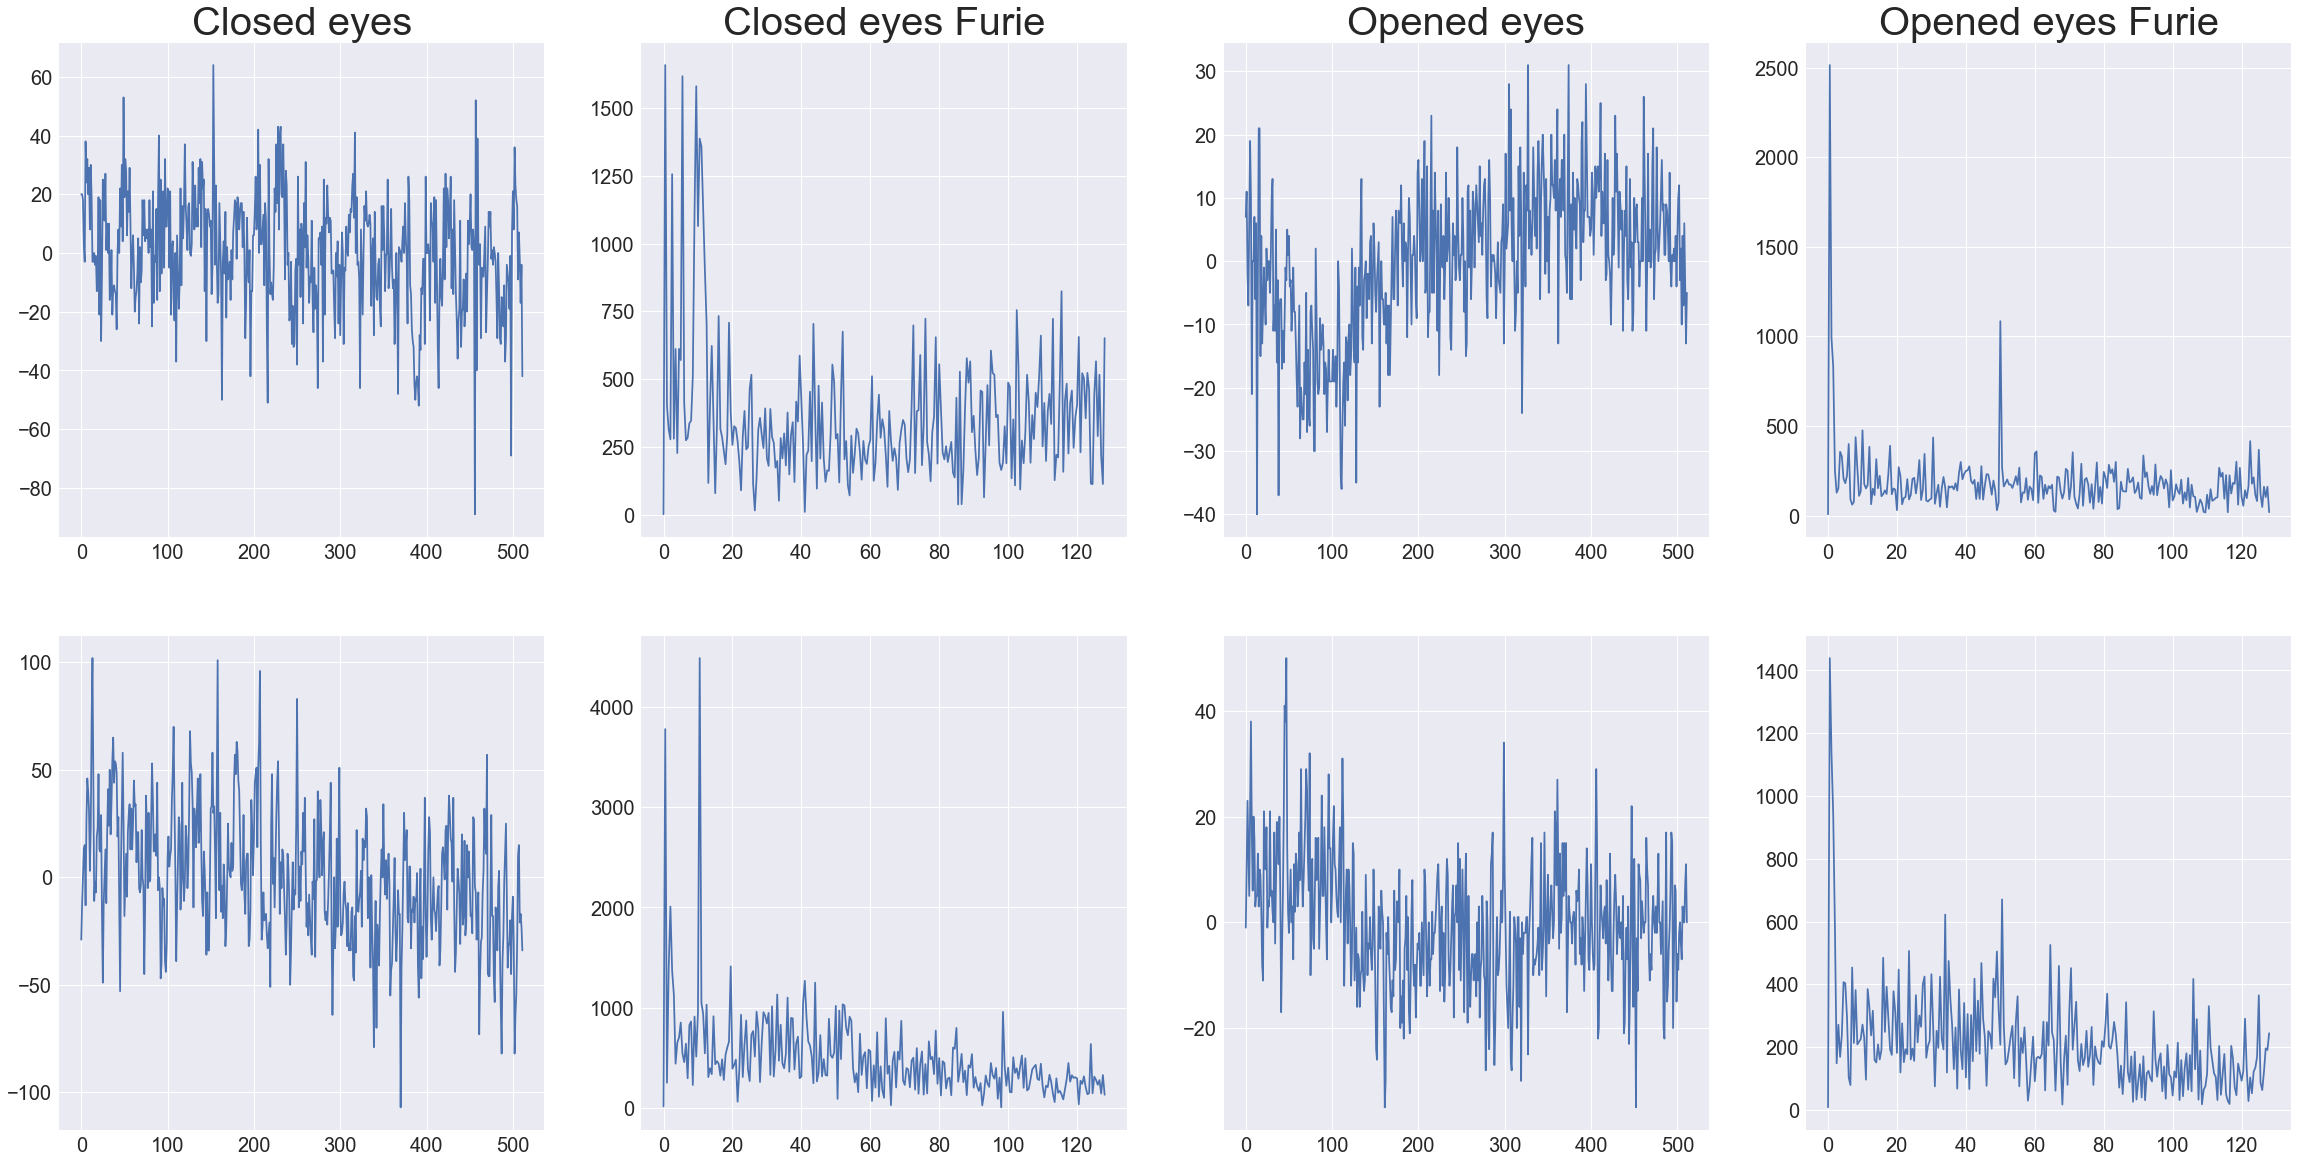

In [18]:
n = 2

fig, axes = plt.subplots(n, 4, figsize=(40, 10 * n))

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=20)

axes[0, 0].set_title('Closed eyes', fontsize=40)
axes[0, 1].set_title('Closed eyes Furie', fontsize=40)
axes[0, 2].set_title('Opened eyes', fontsize=40)
axes[0, 3].set_title('Opened eyes Furie', fontsize=40)

for i in range(n):
    # Close
    axes[i, 0].plot(signals_close[i])
    axes[i, 1].plot(getX(signals_close[i]), getY(signals_close[i]))
    
    # Open
    axes[i, 2].plot(signals_open[i])
    axes[i, 3].plot(getX(signals_open[i]), getY(signals_open[i]))

In [5]:
# from sklearn.model_selection import train_test_split

def getF(sig):
    mY = getY(sig)
    mX = getX(sig)

    
    features = np.concatenate([sig, mY, mX])

    return np.concatenate([mY[:-1], sig])

# x = np.array(list(map(getF, signals_close)) + list(map(getF, signals_open)))

# a = np.full(50, 0)
# b = np.full(49, 1)
# y = np.concatenate([a, b])
# y = tf.keras.utils.to_categorical(y)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

In [21]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score
# import tensorflow as tf
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.models import Sequential

# INIT_LR = 0.02
# EPOCHS = 10
# BATCH_SIZE = 1

# model = Sequential()
# model.add(Dense(512, input_shape=(768,), activation="sigmoid"))
# model.add(Dense(256, activation="sigmoid"))
# model.add(Dense(128, activation="sigmoid"))
# model.add(Dense(64, activation="sigmoid"))
# model.add(Dense(2, activation="softmax"))

# model.compile(loss="binary_crossentropy", optimizer=SGD(lr=INIT_LR), metrics=["accuracy"])

# H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)  

# N = np.arange(0, EPOCHS)

# scores = []

# kfold = KFold(5, shuffle=True, random_state=1)
# for train_i, test_i in kfold.split(x):
        
#     train_x, train_y, test_x, test_y = x[train_i], y[train_i], x[test_i], y[test_i]
        
#     model.fit(train_x, train_y)
#     pred_y = model.predict(test_x)
#     score = accuracy_score(test_y, pred_y)
#     scores.append(score)
        
#     print('>%.3f' % score)

# print('Final Score: %.3f' % (np.mean(scores)))

# plt.legend()
# plt.title("Training Loss and Accuracy (Simple NN)")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")

Train on 79 samples, validate on 20 samples
Epoch 1/10
79/79 [==============================] - 0s 5ms/sample - loss: 0.7392 - acc: 0.4937 - val_loss: 0.8199 - val_acc: 0.4500
Epoch 2/10
79/79 [==============================] - 0s 2ms/sample - loss: 0.7631 - acc: 0.4430 - val_loss: 0.7003 - val_acc: 0.5500
Epoch 3/10
79/79 [==============================] - 0s 2ms/sample - loss: 0.7680 - acc: 0.3797 - val_loss: 0.8766 - val_acc: 0.4500
Epoch 4/10
79/79 [==============================] - 0s 2ms/sample - loss: 0.7661 - acc: 0.4304 - val_loss: 0.8176 - val_acc: 0.4500
Epoch 5/10
79/79 [==============================] - 0s 2ms/sample - loss: 0.7619 - acc: 0.4177 - val_loss: 0.7399 - val_acc: 0.4500
Epoch 6/10
79/79 [==============================] - 0s 2ms/sample - loss: 0.7338 - acc: 0.5190 - val_loss: 0.6914 - val_acc: 0.5500
Epoch 7/10
79/79 [==============================] - 0s 2ms/sample - loss: 0.7445 - acc: 0.5316 - val_loss: 0.7284 - val_acc: 0.4500
Epoch 8/10
79/79 [==============

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

Train on 79 samples, validate on 20 samples
Epoch 1/3000
79/79 [==============================] - 1s 7ms/sample - loss: 0.6996 - acc: 0.4810 - val_loss: 0.6916 - val_acc: 0.5500
Epoch 2/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6940 - acc: 0.4810 - val_loss: 0.6937 - val_acc: 0.4500
Epoch 3/3000
79/79 [==============================] - 0s 189us/sample - loss: 0.6922 - acc: 0.5190 - val_loss: 0.6962 - val_acc: 0.4500
Epoch 4/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6936 - acc: 0.4430 - val_loss: 0.7016 - val_acc: 0.4500
Epoch 5/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.6913 - acc: 0.5190 - val_loss: 0.6986 - val_acc: 0.4500
Epoch 6/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.6906 - acc: 0.5190 - val_loss: 0.6991 - val_acc: 0.4500
Epoch 7/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.6965 - acc: 0.5190 - val_loss: 0.6930 - val_acc: 0.5500
Epoch 

79/79 [==============================] - 0s 151us/sample - loss: 0.6873 - acc: 0.5823 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 61/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.6892 - acc: 0.5823 - val_loss: 0.6928 - val_acc: 0.5500
Epoch 62/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6882 - acc: 0.5823 - val_loss: 0.6937 - val_acc: 0.4000
Epoch 63/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.6876 - acc: 0.7215 - val_loss: 0.6941 - val_acc: 0.3500
Epoch 64/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.6882 - acc: 0.6962 - val_loss: 0.6976 - val_acc: 0.4500
Epoch 65/3000
79/79 [==============================] - 0s 178us/sample - loss: 0.6894 - acc: 0.5316 - val_loss: 0.6961 - val_acc: 0.4500
Epoch 66/3000
79/79 [==============================] - 0s 111us/sample - loss: 0.6875 - acc: 0.5190 - val_loss: 0.6948 - val_acc: 0.4000
Epoch 67/3000
79/79 [==============================] - 

Epoch 120/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.6845 - acc: 0.5190 - val_loss: 0.6976 - val_acc: 0.4500
Epoch 121/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6858 - acc: 0.5696 - val_loss: 0.6971 - val_acc: 0.4500
Epoch 122/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6859 - acc: 0.6456 - val_loss: 0.7020 - val_acc: 0.4500
Epoch 123/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6852 - acc: 0.5190 - val_loss: 0.7043 - val_acc: 0.4500
Epoch 124/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6849 - acc: 0.5190 - val_loss: 0.7040 - val_acc: 0.4500
Epoch 125/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.6856 - acc: 0.5190 - val_loss: 0.7027 - val_acc: 0.4500
Epoch 126/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.6845 - acc: 0.5190 - val_loss: 0.6987 - val_acc: 0.4500
Epoch 127/3000
79/79 [============

79/79 [==============================] - 0s 139us/sample - loss: 0.6823 - acc: 0.6076 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 180/3000
79/79 [==============================] - 0s 158us/sample - loss: 0.6815 - acc: 0.7342 - val_loss: 0.6954 - val_acc: 0.4500
Epoch 181/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.6826 - acc: 0.7089 - val_loss: 0.7004 - val_acc: 0.4500
Epoch 182/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6837 - acc: 0.5190 - val_loss: 0.6969 - val_acc: 0.4500
Epoch 183/3000
79/79 [==============================] - 0s 140us/sample - loss: 0.6825 - acc: 0.5190 - val_loss: 0.6950 - val_acc: 0.4000
Epoch 184/3000
79/79 [==============================] - 0s 150us/sample - loss: 0.6828 - acc: 0.7595 - val_loss: 0.6975 - val_acc: 0.4500
Epoch 185/3000
79/79 [==============================] - 0s 157us/sample - loss: 0.6809 - acc: 0.5316 - val_loss: 0.6978 - val_acc: 0.4500
Epoch 186/3000
79/79 [===========================

79/79 [==============================] - 0s 155us/sample - loss: 0.6783 - acc: 0.5190 - val_loss: 0.6997 - val_acc: 0.4500
Epoch 239/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6787 - acc: 0.5190 - val_loss: 0.7022 - val_acc: 0.4500
Epoch 240/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6801 - acc: 0.5190 - val_loss: 0.6956 - val_acc: 0.4500
Epoch 241/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6780 - acc: 0.5696 - val_loss: 0.6952 - val_acc: 0.4000
Epoch 242/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6783 - acc: 0.7722 - val_loss: 0.6985 - val_acc: 0.4500
Epoch 243/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6801 - acc: 0.5190 - val_loss: 0.6956 - val_acc: 0.4500
Epoch 244/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6793 - acc: 0.7595 - val_loss: 0.6980 - val_acc: 0.4500
Epoch 245/3000
79/79 [===========================

79/79 [==============================] - 0s 139us/sample - loss: 0.6740 - acc: 0.5949 - val_loss: 0.6966 - val_acc: 0.4500
Epoch 298/3000
79/79 [==============================] - 0s 157us/sample - loss: 0.6742 - acc: 0.6456 - val_loss: 0.6983 - val_acc: 0.4500
Epoch 299/3000
79/79 [==============================] - 0s 160us/sample - loss: 0.6759 - acc: 0.6203 - val_loss: 0.7028 - val_acc: 0.4500
Epoch 300/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6751 - acc: 0.5190 - val_loss: 0.6984 - val_acc: 0.4500
Epoch 301/3000
79/79 [==============================] - 0s 157us/sample - loss: 0.6741 - acc: 0.5443 - val_loss: 0.6983 - val_acc: 0.4500
Epoch 302/3000
79/79 [==============================] - 0s 167us/sample - loss: 0.6739 - acc: 0.5190 - val_loss: 0.6969 - val_acc: 0.4500
Epoch 303/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6735 - acc: 0.5316 - val_loss: 0.6971 - val_acc: 0.4500
Epoch 304/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6706 - acc: 0.5316 - val_loss: 0.6952 - val_acc: 0.4000
Epoch 357/3000
79/79 [==============================] - 0s 141us/sample - loss: 0.6690 - acc: 0.7468 - val_loss: 0.6958 - val_acc: 0.4000
Epoch 358/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.6708 - acc: 0.6076 - val_loss: 0.6971 - val_acc: 0.4500
Epoch 359/3000
79/79 [==============================] - 0s 189us/sample - loss: 0.6691 - acc: 0.5696 - val_loss: 0.6959 - val_acc: 0.4000
Epoch 360/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6700 - acc: 0.7215 - val_loss: 0.7004 - val_acc: 0.4500
Epoch 361/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.6699 - acc: 0.5316 - val_loss: 0.7005 - val_acc: 0.4500
Epoch 362/3000
79/79 [==============================] - 0s 144us/sample - loss: 0.6691 - acc: 0.5190 - val_loss: 0.6978 - val_acc: 0.4500
Epoch 363/3000
79/79 [===========================

79/79 [==============================] - 0s 252us/sample - loss: 0.6640 - acc: 0.5316 - val_loss: 0.6933 - val_acc: 0.5500
Epoch 416/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6666 - acc: 0.7848 - val_loss: 0.6945 - val_acc: 0.4500
Epoch 417/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.6631 - acc: 0.7722 - val_loss: 0.6951 - val_acc: 0.4000
Epoch 418/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6626 - acc: 0.7468 - val_loss: 0.6941 - val_acc: 0.4500
Epoch 419/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6635 - acc: 0.6835 - val_loss: 0.6914 - val_acc: 0.5500
Epoch 420/3000
79/79 [==============================] - 0s 189us/sample - loss: 0.6641 - acc: 0.7975 - val_loss: 0.6898 - val_acc: 0.5500
Epoch 421/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6638 - acc: 0.8481 - val_loss: 0.6897 - val_acc: 0.5000
Epoch 422/3000
79/79 [===========================

79/79 [==============================] - 0s 139us/sample - loss: 0.6571 - acc: 0.6329 - val_loss: 0.6990 - val_acc: 0.4500
Epoch 475/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.6554 - acc: 0.5823 - val_loss: 0.6977 - val_acc: 0.4500
Epoch 476/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.6550 - acc: 0.6329 - val_loss: 0.6970 - val_acc: 0.4000
Epoch 477/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.6571 - acc: 0.7089 - val_loss: 0.7023 - val_acc: 0.4500
Epoch 478/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6586 - acc: 0.5696 - val_loss: 0.7066 - val_acc: 0.4500
Epoch 479/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6586 - acc: 0.5190 - val_loss: 0.6970 - val_acc: 0.4000
Epoch 480/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.6543 - acc: 0.6076 - val_loss: 0.6962 - val_acc: 0.4000
Epoch 481/3000
79/79 [===========================

79/79 [==============================] - 0s 147us/sample - loss: 0.6459 - acc: 0.5696 - val_loss: 0.6966 - val_acc: 0.4000
Epoch 534/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.6447 - acc: 0.6962 - val_loss: 0.6939 - val_acc: 0.4500
Epoch 535/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6448 - acc: 0.7342 - val_loss: 0.6899 - val_acc: 0.5500
Epoch 536/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6471 - acc: 0.8861 - val_loss: 0.6966 - val_acc: 0.4000
Epoch 537/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.6444 - acc: 0.6962 - val_loss: 0.6969 - val_acc: 0.4000
Epoch 538/3000
79/79 [==============================] - 0s 165us/sample - loss: 0.6441 - acc: 0.6456 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 539/3000
79/79 [==============================] - 0s 146us/sample - loss: 0.6432 - acc: 0.7975 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 540/3000
79/79 [===========================

79/79 [==============================] - 0s 152us/sample - loss: 0.6305 - acc: 0.8228 - val_loss: 0.6883 - val_acc: 0.5500
Epoch 593/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6304 - acc: 0.9241 - val_loss: 0.6917 - val_acc: 0.5000
Epoch 594/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6314 - acc: 0.7975 - val_loss: 0.6866 - val_acc: 0.5500
Epoch 595/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.6307 - acc: 0.9114 - val_loss: 0.6850 - val_acc: 0.6000
Epoch 596/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6300 - acc: 0.9620 - val_loss: 0.6856 - val_acc: 0.5000
Epoch 597/3000
79/79 [==============================] - 0s 157us/sample - loss: 0.6293 - acc: 0.9367 - val_loss: 0.6881 - val_acc: 0.5500
Epoch 598/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.6303 - acc: 0.8734 - val_loss: 0.6872 - val_acc: 0.6000
Epoch 599/3000
79/79 [===========================

79/79 [==============================] - 0s 128us/sample - loss: 0.6119 - acc: 0.9241 - val_loss: 0.6845 - val_acc: 0.5500
Epoch 652/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6139 - acc: 0.9241 - val_loss: 0.6828 - val_acc: 0.5500
Epoch 653/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6112 - acc: 0.9494 - val_loss: 0.6840 - val_acc: 0.5500
Epoch 654/3000
79/79 [==============================] - 0s 194us/sample - loss: 0.6113 - acc: 0.9494 - val_loss: 0.6838 - val_acc: 0.5500
Epoch 655/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6111 - acc: 0.9494 - val_loss: 0.6830 - val_acc: 0.6000
Epoch 656/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.6102 - acc: 0.9494 - val_loss: 0.6852 - val_acc: 0.6000
Epoch 657/3000
79/79 [==============================] - 0s 147us/sample - loss: 0.6094 - acc: 0.9367 - val_loss: 0.6872 - val_acc: 0.5500
Epoch 658/3000
79/79 [===========================

79/79 [==============================] - 0s 151us/sample - loss: 0.5859 - acc: 0.9494 - val_loss: 0.6826 - val_acc: 0.6000
Epoch 711/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.5854 - acc: 0.9494 - val_loss: 0.6831 - val_acc: 0.6000
Epoch 712/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.5868 - acc: 0.9241 - val_loss: 0.6801 - val_acc: 0.6000
Epoch 713/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.5855 - acc: 0.9494 - val_loss: 0.6808 - val_acc: 0.6000
Epoch 714/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.5845 - acc: 0.9620 - val_loss: 0.6797 - val_acc: 0.5500
Epoch 715/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.5840 - acc: 0.9494 - val_loss: 0.6821 - val_acc: 0.6000
Epoch 716/3000
79/79 [==============================] - 0s 155us/sample - loss: 0.5829 - acc: 0.9494 - val_loss: 0.6814 - val_acc: 0.5500
Epoch 717/3000
79/79 [===========================

79/79 [==============================] - 0s 152us/sample - loss: 0.5513 - acc: 0.9620 - val_loss: 0.6760 - val_acc: 0.6000
Epoch 770/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.5522 - acc: 0.9620 - val_loss: 0.6766 - val_acc: 0.6000
Epoch 771/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.5505 - acc: 0.9620 - val_loss: 0.6754 - val_acc: 0.6000
Epoch 772/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.5494 - acc: 0.9494 - val_loss: 0.6768 - val_acc: 0.6000
Epoch 773/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.5498 - acc: 0.9367 - val_loss: 0.6809 - val_acc: 0.6000
Epoch 774/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.5511 - acc: 0.9494 - val_loss: 0.6782 - val_acc: 0.6000
Epoch 775/3000
79/79 [==============================] - 0s 161us/sample - loss: 0.5469 - acc: 0.9620 - val_loss: 0.6785 - val_acc: 0.6000
Epoch 776/3000
79/79 [===========================

79/79 [==============================] - 0s 143us/sample - loss: 0.5047 - acc: 0.9494 - val_loss: 0.6727 - val_acc: 0.6000
Epoch 829/3000
79/79 [==============================] - 0s 163us/sample - loss: 0.5035 - acc: 0.9620 - val_loss: 0.6719 - val_acc: 0.6000
Epoch 830/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.5030 - acc: 0.9620 - val_loss: 0.6707 - val_acc: 0.6000
Epoch 831/3000
79/79 [==============================] - 0s 168us/sample - loss: 0.5023 - acc: 0.9494 - val_loss: 0.6727 - val_acc: 0.6000
Epoch 832/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.5021 - acc: 0.9620 - val_loss: 0.6703 - val_acc: 0.6000
Epoch 833/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.5018 - acc: 0.9494 - val_loss: 0.6687 - val_acc: 0.6000
Epoch 834/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.5007 - acc: 0.9494 - val_loss: 0.6702 - val_acc: 0.6000
Epoch 835/3000
79/79 [===========================

79/79 [==============================] - 0s 168us/sample - loss: 0.4467 - acc: 0.9620 - val_loss: 0.6677 - val_acc: 0.6000
Epoch 888/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.4470 - acc: 0.9494 - val_loss: 0.6681 - val_acc: 0.6000
Epoch 889/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.4448 - acc: 0.9620 - val_loss: 0.6673 - val_acc: 0.6000
Epoch 890/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.4452 - acc: 0.9620 - val_loss: 0.6733 - val_acc: 0.6000
Epoch 891/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.4428 - acc: 0.9747 - val_loss: 0.6689 - val_acc: 0.6000
Epoch 892/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.4419 - acc: 0.9747 - val_loss: 0.6661 - val_acc: 0.6000
Epoch 893/3000
79/79 [==============================] - 0s 141us/sample - loss: 0.4422 - acc: 0.9620 - val_loss: 0.6683 - val_acc: 0.6000
Epoch 894/3000
79/79 [===========================

79/79 [==============================] - 0s 161us/sample - loss: 0.3823 - acc: 0.9747 - val_loss: 0.6633 - val_acc: 0.6000
Epoch 947/3000
79/79 [==============================] - 0s 202us/sample - loss: 0.3800 - acc: 0.9620 - val_loss: 0.6641 - val_acc: 0.6000
Epoch 948/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.3817 - acc: 0.9747 - val_loss: 0.6628 - val_acc: 0.6000
Epoch 949/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.3789 - acc: 0.9620 - val_loss: 0.6666 - val_acc: 0.6000
Epoch 950/3000
79/79 [==============================] - 0s 146us/sample - loss: 0.3769 - acc: 0.9747 - val_loss: 0.6688 - val_acc: 0.6000
Epoch 951/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3767 - acc: 0.9747 - val_loss: 0.6681 - val_acc: 0.6000
Epoch 952/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.3753 - acc: 0.9747 - val_loss: 0.6658 - val_acc: 0.6000
Epoch 953/3000
79/79 [===========================

79/79 [==============================] - 0s 163us/sample - loss: 0.3148 - acc: 0.9747 - val_loss: 0.6717 - val_acc: 0.6000
Epoch 1006/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3141 - acc: 0.9873 - val_loss: 0.6719 - val_acc: 0.6000
Epoch 1007/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3121 - acc: 0.9747 - val_loss: 0.6753 - val_acc: 0.6000
Epoch 1008/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.3106 - acc: 0.9873 - val_loss: 0.6734 - val_acc: 0.6000
Epoch 1009/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3092 - acc: 0.9873 - val_loss: 0.6731 - val_acc: 0.6000
Epoch 1010/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.3088 - acc: 0.9873 - val_loss: 0.6753 - val_acc: 0.6000
Epoch 1011/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.3083 - acc: 0.9873 - val_loss: 0.6734 - val_acc: 0.6000
Epoch 1012/3000
79/79 [====================

Epoch 1064/3000
79/79 [==============================] - 0s 147us/sample - loss: 0.2517 - acc: 0.9747 - val_loss: 0.6839 - val_acc: 0.6000
Epoch 1065/3000
79/79 [==============================] - 0s 108us/sample - loss: 0.2527 - acc: 0.9873 - val_loss: 0.6834 - val_acc: 0.6000
Epoch 1066/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.2497 - acc: 0.9747 - val_loss: 0.6845 - val_acc: 0.6000
Epoch 1067/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.2498 - acc: 0.9873 - val_loss: 0.6826 - val_acc: 0.6000
Epoch 1068/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.2498 - acc: 0.9747 - val_loss: 0.6845 - val_acc: 0.6000
Epoch 1069/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.2479 - acc: 0.9873 - val_loss: 0.6817 - val_acc: 0.6000
Epoch 1070/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.2460 - acc: 0.9873 - val_loss: 0.6815 - val_acc: 0.6000
Epoch 1071/3000
79/79 [====

Epoch 1123/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1993 - acc: 1.0000 - val_loss: 0.7094 - val_acc: 0.6000
Epoch 1124/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.1984 - acc: 1.0000 - val_loss: 0.7102 - val_acc: 0.6000
Epoch 1125/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.1976 - acc: 1.0000 - val_loss: 0.7106 - val_acc: 0.6000
Epoch 1126/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.1969 - acc: 1.0000 - val_loss: 0.7118 - val_acc: 0.6000
Epoch 1127/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.1974 - acc: 1.0000 - val_loss: 0.7135 - val_acc: 0.6000
Epoch 1128/3000
79/79 [==============================] - 0s 146us/sample - loss: 0.1952 - acc: 1.0000 - val_loss: 0.7134 - val_acc: 0.6000
Epoch 1129/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.1947 - acc: 1.0000 - val_loss: 0.7157 - val_acc: 0.6000
Epoch 1130/3000
79/79 [====

Epoch 1182/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.1548 - acc: 1.0000 - val_loss: 0.7399 - val_acc: 0.6000
Epoch 1183/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.1540 - acc: 1.0000 - val_loss: 0.7403 - val_acc: 0.6000
Epoch 1184/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.1532 - acc: 1.0000 - val_loss: 0.7410 - val_acc: 0.6000
Epoch 1185/3000
79/79 [==============================] - 0s 161us/sample - loss: 0.1527 - acc: 1.0000 - val_loss: 0.7420 - val_acc: 0.6000
Epoch 1186/3000
79/79 [==============================] - 0s 185us/sample - loss: 0.1522 - acc: 1.0000 - val_loss: 0.7425 - val_acc: 0.6000
Epoch 1187/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.1521 - acc: 1.0000 - val_loss: 0.7428 - val_acc: 0.6000
Epoch 1188/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.1512 - acc: 1.0000 - val_loss: 0.7434 - val_acc: 0.6000
Epoch 1189/3000
79/79 [====

Epoch 1241/3000
79/79 [==============================] - 0s 147us/sample - loss: 0.1219 - acc: 1.0000 - val_loss: 0.7727 - val_acc: 0.6000
Epoch 1242/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.1218 - acc: 1.0000 - val_loss: 0.7733 - val_acc: 0.6000
Epoch 1243/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.1219 - acc: 1.0000 - val_loss: 0.7738 - val_acc: 0.6000
Epoch 1244/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1206 - acc: 1.0000 - val_loss: 0.7744 - val_acc: 0.6000
Epoch 1245/3000
79/79 [==============================] - 0s 142us/sample - loss: 0.1200 - acc: 1.0000 - val_loss: 0.7748 - val_acc: 0.6000
Epoch 1246/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.1194 - acc: 1.0000 - val_loss: 0.7758 - val_acc: 0.6000
Epoch 1247/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.1188 - acc: 1.0000 - val_loss: 0.7760 - val_acc: 0.6000
Epoch 1248/3000
79/79 [====

Epoch 1300/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0970 - acc: 1.0000 - val_loss: 0.8074 - val_acc: 0.5500
Epoch 1301/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0962 - acc: 1.0000 - val_loss: 0.8076 - val_acc: 0.6000
Epoch 1302/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0957 - acc: 1.0000 - val_loss: 0.8084 - val_acc: 0.6000
Epoch 1303/3000
79/79 [==============================] - 0s 158us/sample - loss: 0.0951 - acc: 1.0000 - val_loss: 0.8086 - val_acc: 0.6000
Epoch 1304/3000
79/79 [==============================] - 0s 202us/sample - loss: 0.0946 - acc: 1.0000 - val_loss: 0.8091 - val_acc: 0.5500
Epoch 1305/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0942 - acc: 1.0000 - val_loss: 0.8096 - val_acc: 0.6000
Epoch 1306/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0942 - acc: 1.0000 - val_loss: 0.8104 - val_acc: 0.6000
Epoch 1307/3000
79/79 [====

79/79 [==============================] - 0s 126us/sample - loss: 0.0774 - acc: 1.0000 - val_loss: 0.8392 - val_acc: 0.5500
Epoch 1359/3000
79/79 [==============================] - 0s 172us/sample - loss: 0.0771 - acc: 1.0000 - val_loss: 0.8401 - val_acc: 0.5500
Epoch 1360/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0769 - acc: 1.0000 - val_loss: 0.8411 - val_acc: 0.5500
Epoch 1361/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0767 - acc: 1.0000 - val_loss: 0.8408 - val_acc: 0.5500
Epoch 1362/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0764 - acc: 1.0000 - val_loss: 0.8413 - val_acc: 0.5500
Epoch 1363/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0757 - acc: 1.0000 - val_loss: 0.8419 - val_acc: 0.5500
Epoch 1364/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0757 - acc: 1.0000 - val_loss: 0.8426 - val_acc: 0.5500
Epoch 1365/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0627 - acc: 1.0000 - val_loss: 0.8695 - val_acc: 0.5500
Epoch 1417/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0625 - acc: 1.0000 - val_loss: 0.8701 - val_acc: 0.5500
Epoch 1418/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.0626 - acc: 1.0000 - val_loss: 0.8714 - val_acc: 0.5500
Epoch 1419/3000
79/79 [==============================] - 0s 162us/sample - loss: 0.0621 - acc: 1.0000 - val_loss: 0.8717 - val_acc: 0.5500
Epoch 1420/3000
79/79 [==============================] - 0s 154us/sample - loss: 0.0623 - acc: 1.0000 - val_loss: 0.8718 - val_acc: 0.5500
Epoch 1421/3000
79/79 [==============================] - 0s 116us/sample - loss: 0.0617 - acc: 1.0000 - val_loss: 0.8722 - val_acc: 0.5500
Epoch 1422/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0618 - acc: 1.0000 - val_loss: 0.8727 - val_acc: 0.5500
Epoch 1423/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.0514 - acc: 1.0000 - val_loss: 0.8990 - val_acc: 0.5500
Epoch 1476/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0514 - acc: 1.0000 - val_loss: 0.8994 - val_acc: 0.5500
Epoch 1477/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0511 - acc: 1.0000 - val_loss: 0.9001 - val_acc: 0.5500
Epoch 1478/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0511 - acc: 1.0000 - val_loss: 0.9003 - val_acc: 0.5500
Epoch 1479/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0507 - acc: 1.0000 - val_loss: 0.9008 - val_acc: 0.5500
Epoch 1480/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0507 - acc: 1.0000 - val_loss: 0.9015 - val_acc: 0.5500
Epoch 1481/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0507 - acc: 1.0000 - val_loss: 0.9017 - val_acc: 0.5500
Epoch 1482/3000
79/79 [====================

79/79 [==============================] - 0s 151us/sample - loss: 0.0426 - acc: 1.0000 - val_loss: 0.9307 - val_acc: 0.5500
Epoch 1535/3000
79/79 [==============================] - 0s 149us/sample - loss: 0.0424 - acc: 1.0000 - val_loss: 0.9312 - val_acc: 0.5500
Epoch 1536/3000
79/79 [==============================] - 0s 155us/sample - loss: 0.0423 - acc: 1.0000 - val_loss: 0.9321 - val_acc: 0.5500
Epoch 1537/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0422 - acc: 1.0000 - val_loss: 0.9325 - val_acc: 0.5500
Epoch 1538/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0422 - acc: 1.0000 - val_loss: 0.9324 - val_acc: 0.5500
Epoch 1539/3000
79/79 [==============================] - 0s 150us/sample - loss: 0.0419 - acc: 1.0000 - val_loss: 0.9328 - val_acc: 0.5500
Epoch 1540/3000
79/79 [==============================] - 0s 189us/sample - loss: 0.0418 - acc: 1.0000 - val_loss: 0.9335 - val_acc: 0.5500
Epoch 1541/3000
79/79 [====================

79/79 [==============================] - 0s 152us/sample - loss: 0.0353 - acc: 1.0000 - val_loss: 0.9599 - val_acc: 0.5500
Epoch 1594/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.0352 - acc: 1.0000 - val_loss: 0.9606 - val_acc: 0.5500
Epoch 1595/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.0351 - acc: 1.0000 - val_loss: 0.9608 - val_acc: 0.5500
Epoch 1596/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0350 - acc: 1.0000 - val_loss: 0.9611 - val_acc: 0.5500
Epoch 1597/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0349 - acc: 1.0000 - val_loss: 0.9616 - val_acc: 0.5500
Epoch 1598/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0348 - acc: 1.0000 - val_loss: 0.9620 - val_acc: 0.5500
Epoch 1599/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0347 - acc: 1.0000 - val_loss: 0.9623 - val_acc: 0.5500
Epoch 1600/3000
79/79 [====================

79/79 [==============================] - 0s 164us/sample - loss: 0.0301 - acc: 1.0000 - val_loss: 0.9804 - val_acc: 0.5500
Epoch 1653/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0300 - acc: 1.0000 - val_loss: 0.9812 - val_acc: 0.5500
Epoch 1654/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0300 - acc: 1.0000 - val_loss: 0.9819 - val_acc: 0.5500
Epoch 1655/3000
79/79 [==============================] - 0s 140us/sample - loss: 0.0298 - acc: 1.0000 - val_loss: 0.9821 - val_acc: 0.5500
Epoch 1656/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0298 - acc: 1.0000 - val_loss: 0.9831 - val_acc: 0.5500
Epoch 1657/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0297 - acc: 1.0000 - val_loss: 0.9839 - val_acc: 0.5500
Epoch 1658/3000
79/79 [==============================] - 0s 176us/sample - loss: 0.0296 - acc: 1.0000 - val_loss: 0.9844 - val_acc: 0.5500
Epoch 1659/3000
79/79 [====================

79/79 [==============================] - 0s 128us/sample - loss: 0.0260 - acc: 1.0000 - val_loss: 1.0034 - val_acc: 0.5500
Epoch 1712/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0259 - acc: 1.0000 - val_loss: 1.0033 - val_acc: 0.5500
Epoch 1713/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0259 - acc: 1.0000 - val_loss: 1.0039 - val_acc: 0.5500
Epoch 1714/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0258 - acc: 1.0000 - val_loss: 1.0042 - val_acc: 0.5500
Epoch 1715/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.0257 - acc: 1.0000 - val_loss: 1.0049 - val_acc: 0.5500
Epoch 1716/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0256 - acc: 1.0000 - val_loss: 1.0050 - val_acc: 0.5500
Epoch 1717/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0256 - acc: 1.0000 - val_loss: 1.0056 - val_acc: 0.5500
Epoch 1718/3000
79/79 [====================

Epoch 1770/3000
79/79 [==============================] - 0s 158us/sample - loss: 0.0226 - acc: 1.0000 - val_loss: 1.0235 - val_acc: 0.5500
Epoch 1771/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0225 - acc: 1.0000 - val_loss: 1.0240 - val_acc: 0.5500
Epoch 1772/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0225 - acc: 1.0000 - val_loss: 1.0243 - val_acc: 0.5500
Epoch 1773/3000
79/79 [==============================] - 0s 168us/sample - loss: 0.0224 - acc: 1.0000 - val_loss: 1.0251 - val_acc: 0.5500
Epoch 1774/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0224 - acc: 1.0000 - val_loss: 1.0252 - val_acc: 0.5500
Epoch 1775/3000
79/79 [==============================] - 0s 150us/sample - loss: 0.0223 - acc: 1.0000 - val_loss: 1.0256 - val_acc: 0.5500
Epoch 1776/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0223 - acc: 1.0000 - val_loss: 1.0255 - val_acc: 0.5500
Epoch 1777/3000
79/79 [====

Epoch 1829/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0200 - acc: 1.0000 - val_loss: 1.0428 - val_acc: 0.5500
Epoch 1830/3000
79/79 [==============================] - 0s 145us/sample - loss: 0.0199 - acc: 1.0000 - val_loss: 1.0433 - val_acc: 0.5500
Epoch 1831/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0199 - acc: 1.0000 - val_loss: 1.0443 - val_acc: 0.5500
Epoch 1832/3000
79/79 [==============================] - 0s 159us/sample - loss: 0.0198 - acc: 1.0000 - val_loss: 1.0450 - val_acc: 0.5500
Epoch 1833/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0198 - acc: 1.0000 - val_loss: 1.0461 - val_acc: 0.5500
Epoch 1834/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0198 - acc: 1.0000 - val_loss: 1.0469 - val_acc: 0.5500
Epoch 1835/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0197 - acc: 1.0000 - val_loss: 1.0471 - val_acc: 0.5500
Epoch 1836/3000
79/79 [====

Epoch 1888/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0178 - acc: 1.0000 - val_loss: 1.0630 - val_acc: 0.5500
Epoch 1889/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0177 - acc: 1.0000 - val_loss: 1.0632 - val_acc: 0.5500
Epoch 1890/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0177 - acc: 1.0000 - val_loss: 1.0637 - val_acc: 0.5500
Epoch 1891/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.0177 - acc: 1.0000 - val_loss: 1.0639 - val_acc: 0.5500
Epoch 1892/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0176 - acc: 1.0000 - val_loss: 1.0641 - val_acc: 0.5500
Epoch 1893/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.0176 - acc: 1.0000 - val_loss: 1.0641 - val_acc: 0.5500
Epoch 1894/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.0176 - acc: 1.0000 - val_loss: 1.0642 - val_acc: 0.5500
Epoch 1895/3000
79/79 [====

Epoch 1947/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.0165 - acc: 1.0000 - val_loss: 1.0718 - val_acc: 0.5500
Epoch 1948/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0164 - acc: 1.0000 - val_loss: 1.0711 - val_acc: 0.5500
Epoch 1949/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0164 - acc: 1.0000 - val_loss: 1.0689 - val_acc: 0.5500
Epoch 1950/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0163 - acc: 1.0000 - val_loss: 1.0602 - val_acc: 0.5500
Epoch 1951/3000
79/79 [==============================] - ETA: 0s - loss: 0.0189 - acc: 1.000 - 0s 132us/sample - loss: 0.0164 - acc: 1.0000 - val_loss: 1.0713 - val_acc: 0.5500
Epoch 1952/3000
79/79 [==============================] - 0s 174us/sample - loss: 0.0162 - acc: 1.0000 - val_loss: 1.0587 - val_acc: 0.5500
Epoch 1953/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0163 - acc: 1.0000 - val_loss: 1.0765 - val_a

79/79 [==============================] - 0s 151us/sample - loss: 0.0149 - acc: 1.0000 - val_loss: 1.0722 - val_acc: 0.5500
Epoch 2006/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0148 - acc: 1.0000 - val_loss: 1.0722 - val_acc: 0.5500
Epoch 2007/3000
79/79 [==============================] - 0s 146us/sample - loss: 0.0148 - acc: 1.0000 - val_loss: 1.0730 - val_acc: 0.5500
Epoch 2008/3000
79/79 [==============================] - 0s 146us/sample - loss: 0.0148 - acc: 1.0000 - val_loss: 1.0734 - val_acc: 0.5500
Epoch 2009/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.0148 - acc: 1.0000 - val_loss: 1.0735 - val_acc: 0.5500
Epoch 2010/3000
79/79 [==============================] - 0s 144us/sample - loss: 0.0147 - acc: 1.0000 - val_loss: 1.0738 - val_acc: 0.5500
Epoch 2011/3000
79/79 [==============================] - 0s 170us/sample - loss: 0.0147 - acc: 1.0000 - val_loss: 1.0746 - val_acc: 0.5500
Epoch 2012/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0134 - acc: 1.0000 - val_loss: 1.0923 - val_acc: 0.5500
Epoch 2065/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.0134 - acc: 1.0000 - val_loss: 1.0923 - val_acc: 0.5500
Epoch 2066/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0134 - acc: 1.0000 - val_loss: 1.0929 - val_acc: 0.5500
Epoch 2067/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0133 - acc: 1.0000 - val_loss: 1.0932 - val_acc: 0.5500
Epoch 2068/3000
79/79 [==============================] - 0s 158us/sample - loss: 0.0133 - acc: 1.0000 - val_loss: 1.0931 - val_acc: 0.5500
Epoch 2069/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.0133 - acc: 1.0000 - val_loss: 1.0935 - val_acc: 0.5500
Epoch 2070/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0133 - acc: 1.0000 - val_loss: 1.0937 - val_acc: 0.5500
Epoch 2071/3000
79/79 [====================

79/79 [==============================] - 0s 130us/sample - loss: 0.0122 - acc: 1.0000 - val_loss: 1.1047 - val_acc: 0.5500
Epoch 2124/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0122 - acc: 1.0000 - val_loss: 1.1049 - val_acc: 0.5500
Epoch 2125/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0122 - acc: 1.0000 - val_loss: 1.1054 - val_acc: 0.5500
Epoch 2126/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0121 - acc: 1.0000 - val_loss: 1.1055 - val_acc: 0.5500
Epoch 2127/3000
79/79 [==============================] - 0s 176us/sample - loss: 0.0121 - acc: 1.0000 - val_loss: 1.1054 - val_acc: 0.5500
Epoch 2128/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.0121 - acc: 1.0000 - val_loss: 1.1060 - val_acc: 0.5500
Epoch 2129/3000
79/79 [==============================] - 0s 140us/sample - loss: 0.0121 - acc: 1.0000 - val_loss: 1.1066 - val_acc: 0.5500
Epoch 2130/3000
79/79 [====================

Epoch 2182/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0111 - acc: 1.0000 - val_loss: 1.1182 - val_acc: 0.5500
Epoch 2183/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0111 - acc: 1.0000 - val_loss: 1.1185 - val_acc: 0.5500
Epoch 2184/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0111 - acc: 1.0000 - val_loss: 1.1186 - val_acc: 0.5500
Epoch 2185/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0111 - acc: 1.0000 - val_loss: 1.1187 - val_acc: 0.5500
Epoch 2186/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0111 - acc: 1.0000 - val_loss: 1.1188 - val_acc: 0.5500
Epoch 2187/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0111 - acc: 1.0000 - val_loss: 1.1188 - val_acc: 0.5500
Epoch 2188/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0111 - acc: 1.0000 - val_loss: 1.1193 - val_acc: 0.5500
Epoch 2189/3000
79/79 [====

Epoch 2241/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.0103 - acc: 1.0000 - val_loss: 1.1312 - val_acc: 0.5500
Epoch 2242/3000
79/79 [==============================] - 0s 150us/sample - loss: 0.0103 - acc: 1.0000 - val_loss: 1.1311 - val_acc: 0.5500
Epoch 2243/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0103 - acc: 1.0000 - val_loss: 1.1306 - val_acc: 0.5500
Epoch 2244/3000
79/79 [==============================] - 0s 150us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 1.1308 - val_acc: 0.5500
Epoch 2245/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 1.1308 - val_acc: 0.5500
Epoch 2246/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 1.1314 - val_acc: 0.5500
Epoch 2247/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 1.1311 - val_acc: 0.5500
Epoch 2248/3000
79/79 [====

Epoch 2300/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 1.1426 - val_acc: 0.5500
Epoch 2301/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 1.1429 - val_acc: 0.5500
Epoch 2302/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 1.1427 - val_acc: 0.5500
Epoch 2303/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 1.1431 - val_acc: 0.5500
Epoch 2304/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 1.1434 - val_acc: 0.5500
Epoch 2305/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 1.1438 - val_acc: 0.5500
Epoch 2306/3000
79/79 [==============================] - 0s 154us/sample - loss: 0.0094 - acc: 1.0000 - val_loss: 1.1444 - val_acc: 0.5500
Epoch 2307/3000
79/79 [====

79/79 [==============================] - 0s 164us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 1.1544 - val_acc: 0.5500
Epoch 2359/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 1.1546 - val_acc: 0.5500
Epoch 2360/3000
79/79 [==============================] - 0s 233us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 1.1547 - val_acc: 0.5500
Epoch 2361/3000
79/79 [==============================] - 0s 189us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 1.1545 - val_acc: 0.5500
Epoch 2362/3000
79/79 [==============================] - 0s 160us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 1.1548 - val_acc: 0.5500
Epoch 2363/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 1.1552 - val_acc: 0.5500
Epoch 2364/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 1.1555 - val_acc: 0.5500
Epoch 2365/3000
79/79 [====================

Epoch 2417/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 1.1653 - val_acc: 0.5500
Epoch 2418/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 1.1655 - val_acc: 0.5500
Epoch 2419/3000
79/79 [==============================] - 0s 167us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 1.1657 - val_acc: 0.5500
Epoch 2420/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 1.1660 - val_acc: 0.5500
Epoch 2421/3000
79/79 [==============================] - 0s 173us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 1.1660 - val_acc: 0.5500
Epoch 2422/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 1.1662 - val_acc: 0.5500
Epoch 2423/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 1.1667 - val_acc: 0.5500
Epoch 2424/3000
79/79 [====

Epoch 2476/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.1757 - val_acc: 0.5500
Epoch 2477/3000
79/79 [==============================] - 0s 149us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.1761 - val_acc: 0.5500
Epoch 2478/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.1765 - val_acc: 0.6000
Epoch 2479/3000
79/79 [==============================] - 0s 147us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.1769 - val_acc: 0.6000
Epoch 2480/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.1769 - val_acc: 0.6000
Epoch 2481/3000
79/79 [==============================] - 0s 165us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.1771 - val_acc: 0.6000
Epoch 2482/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.1773 - val_acc: 0.6000
Epoch 2483/3000
79/79 [====

Epoch 2535/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 1.1862 - val_acc: 0.6000
Epoch 2536/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 1.1862 - val_acc: 0.6000
Epoch 2537/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 1.1858 - val_acc: 0.5500
Epoch 2538/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 1.1860 - val_acc: 0.5500
Epoch 2539/3000
79/79 [==============================] - 0s 166us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 1.1856 - val_acc: 0.5500
Epoch 2540/3000
79/79 [==============================] - 0s 156us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 1.1859 - val_acc: 0.5500
Epoch 2541/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 1.1859 - val_acc: 0.5500
Epoch 2542/3000
79/79 [====

Epoch 2594/3000
79/79 [==============================] - 0s 145us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 1.1959 - val_acc: 0.6000
Epoch 2595/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 1.1958 - val_acc: 0.6000
Epoch 2596/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 1.1964 - val_acc: 0.6000
Epoch 2597/3000
79/79 [==============================] - 0s 191us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 1.1964 - val_acc: 0.6000
Epoch 2598/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 1.1965 - val_acc: 0.6000
Epoch 2599/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0067 - acc: 1.0000 - val_loss: 1.1966 - val_acc: 0.6000
Epoch 2600/3000
79/79 [==============================] - 0s 153us/sample - loss: 0.0067 - acc: 1.0000 - val_loss: 1.1966 - val_acc: 0.6000
Epoch 2601/3000
79/79 [====

79/79 [==============================] - 0s 151us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 1.2035 - val_acc: 0.6000
Epoch 2653/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 1.2037 - val_acc: 0.6000
Epoch 2654/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 1.2038 - val_acc: 0.6000
Epoch 2655/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 1.2039 - val_acc: 0.6000
Epoch 2656/3000
79/79 [==============================] - 0s 181us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 1.2044 - val_acc: 0.6000
Epoch 2657/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 1.2045 - val_acc: 0.6000
Epoch 2658/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 1.2047 - val_acc: 0.6000
Epoch 2659/3000
79/79 [====================

79/79 [==============================] - 0s 142us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 1.2131 - val_acc: 0.6000
Epoch 2712/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 1.2131 - val_acc: 0.6000
Epoch 2713/3000
79/79 [==============================] - 0s 154us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 1.2134 - val_acc: 0.6000
Epoch 2714/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 1.2135 - val_acc: 0.6000
Epoch 2715/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 1.2135 - val_acc: 0.6000
Epoch 2716/3000
79/79 [==============================] - 0s 154us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 1.2133 - val_acc: 0.6000
Epoch 2717/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 1.2133 - val_acc: 0.6000
Epoch 2718/3000
79/79 [====================

79/79 [==============================] - 0s 143us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 1.2202 - val_acc: 0.6000
Epoch 2771/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 1.2203 - val_acc: 0.6000
Epoch 2772/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 1.2204 - val_acc: 0.6000
Epoch 2773/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 1.2207 - val_acc: 0.6000
Epoch 2774/3000
79/79 [==============================] - 0s 140us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 1.2210 - val_acc: 0.6000
Epoch 2775/3000
79/79 [==============================] - 0s 168us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 1.2212 - val_acc: 0.6000
Epoch 2776/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 1.2214 - val_acc: 0.6000
Epoch 2777/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.0054 - acc: 1.0000 - val_loss: 1.2297 - val_acc: 0.6000
Epoch 2830/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0054 - acc: 1.0000 - val_loss: 1.2295 - val_acc: 0.6000
Epoch 2831/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0054 - acc: 1.0000 - val_loss: 1.2296 - val_acc: 0.6000
Epoch 2832/3000
79/79 [==============================] - 0s 189us/sample - loss: 0.0054 - acc: 1.0000 - val_loss: 1.2298 - val_acc: 0.6000
Epoch 2833/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0054 - acc: 1.0000 - val_loss: 1.2299 - val_acc: 0.6000
Epoch 2834/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0054 - acc: 1.0000 - val_loss: 1.2300 - val_acc: 0.6000
Epoch 2835/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0054 - acc: 1.0000 - val_loss: 1.2305 - val_acc: 0.6000
Epoch 2836/3000
79/79 [====================

79/79 [==============================] - 0s 138us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 1.2368 - val_acc: 0.6000
Epoch 2889/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 1.2370 - val_acc: 0.6000
Epoch 2890/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 1.2373 - val_acc: 0.6000
Epoch 2891/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 1.2375 - val_acc: 0.6000
Epoch 2892/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 1.2380 - val_acc: 0.6000
Epoch 2893/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 1.2389 - val_acc: 0.6000
Epoch 2894/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0052 - acc: 1.0000 - val_loss: 1.2389 - val_acc: 0.6000
Epoch 2895/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 1.2452 - val_acc: 0.6000
Epoch 2948/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 1.2455 - val_acc: 0.6000
Epoch 2949/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 1.2457 - val_acc: 0.6000
Epoch 2950/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 1.2458 - val_acc: 0.6000
Epoch 2951/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 1.2460 - val_acc: 0.6000
Epoch 2952/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 1.2462 - val_acc: 0.6000
Epoch 2953/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 1.2461 - val_acc: 0.6000
Epoch 2954/3000
79/79 [====================

Epoch 6/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.7085 - acc: 0.4810 - val_loss: 0.6776 - val_acc: 0.6000
Epoch 7/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.7000 - acc: 0.4810 - val_loss: 0.6828 - val_acc: 0.6000
Epoch 8/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6964 - acc: 0.4810 - val_loss: 0.6872 - val_acc: 0.6000
Epoch 9/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6947 - acc: 0.4430 - val_loss: 0.6881 - val_acc: 0.6000
Epoch 10/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6942 - acc: 0.5063 - val_loss: 0.6889 - val_acc: 0.6000
Epoch 11/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6930 - acc: 0.4810 - val_loss: 0.6963 - val_acc: 0.4000
Epoch 12/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6909 - acc: 0.5190 - val_loss: 0.6981 - val_acc: 0.4000
Epoch 13/3000
79/79 [========================

Epoch 66/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.6882 - acc: 0.5190 - val_loss: 0.6936 - val_acc: 0.5500
Epoch 67/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6881 - acc: 0.6203 - val_loss: 0.6940 - val_acc: 0.5500
Epoch 68/3000
79/79 [==============================] - ETA: 0s - loss: 0.6877 - acc: 0.593 - 0s 128us/sample - loss: 0.6891 - acc: 0.6076 - val_loss: 0.7023 - val_acc: 0.4000
Epoch 69/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6880 - acc: 0.5190 - val_loss: 0.7068 - val_acc: 0.4000
Epoch 70/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6883 - acc: 0.5190 - val_loss: 0.7014 - val_acc: 0.4000
Epoch 71/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.6873 - acc: 0.5190 - val_loss: 0.7016 - val_acc: 0.4000
Epoch 72/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.6904 - acc: 0.5570 - val_loss: 0.7113 - val_acc: 0.4000
Epo

79/79 [==============================] - 0s 139us/sample - loss: 0.6858 - acc: 0.5190 - val_loss: 0.7023 - val_acc: 0.4000
Epoch 126/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6857 - acc: 0.5190 - val_loss: 0.7000 - val_acc: 0.4000
Epoch 127/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6864 - acc: 0.5190 - val_loss: 0.7029 - val_acc: 0.4000
Epoch 128/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6860 - acc: 0.5190 - val_loss: 0.7023 - val_acc: 0.4000
Epoch 129/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6858 - acc: 0.5190 - val_loss: 0.7002 - val_acc: 0.4000
Epoch 130/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6884 - acc: 0.5316 - val_loss: 0.6992 - val_acc: 0.4000
Epoch 131/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6897 - acc: 0.5443 - val_loss: 0.7058 - val_acc: 0.4000
Epoch 132/3000
79/79 [===========================

79/79 [==============================] - 0s 139us/sample - loss: 0.6843 - acc: 0.5443 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 185/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6856 - acc: 0.6962 - val_loss: 0.6926 - val_acc: 0.5500
Epoch 186/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6849 - acc: 0.8608 - val_loss: 0.6991 - val_acc: 0.4000
Epoch 187/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.6843 - acc: 0.5190 - val_loss: 0.7039 - val_acc: 0.4000
Epoch 188/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6849 - acc: 0.5190 - val_loss: 0.7026 - val_acc: 0.4000
Epoch 189/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6852 - acc: 0.5190 - val_loss: 0.6984 - val_acc: 0.4000
Epoch 190/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6883 - acc: 0.5190 - val_loss: 0.7004 - val_acc: 0.4000
Epoch 191/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6819 - acc: 0.5190 - val_loss: 0.6959 - val_acc: 0.4000
Epoch 244/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6820 - acc: 0.5696 - val_loss: 0.6993 - val_acc: 0.4000
Epoch 245/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.6823 - acc: 0.5190 - val_loss: 0.6972 - val_acc: 0.4000
Epoch 246/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6827 - acc: 0.5190 - val_loss: 0.6924 - val_acc: 0.5500
Epoch 247/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6819 - acc: 0.7342 - val_loss: 0.6946 - val_acc: 0.4500
Epoch 248/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.6819 - acc: 0.5823 - val_loss: 0.6981 - val_acc: 0.4000
Epoch 249/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6840 - acc: 0.5316 - val_loss: 0.6952 - val_acc: 0.4500
Epoch 250/3000
79/79 [===========================

Epoch 302/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6811 - acc: 0.5190 - val_loss: 0.7051 - val_acc: 0.4000
Epoch 303/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6795 - acc: 0.5190 - val_loss: 0.7033 - val_acc: 0.4000
Epoch 304/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.6811 - acc: 0.5190 - val_loss: 0.7064 - val_acc: 0.4000
Epoch 305/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.6813 - acc: 0.5190 - val_loss: 0.7073 - val_acc: 0.4000
Epoch 306/3000
79/79 [==============================] - 0s 115us/sample - loss: 0.6807 - acc: 0.5190 - val_loss: 0.7054 - val_acc: 0.4000
Epoch 307/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6802 - acc: 0.5190 - val_loss: 0.6969 - val_acc: 0.4000
Epoch 308/3000
79/79 [==============================] - ETA: 0s - loss: 0.6882 - acc: 0.406 - 0s 124us/sample - loss: 0.6808 - acc: 0.6962 - val_loss: 0.7047 - val_acc: 0.4

79/79 [==============================] - 0s 139us/sample - loss: 0.6767 - acc: 0.5190 - val_loss: 0.7024 - val_acc: 0.4000
Epoch 362/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.6771 - acc: 0.5190 - val_loss: 0.6967 - val_acc: 0.4000
Epoch 363/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.6765 - acc: 0.5190 - val_loss: 0.6950 - val_acc: 0.4500
Epoch 364/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6789 - acc: 0.7468 - val_loss: 0.7009 - val_acc: 0.4000
Epoch 365/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6777 - acc: 0.5443 - val_loss: 0.7074 - val_acc: 0.4000
Epoch 366/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6785 - acc: 0.5190 - val_loss: 0.7028 - val_acc: 0.4000
Epoch 367/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6770 - acc: 0.5190 - val_loss: 0.7061 - val_acc: 0.4000
Epoch 368/3000
79/79 [===========================

79/79 [==============================] - 0s 114us/sample - loss: 0.6740 - acc: 0.5949 - val_loss: 0.6976 - val_acc: 0.4000
Epoch 421/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6747 - acc: 0.5443 - val_loss: 0.7016 - val_acc: 0.4000
Epoch 422/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6730 - acc: 0.5190 - val_loss: 0.6982 - val_acc: 0.4000
Epoch 423/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6734 - acc: 0.5570 - val_loss: 0.7025 - val_acc: 0.4000
Epoch 424/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6744 - acc: 0.5190 - val_loss: 0.6970 - val_acc: 0.4000
Epoch 425/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6730 - acc: 0.5443 - val_loss: 0.6991 - val_acc: 0.4000
Epoch 426/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6727 - acc: 0.5190 - val_loss: 0.6986 - val_acc: 0.4000
Epoch 427/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6703 - acc: 0.5190 - val_loss: 0.7041 - val_acc: 0.4000
Epoch 480/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.6697 - acc: 0.5190 - val_loss: 0.6972 - val_acc: 0.4500
Epoch 481/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6691 - acc: 0.5949 - val_loss: 0.6993 - val_acc: 0.4000
Epoch 482/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.6703 - acc: 0.6203 - val_loss: 0.7057 - val_acc: 0.4000
Epoch 483/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6703 - acc: 0.5190 - val_loss: 0.7054 - val_acc: 0.4000
Epoch 484/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6700 - acc: 0.5190 - val_loss: 0.7005 - val_acc: 0.4000
Epoch 485/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.6689 - acc: 0.5316 - val_loss: 0.7014 - val_acc: 0.4000
Epoch 486/3000
79/79 [===========================

79/79 [==============================] - 0s 121us/sample - loss: 0.6655 - acc: 0.6203 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 539/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.6654 - acc: 0.6329 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 540/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6637 - acc: 0.7468 - val_loss: 0.6900 - val_acc: 0.5500
Epoch 541/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6636 - acc: 0.8481 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 542/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6641 - acc: 0.7595 - val_loss: 0.6969 - val_acc: 0.4500
Epoch 543/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6645 - acc: 0.5823 - val_loss: 0.6959 - val_acc: 0.5000
Epoch 544/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6637 - acc: 0.6203 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 545/3000
79/79 [===========================

79/79 [==============================] - 0s 114us/sample - loss: 0.6577 - acc: 0.7089 - val_loss: 0.6952 - val_acc: 0.5000
Epoch 598/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6578 - acc: 0.6709 - val_loss: 0.6901 - val_acc: 0.5000
Epoch 599/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.6576 - acc: 0.8101 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 600/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.6574 - acc: 0.7215 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 601/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6590 - acc: 0.8354 - val_loss: 0.6990 - val_acc: 0.4500
Epoch 602/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6598 - acc: 0.5949 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 603/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6594 - acc: 0.7975 - val_loss: 0.6877 - val_acc: 0.5500
Epoch 604/3000
79/79 [===========================

79/79 [==============================] - 0s 114us/sample - loss: 0.6502 - acc: 0.9114 - val_loss: 0.6847 - val_acc: 0.6500
Epoch 657/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6498 - acc: 0.8987 - val_loss: 0.6869 - val_acc: 0.5500
Epoch 658/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.6518 - acc: 0.8228 - val_loss: 0.6824 - val_acc: 0.6000
Epoch 659/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6501 - acc: 0.9241 - val_loss: 0.6831 - val_acc: 0.6500
Epoch 660/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6500 - acc: 0.8734 - val_loss: 0.6815 - val_acc: 0.6000
Epoch 661/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6496 - acc: 0.8987 - val_loss: 0.6804 - val_acc: 0.6500
Epoch 662/3000
79/79 [==============================] - 0s 115us/sample - loss: 0.6494 - acc: 0.8861 - val_loss: 0.6834 - val_acc: 0.6500
Epoch 663/3000
79/79 [===========================

79/79 [==============================] - 0s 114us/sample - loss: 0.6406 - acc: 0.7595 - val_loss: 0.6803 - val_acc: 0.6000
Epoch 716/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.6390 - acc: 0.9114 - val_loss: 0.6804 - val_acc: 0.6500
Epoch 717/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6398 - acc: 0.8608 - val_loss: 0.6823 - val_acc: 0.6500
Epoch 718/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.6386 - acc: 0.8734 - val_loss: 0.6867 - val_acc: 0.5500
Epoch 719/3000
79/79 [==============================] - 0s 108us/sample - loss: 0.6386 - acc: 0.8608 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 720/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6381 - acc: 0.7215 - val_loss: 0.6878 - val_acc: 0.5000
Epoch 721/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6379 - acc: 0.8354 - val_loss: 0.6880 - val_acc: 0.5000
Epoch 722/3000
79/79 [===========================

79/79 [==============================] - 0s 121us/sample - loss: 0.6282 - acc: 0.7848 - val_loss: 0.6836 - val_acc: 0.6000
Epoch 775/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.6249 - acc: 0.8608 - val_loss: 0.6820 - val_acc: 0.6500
Epoch 776/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6238 - acc: 0.8608 - val_loss: 0.6827 - val_acc: 0.6500
Epoch 777/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6267 - acc: 0.8734 - val_loss: 0.6815 - val_acc: 0.7000
Epoch 778/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.6237 - acc: 0.8608 - val_loss: 0.6776 - val_acc: 0.6500
Epoch 779/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.6244 - acc: 0.9114 - val_loss: 0.6858 - val_acc: 0.5500
Epoch 780/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6249 - acc: 0.8734 - val_loss: 0.6955 - val_acc: 0.5000
Epoch 781/3000
79/79 [===========================

79/79 [==============================] - 0s 146us/sample - loss: 0.6078 - acc: 0.8861 - val_loss: 0.6829 - val_acc: 0.6000
Epoch 834/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6075 - acc: 0.8481 - val_loss: 0.6892 - val_acc: 0.5000
Epoch 835/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6055 - acc: 0.8354 - val_loss: 0.6914 - val_acc: 0.5000
Epoch 836/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6047 - acc: 0.7848 - val_loss: 0.6820 - val_acc: 0.6500
Epoch 837/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6041 - acc: 0.8481 - val_loss: 0.6737 - val_acc: 0.6000
Epoch 838/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6038 - acc: 0.9114 - val_loss: 0.6779 - val_acc: 0.6500
Epoch 839/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.6029 - acc: 0.8734 - val_loss: 0.6758 - val_acc: 0.6500
Epoch 840/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.5783 - acc: 0.8861 - val_loss: 0.6759 - val_acc: 0.7000
Epoch 893/3000
79/79 [==============================] - 0s 107us/sample - loss: 0.5776 - acc: 0.8734 - val_loss: 0.6748 - val_acc: 0.7000
Epoch 894/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.5787 - acc: 0.8734 - val_loss: 0.6785 - val_acc: 0.6500
Epoch 895/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5771 - acc: 0.8734 - val_loss: 0.6784 - val_acc: 0.6500
Epoch 896/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.5781 - acc: 0.8861 - val_loss: 0.6821 - val_acc: 0.6000
Epoch 897/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5773 - acc: 0.8481 - val_loss: 0.6820 - val_acc: 0.6000
Epoch 898/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5757 - acc: 0.8481 - val_loss: 0.6782 - val_acc: 0.6500
Epoch 899/3000
79/79 [===========================

79/79 [==============================] - 0s 114us/sample - loss: 0.5434 - acc: 0.9114 - val_loss: 0.6539 - val_acc: 0.6000
Epoch 952/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.5425 - acc: 0.9367 - val_loss: 0.6574 - val_acc: 0.6000
Epoch 953/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5424 - acc: 0.9241 - val_loss: 0.6528 - val_acc: 0.6000
Epoch 954/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5424 - acc: 0.9367 - val_loss: 0.6552 - val_acc: 0.6000
Epoch 955/3000
79/79 [==============================] - 0s 161us/sample - loss: 0.5407 - acc: 0.9367 - val_loss: 0.6607 - val_acc: 0.6000
Epoch 956/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5406 - acc: 0.9114 - val_loss: 0.6551 - val_acc: 0.6000
Epoch 957/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.5408 - acc: 0.9367 - val_loss: 0.6499 - val_acc: 0.6500
Epoch 958/3000
79/79 [===========================

79/79 [==============================] - 0s 152us/sample - loss: 0.5013 - acc: 0.9620 - val_loss: 0.6536 - val_acc: 0.6500
Epoch 1011/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.4951 - acc: 0.9241 - val_loss: 0.6458 - val_acc: 0.6000
Epoch 1012/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4962 - acc: 0.9367 - val_loss: 0.6474 - val_acc: 0.6000
Epoch 1013/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.4930 - acc: 0.9367 - val_loss: 0.6520 - val_acc: 0.6500
Epoch 1014/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.4916 - acc: 0.9241 - val_loss: 0.6523 - val_acc: 0.6500
Epoch 1015/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.4911 - acc: 0.9241 - val_loss: 0.6464 - val_acc: 0.6000
Epoch 1016/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4916 - acc: 0.9367 - val_loss: 0.6454 - val_acc: 0.6000
Epoch 1017/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.4382 - acc: 0.9367 - val_loss: 0.6478 - val_acc: 0.6500
Epoch 1070/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.4373 - acc: 0.9494 - val_loss: 0.6443 - val_acc: 0.6000
Epoch 1071/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.4358 - acc: 0.9367 - val_loss: 0.6449 - val_acc: 0.6000
Epoch 1072/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.4347 - acc: 0.9494 - val_loss: 0.6415 - val_acc: 0.6000
Epoch 1073/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4352 - acc: 0.9367 - val_loss: 0.6451 - val_acc: 0.6500
Epoch 1074/3000
79/79 [==============================] - 0s 141us/sample - loss: 0.4338 - acc: 0.9494 - val_loss: 0.6434 - val_acc: 0.6000
Epoch 1075/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4327 - acc: 0.9367 - val_loss: 0.6415 - val_acc: 0.6000
Epoch 1076/3000
79/79 [====================

Epoch 1128/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3740 - acc: 0.9494 - val_loss: 0.6291 - val_acc: 0.6000
Epoch 1129/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.3726 - acc: 0.9367 - val_loss: 0.6263 - val_acc: 0.6000
Epoch 1130/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.3727 - acc: 0.9367 - val_loss: 0.6308 - val_acc: 0.6000
Epoch 1131/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3711 - acc: 0.9367 - val_loss: 0.6294 - val_acc: 0.6000
Epoch 1132/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3703 - acc: 0.9620 - val_loss: 0.6283 - val_acc: 0.6000
Epoch 1133/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.3684 - acc: 0.9367 - val_loss: 0.6258 - val_acc: 0.6000
Epoch 1134/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.3685 - acc: 0.9494 - val_loss: 0.6224 - val_acc: 0.6000
Epoch 1135/3000
79/79 [====

79/79 [==============================] - 0s 138us/sample - loss: 0.3125 - acc: 0.9620 - val_loss: 0.6144 - val_acc: 0.6000
Epoch 1187/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.3103 - acc: 0.9620 - val_loss: 0.6163 - val_acc: 0.6000
Epoch 1188/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3116 - acc: 0.9620 - val_loss: 0.6191 - val_acc: 0.6000
Epoch 1189/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3076 - acc: 0.9620 - val_loss: 0.6198 - val_acc: 0.6000
Epoch 1190/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.3079 - acc: 0.9620 - val_loss: 0.6219 - val_acc: 0.6000
Epoch 1191/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3064 - acc: 0.9620 - val_loss: 0.6314 - val_acc: 0.6000
Epoch 1192/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3059 - acc: 0.9620 - val_loss: 0.6245 - val_acc: 0.6000
Epoch 1193/3000
79/79 [====================

79/79 [==============================] - 0s 114us/sample - loss: 0.2525 - acc: 0.9747 - val_loss: 0.6230 - val_acc: 0.6000
Epoch 1246/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.2525 - acc: 0.9747 - val_loss: 0.6131 - val_acc: 0.6000
Epoch 1247/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.2514 - acc: 0.9620 - val_loss: 0.6190 - val_acc: 0.6000
Epoch 1248/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.2503 - acc: 0.9747 - val_loss: 0.6234 - val_acc: 0.6000
Epoch 1249/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.2494 - acc: 0.9747 - val_loss: 0.6181 - val_acc: 0.6000
Epoch 1250/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.2488 - acc: 0.9747 - val_loss: 0.6124 - val_acc: 0.6000
Epoch 1251/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.2476 - acc: 0.9620 - val_loss: 0.6118 - val_acc: 0.6000
Epoch 1252/3000
79/79 [====================

79/79 [==============================] - 0s 155us/sample - loss: 0.2058 - acc: 0.9747 - val_loss: 0.6254 - val_acc: 0.6000
Epoch 1305/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.2053 - acc: 0.9747 - val_loss: 0.6200 - val_acc: 0.6000
Epoch 1306/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.2044 - acc: 0.9747 - val_loss: 0.6247 - val_acc: 0.6000
Epoch 1307/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.2030 - acc: 0.9747 - val_loss: 0.6279 - val_acc: 0.6000
Epoch 1308/3000
79/79 [==============================] - ETA: 0s - loss: 0.2251 - acc: 0.937 - 0s 126us/sample - loss: 0.2032 - acc: 0.9747 - val_loss: 0.6212 - val_acc: 0.6000
Epoch 1309/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.2014 - acc: 0.9873 - val_loss: 0.6221 - val_acc: 0.6000
Epoch 1310/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.2007 - acc: 0.9873 - val_loss: 0.6197 - val_acc: 0.6000
Epoch

79/79 [==============================] - 0s 126us/sample - loss: 0.1638 - acc: 0.9873 - val_loss: 0.6201 - val_acc: 0.6000
Epoch 1363/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1642 - acc: 0.9873 - val_loss: 0.6210 - val_acc: 0.6000
Epoch 1364/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1625 - acc: 0.9873 - val_loss: 0.6250 - val_acc: 0.6000
Epoch 1365/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.1621 - acc: 0.9873 - val_loss: 0.6206 - val_acc: 0.6000
Epoch 1366/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.1614 - acc: 0.9873 - val_loss: 0.6251 - val_acc: 0.6000
Epoch 1367/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.1610 - acc: 0.9873 - val_loss: 0.6305 - val_acc: 0.6000
Epoch 1368/3000
79/79 [==============================] - 0s 147us/sample - loss: 0.1599 - acc: 0.9873 - val_loss: 0.6314 - val_acc: 0.6000
Epoch 1369/3000
79/79 [====================

79/79 [==============================] - 0s 109us/sample - loss: 0.1334 - acc: 0.9873 - val_loss: 0.6303 - val_acc: 0.6000
Epoch 1422/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.1328 - acc: 0.9873 - val_loss: 0.6296 - val_acc: 0.6000
Epoch 1423/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.1324 - acc: 0.9873 - val_loss: 0.6288 - val_acc: 0.6000
Epoch 1424/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.1324 - acc: 0.9873 - val_loss: 0.6324 - val_acc: 0.6000
Epoch 1425/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1314 - acc: 0.9873 - val_loss: 0.6313 - val_acc: 0.6000
Epoch 1426/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.1313 - acc: 0.9873 - val_loss: 0.6359 - val_acc: 0.6000
Epoch 1427/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.1307 - acc: 0.9873 - val_loss: 0.6373 - val_acc: 0.6000
Epoch 1428/3000
79/79 [====================

Epoch 1480/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1053 - acc: 0.9873 - val_loss: 0.6420 - val_acc: 0.6000
Epoch 1481/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.1055 - acc: 0.9873 - val_loss: 0.6439 - val_acc: 0.6000
Epoch 1482/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.1053 - acc: 0.9873 - val_loss: 0.6426 - val_acc: 0.6000
Epoch 1483/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1048 - acc: 0.9873 - val_loss: 0.6379 - val_acc: 0.6000
Epoch 1484/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.1043 - acc: 0.9873 - val_loss: 0.6450 - val_acc: 0.6000
Epoch 1485/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1034 - acc: 0.9873 - val_loss: 0.6381 - val_acc: 0.6000
Epoch 1486/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.1028 - acc: 0.9873 - val_loss: 0.6373 - val_acc: 0.6000
Epoch 1487/3000
79/79 [====

Epoch 1539/3000
79/79 [==============================] - 0s 142us/sample - loss: 0.0848 - acc: 0.9873 - val_loss: 0.6489 - val_acc: 0.6000
Epoch 1540/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.0845 - acc: 0.9873 - val_loss: 0.6545 - val_acc: 0.6000
Epoch 1541/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0840 - acc: 0.9873 - val_loss: 0.6558 - val_acc: 0.6000
Epoch 1542/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0843 - acc: 0.9873 - val_loss: 0.6604 - val_acc: 0.6000
Epoch 1543/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0836 - acc: 0.9873 - val_loss: 0.6536 - val_acc: 0.6000
Epoch 1544/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0832 - acc: 0.9873 - val_loss: 0.6542 - val_acc: 0.6000
Epoch 1545/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0827 - acc: 0.9873 - val_loss: 0.6530 - val_acc: 0.6000
Epoch 1546/3000
79/79 [====

79/79 [==============================] - 0s 126us/sample - loss: 0.0692 - acc: 1.0000 - val_loss: 0.6623 - val_acc: 0.5500
Epoch 1598/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0684 - acc: 1.0000 - val_loss: 0.6646 - val_acc: 0.5500
Epoch 1599/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0683 - acc: 1.0000 - val_loss: 0.6665 - val_acc: 0.5500
Epoch 1600/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0682 - acc: 1.0000 - val_loss: 0.6731 - val_acc: 0.6000
Epoch 1601/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0683 - acc: 0.9873 - val_loss: 0.6730 - val_acc: 0.6000
Epoch 1602/3000
79/79 [==============================] - 0s 144us/sample - loss: 0.0675 - acc: 1.0000 - val_loss: 0.6698 - val_acc: 0.5500
Epoch 1603/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0674 - acc: 1.0000 - val_loss: 0.6731 - val_acc: 0.6000
Epoch 1604/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0575 - acc: 1.0000 - val_loss: 0.7100 - val_acc: 0.5500
Epoch 1657/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0578 - acc: 1.0000 - val_loss: 0.7142 - val_acc: 0.5500
Epoch 1658/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0570 - acc: 1.0000 - val_loss: 0.7128 - val_acc: 0.5500
Epoch 1659/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0568 - acc: 1.0000 - val_loss: 0.7078 - val_acc: 0.5500
Epoch 1660/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0574 - acc: 1.0000 - val_loss: 0.7096 - val_acc: 0.5500
Epoch 1661/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0565 - acc: 1.0000 - val_loss: 0.7065 - val_acc: 0.5500
Epoch 1662/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0562 - acc: 1.0000 - val_loss: 0.7092 - val_acc: 0.5500
Epoch 1663/3000
79/79 [====================

79/79 [==============================] - 0s 110us/sample - loss: 0.0479 - acc: 1.0000 - val_loss: 0.7289 - val_acc: 0.5500
Epoch 1716/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0476 - acc: 1.0000 - val_loss: 0.7318 - val_acc: 0.5500
Epoch 1717/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0474 - acc: 1.0000 - val_loss: 0.7300 - val_acc: 0.5500
Epoch 1718/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0474 - acc: 1.0000 - val_loss: 0.7307 - val_acc: 0.5500
Epoch 1719/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0472 - acc: 1.0000 - val_loss: 0.7292 - val_acc: 0.5500
Epoch 1720/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0470 - acc: 1.0000 - val_loss: 0.7291 - val_acc: 0.5500
Epoch 1721/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0469 - acc: 1.0000 - val_loss: 0.7302 - val_acc: 0.5500
Epoch 1722/3000
79/79 [====================

79/79 [==============================] - 0s 130us/sample - loss: 0.0403 - acc: 1.0000 - val_loss: 0.7532 - val_acc: 0.5500
Epoch 1775/3000
79/79 [==============================] - 0s 159us/sample - loss: 0.0403 - acc: 1.0000 - val_loss: 0.7505 - val_acc: 0.5500
Epoch 1776/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.0400 - acc: 1.0000 - val_loss: 0.7549 - val_acc: 0.5500
Epoch 1777/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.0398 - acc: 1.0000 - val_loss: 0.7538 - val_acc: 0.5500
Epoch 1778/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0398 - acc: 1.0000 - val_loss: 0.7548 - val_acc: 0.5500
Epoch 1779/3000
79/79 [==============================] - 0s 141us/sample - loss: 0.0397 - acc: 1.0000 - val_loss: 0.7510 - val_acc: 0.5500
Epoch 1780/3000
79/79 [==============================] - 0s 154us/sample - loss: 0.0397 - acc: 1.0000 - val_loss: 0.7539 - val_acc: 0.5500
Epoch 1781/3000
79/79 [====================

79/79 [==============================] - 0s 114us/sample - loss: 0.0342 - acc: 1.0000 - val_loss: 0.7693 - val_acc: 0.5500
Epoch 1834/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0341 - acc: 1.0000 - val_loss: 0.7710 - val_acc: 0.5500
Epoch 1835/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0342 - acc: 1.0000 - val_loss: 0.7672 - val_acc: 0.5500
Epoch 1836/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.0341 - acc: 1.0000 - val_loss: 0.7694 - val_acc: 0.5500
Epoch 1837/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.0340 - acc: 1.0000 - val_loss: 0.7729 - val_acc: 0.5500
Epoch 1838/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.0338 - acc: 1.0000 - val_loss: 0.7734 - val_acc: 0.5500
Epoch 1839/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0340 - acc: 1.0000 - val_loss: 0.7754 - val_acc: 0.5500
Epoch 1840/3000
79/79 [====================

79/79 [==============================] - 0s 122us/sample - loss: 0.0295 - acc: 1.0000 - val_loss: 0.7939 - val_acc: 0.5500
Epoch 1893/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0294 - acc: 1.0000 - val_loss: 0.7939 - val_acc: 0.5500
Epoch 1894/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0292 - acc: 1.0000 - val_loss: 0.7949 - val_acc: 0.5500
Epoch 1895/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0292 - acc: 1.0000 - val_loss: 0.7986 - val_acc: 0.5500
Epoch 1896/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0291 - acc: 1.0000 - val_loss: 0.7989 - val_acc: 0.5500
Epoch 1897/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0290 - acc: 1.0000 - val_loss: 0.7993 - val_acc: 0.5500
Epoch 1898/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.0289 - acc: 1.0000 - val_loss: 0.7982 - val_acc: 0.5500
Epoch 1899/3000
79/79 [====================

79/79 [==============================] - 0s 135us/sample - loss: 0.0253 - acc: 1.0000 - val_loss: 0.8192 - val_acc: 0.5500
Epoch 1952/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0251 - acc: 1.0000 - val_loss: 0.8200 - val_acc: 0.5500
Epoch 1953/3000
79/79 [==============================] - 0s 146us/sample - loss: 0.0251 - acc: 1.0000 - val_loss: 0.8214 - val_acc: 0.5500
Epoch 1954/3000
79/79 [==============================] - 0s 116us/sample - loss: 0.0250 - acc: 1.0000 - val_loss: 0.8206 - val_acc: 0.5500
Epoch 1955/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0250 - acc: 1.0000 - val_loss: 0.8198 - val_acc: 0.5500
Epoch 1956/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0249 - acc: 1.0000 - val_loss: 0.8199 - val_acc: 0.5500
Epoch 1957/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0249 - acc: 1.0000 - val_loss: 0.8199 - val_acc: 0.5500
Epoch 1958/3000
79/79 [====================

79/79 [==============================] - 0s 112us/sample - loss: 0.0222 - acc: 1.0000 - val_loss: 0.8371 - val_acc: 0.5500
Epoch 2011/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0222 - acc: 1.0000 - val_loss: 0.8382 - val_acc: 0.5500
Epoch 2012/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0221 - acc: 1.0000 - val_loss: 0.8370 - val_acc: 0.5500
Epoch 2013/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0221 - acc: 1.0000 - val_loss: 0.8384 - val_acc: 0.5500
Epoch 2014/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0221 - acc: 1.0000 - val_loss: 0.8398 - val_acc: 0.5500
Epoch 2015/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0219 - acc: 1.0000 - val_loss: 0.8400 - val_acc: 0.5500
Epoch 2016/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.0220 - acc: 1.0000 - val_loss: 0.8403 - val_acc: 0.5500
Epoch 2017/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0197 - acc: 1.0000 - val_loss: 0.8503 - val_acc: 0.5500
Epoch 2070/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0197 - acc: 1.0000 - val_loss: 0.8518 - val_acc: 0.5500
Epoch 2071/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0196 - acc: 1.0000 - val_loss: 0.8519 - val_acc: 0.5500
Epoch 2072/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0196 - acc: 1.0000 - val_loss: 0.8501 - val_acc: 0.5500
Epoch 2073/3000
79/79 [==============================] - 0s 154us/sample - loss: 0.0196 - acc: 1.0000 - val_loss: 0.8478 - val_acc: 0.5500
Epoch 2074/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0196 - acc: 1.0000 - val_loss: 0.8483 - val_acc: 0.5500
Epoch 2075/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0195 - acc: 1.0000 - val_loss: 0.8476 - val_acc: 0.5500
Epoch 2076/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.0177 - acc: 1.0000 - val_loss: 0.8699 - val_acc: 0.5500
Epoch 2129/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0176 - acc: 1.0000 - val_loss: 0.8687 - val_acc: 0.5500
Epoch 2130/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0176 - acc: 1.0000 - val_loss: 0.8697 - val_acc: 0.5500
Epoch 2131/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0176 - acc: 1.0000 - val_loss: 0.8697 - val_acc: 0.5500
Epoch 2132/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0176 - acc: 1.0000 - val_loss: 0.8717 - val_acc: 0.5500
Epoch 2133/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0175 - acc: 1.0000 - val_loss: 0.8737 - val_acc: 0.5500
Epoch 2134/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0175 - acc: 1.0000 - val_loss: 0.8730 - val_acc: 0.5500
Epoch 2135/3000
79/79 [====================

79/79 [==============================] - 0s 135us/sample - loss: 0.0159 - acc: 1.0000 - val_loss: 0.8883 - val_acc: 0.5500
Epoch 2188/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.0159 - acc: 1.0000 - val_loss: 0.8902 - val_acc: 0.5500
Epoch 2189/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0159 - acc: 1.0000 - val_loss: 0.8902 - val_acc: 0.5500
Epoch 2190/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0160 - acc: 1.0000 - val_loss: 0.8907 - val_acc: 0.5500
Epoch 2191/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.0159 - acc: 1.0000 - val_loss: 0.8929 - val_acc: 0.5500
Epoch 2192/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0158 - acc: 1.0000 - val_loss: 0.8939 - val_acc: 0.5500
Epoch 2193/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0158 - acc: 1.0000 - val_loss: 0.8945 - val_acc: 0.5500
Epoch 2194/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0145 - acc: 1.0000 - val_loss: 0.9085 - val_acc: 0.5500
Epoch 2247/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0145 - acc: 1.0000 - val_loss: 0.9100 - val_acc: 0.5500
Epoch 2248/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0144 - acc: 1.0000 - val_loss: 0.9097 - val_acc: 0.5500
Epoch 2249/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0144 - acc: 1.0000 - val_loss: 0.9079 - val_acc: 0.5500
Epoch 2250/3000
79/79 [==============================] - 0s 112us/sample - loss: 0.0144 - acc: 1.0000 - val_loss: 0.9064 - val_acc: 0.5500
Epoch 2251/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.0144 - acc: 1.0000 - val_loss: 0.9069 - val_acc: 0.5500
Epoch 2252/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0143 - acc: 1.0000 - val_loss: 0.9068 - val_acc: 0.5500
Epoch 2253/3000
79/79 [====================

79/79 [==============================] - 0s 114us/sample - loss: 0.0132 - acc: 1.0000 - val_loss: 0.9191 - val_acc: 0.5500
Epoch 2306/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.0132 - acc: 1.0000 - val_loss: 0.9181 - val_acc: 0.5500
Epoch 2307/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0132 - acc: 1.0000 - val_loss: 0.9158 - val_acc: 0.5500
Epoch 2308/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0131 - acc: 1.0000 - val_loss: 0.9160 - val_acc: 0.5500
Epoch 2309/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0131 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 0.5500
Epoch 2310/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.0131 - acc: 1.0000 - val_loss: 0.9170 - val_acc: 0.5500
Epoch 2311/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0131 - acc: 1.0000 - val_loss: 0.9189 - val_acc: 0.5500
Epoch 2312/3000
79/79 [====================

Epoch 2364/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.0120 - acc: 1.0000 - val_loss: 0.9300 - val_acc: 0.5500
Epoch 2365/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0120 - acc: 1.0000 - val_loss: 0.9313 - val_acc: 0.5500
Epoch 2366/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0120 - acc: 1.0000 - val_loss: 0.9336 - val_acc: 0.5500
Epoch 2367/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0120 - acc: 1.0000 - val_loss: 0.9345 - val_acc: 0.5500
Epoch 2368/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0119 - acc: 1.0000 - val_loss: 0.9353 - val_acc: 0.5500
Epoch 2369/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.0119 - acc: 1.0000 - val_loss: 0.9343 - val_acc: 0.5500
Epoch 2370/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0119 - acc: 1.0000 - val_loss: 0.9349 - val_acc: 0.5500
Epoch 2371/3000
79/79 [====

Epoch 2423/3000
79/79 [==============================] - 0s 116us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.9512 - val_acc: 0.5500
Epoch 2424/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.9488 - val_acc: 0.5500
Epoch 2425/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.9505 - val_acc: 0.5500
Epoch 2426/3000
79/79 [==============================] - 0s 101us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.9500 - val_acc: 0.5500
Epoch 2427/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.9496 - val_acc: 0.5500
Epoch 2428/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.9482 - val_acc: 0.5500
Epoch 2429/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.9479 - val_acc: 0.5500
Epoch 2430/3000
79/79 [====

Epoch 2482/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.9621 - val_acc: 0.5500
Epoch 2483/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.9604 - val_acc: 0.5500
Epoch 2484/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.9619 - val_acc: 0.5500
Epoch 2485/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.9622 - val_acc: 0.5500
Epoch 2486/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.9621 - val_acc: 0.5500
Epoch 2487/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.9632 - val_acc: 0.5500
Epoch 2488/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0101 - acc: 1.0000 - val_loss: 0.9637 - val_acc: 0.5500
Epoch 2489/3000
79/79 [====

Epoch 2541/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.9740 - val_acc: 0.5500
Epoch 2542/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.9745 - val_acc: 0.5500
Epoch 2543/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.9737 - val_acc: 0.5500
Epoch 2544/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.9741 - val_acc: 0.5500
Epoch 2545/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.9741 - val_acc: 0.5500
Epoch 2546/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.9737 - val_acc: 0.5500
Epoch 2547/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.9755 - val_acc: 0.5500
Epoch 2548/3000
79/79 [====

Epoch 2600/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 0.9826 - val_acc: 0.5500
Epoch 2601/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 0.9833 - val_acc: 0.5500
Epoch 2602/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 0.9839 - val_acc: 0.5500
Epoch 2603/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 0.9835 - val_acc: 0.5500
Epoch 2604/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 0.9819 - val_acc: 0.5500
Epoch 2605/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 0.9820 - val_acc: 0.5500
Epoch 2606/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 0.9831 - val_acc: 0.5500
Epoch 2607/3000
79/79 [====

Epoch 2659/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.9966 - val_acc: 0.5500
Epoch 2660/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.9942 - val_acc: 0.5500
Epoch 2661/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.9953 - val_acc: 0.5500
Epoch 2662/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 0.9953 - val_acc: 0.5500
Epoch 2663/3000
79/79 [==============================] - 0s 145us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 0.9950 - val_acc: 0.5500
Epoch 2664/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 0.9965 - val_acc: 0.5500
Epoch 2665/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 0.9970 - val_acc: 0.5500
Epoch 2666/3000
79/79 [====

79/79 [==============================] - 0s 124us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.0051 - val_acc: 0.5500
Epoch 2718/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.0053 - val_acc: 0.5500
Epoch 2719/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.0047 - val_acc: 0.5500
Epoch 2720/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.0040 - val_acc: 0.5500
Epoch 2721/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.0043 - val_acc: 0.5500
Epoch 2722/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.0048 - val_acc: 0.5500
Epoch 2723/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0077 - acc: 1.0000 - val_loss: 1.0060 - val_acc: 0.5500
Epoch 2724/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 1.0169 - val_acc: 0.5500
Epoch 2777/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 1.0173 - val_acc: 0.5500
Epoch 2778/3000
79/79 [==============================] - 0s 145us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 1.0176 - val_acc: 0.5500
Epoch 2779/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 1.0182 - val_acc: 0.5500
Epoch 2780/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 1.0177 - val_acc: 0.5500
Epoch 2781/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 1.0163 - val_acc: 0.5500
Epoch 2782/3000
79/79 [==============================] - 0s 154us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 1.0167 - val_acc: 0.5500
Epoch 2783/3000
79/79 [====================

Epoch 2835/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 1.0267 - val_acc: 0.5500
Epoch 2836/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 1.0270 - val_acc: 0.5500
Epoch 2837/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 1.0262 - val_acc: 0.5500
Epoch 2838/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 1.0265 - val_acc: 0.5500
Epoch 2839/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 1.0279 - val_acc: 0.5500
Epoch 2840/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 1.0279 - val_acc: 0.5500
Epoch 2841/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 1.0277 - val_acc: 0.5500
Epoch 2842/3000
79/79 [====

Epoch 2894/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 1.0347 - val_acc: 0.5500
Epoch 2895/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 1.0360 - val_acc: 0.5500
Epoch 2896/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 1.0354 - val_acc: 0.5500
Epoch 2897/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 1.0365 - val_acc: 0.5500
Epoch 2898/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 1.0376 - val_acc: 0.5500
Epoch 2899/3000
79/79 [==============================] - 0s 147us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 1.0380 - val_acc: 0.5500
Epoch 2900/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 1.0384 - val_acc: 0.5500
Epoch 2901/3000
79/79 [====

79/79 [==============================] - 0s 143us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 1.0417 - val_acc: 0.5500
Epoch 2953/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.0061 - acc: 1.0000 - val_loss: 1.0419 - val_acc: 0.5500
Epoch 2954/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 1.0435 - val_acc: 0.5500
Epoch 2955/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0061 - acc: 1.0000 - val_loss: 1.0442 - val_acc: 0.5500
Epoch 2956/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0061 - acc: 1.0000 - val_loss: 1.0444 - val_acc: 0.5500
Epoch 2957/3000
79/79 [==============================] - 0s 147us/sample - loss: 0.0061 - acc: 1.0000 - val_loss: 1.0462 - val_acc: 0.5500
Epoch 2958/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0061 - acc: 1.0000 - val_loss: 1.0465 - val_acc: 0.5500
Epoch 2959/3000
79/79 [====================

Epoch 11/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.6887 - acc: 0.5316 - val_loss: 0.7076 - val_acc: 0.4000
Epoch 12/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.6896 - acc: 0.5316 - val_loss: 0.7051 - val_acc: 0.4000
Epoch 13/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6890 - acc: 0.5316 - val_loss: 0.7106 - val_acc: 0.4000
Epoch 14/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6890 - acc: 0.5316 - val_loss: 0.7151 - val_acc: 0.4000
Epoch 15/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6908 - acc: 0.5316 - val_loss: 0.7149 - val_acc: 0.4000
Epoch 16/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6885 - acc: 0.5316 - val_loss: 0.7155 - val_acc: 0.4000
Epoch 17/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.6890 - acc: 0.5316 - val_loss: 0.7186 - val_acc: 0.4000
Epoch 18/3000
79/79 [====================

79/79 [==============================] - 0s 138us/sample - loss: 0.6875 - acc: 0.5316 - val_loss: 0.7078 - val_acc: 0.4000
Epoch 71/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6871 - acc: 0.5316 - val_loss: 0.7105 - val_acc: 0.4000
Epoch 72/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.6860 - acc: 0.5316 - val_loss: 0.7071 - val_acc: 0.4000
Epoch 73/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6905 - acc: 0.5316 - val_loss: 0.7179 - val_acc: 0.4000
Epoch 74/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.6881 - acc: 0.5316 - val_loss: 0.7223 - val_acc: 0.4000
Epoch 75/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6870 - acc: 0.5316 - val_loss: 0.7151 - val_acc: 0.4000
Epoch 76/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.6862 - acc: 0.5316 - val_loss: 0.7129 - val_acc: 0.4000
Epoch 77/3000
79/79 [==============================] - 

Epoch 130/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6849 - acc: 0.5316 - val_loss: 0.7146 - val_acc: 0.4000
Epoch 131/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6855 - acc: 0.5316 - val_loss: 0.7049 - val_acc: 0.4000
Epoch 132/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6854 - acc: 0.5316 - val_loss: 0.7073 - val_acc: 0.4000
Epoch 133/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6865 - acc: 0.5316 - val_loss: 0.7054 - val_acc: 0.4000
Epoch 134/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6852 - acc: 0.5316 - val_loss: 0.7109 - val_acc: 0.4000
Epoch 135/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.6842 - acc: 0.5316 - val_loss: 0.7096 - val_acc: 0.4000
Epoch 136/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6864 - acc: 0.5316 - val_loss: 0.7069 - val_acc: 0.4000
Epoch 137/3000
79/79 [============

79/79 [==============================] - 0s 114us/sample - loss: 0.6831 - acc: 0.5316 - val_loss: 0.7097 - val_acc: 0.4000
Epoch 190/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.6830 - acc: 0.5316 - val_loss: 0.7108 - val_acc: 0.4000
Epoch 191/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6830 - acc: 0.5316 - val_loss: 0.7072 - val_acc: 0.4000
Epoch 192/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6845 - acc: 0.5316 - val_loss: 0.6982 - val_acc: 0.4000
Epoch 193/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.6828 - acc: 0.5316 - val_loss: 0.7026 - val_acc: 0.4000
Epoch 194/3000
79/79 [==============================] - 0s 111us/sample - loss: 0.6847 - acc: 0.5316 - val_loss: 0.7052 - val_acc: 0.4000
Epoch 195/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6834 - acc: 0.5316 - val_loss: 0.7006 - val_acc: 0.4000
Epoch 196/3000
79/79 [===========================

79/79 [==============================] - 0s 114us/sample - loss: 0.6808 - acc: 0.5316 - val_loss: 0.6996 - val_acc: 0.4000
Epoch 249/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.6810 - acc: 0.5316 - val_loss: 0.6969 - val_acc: 0.4000
Epoch 250/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.6808 - acc: 0.5316 - val_loss: 0.7013 - val_acc: 0.4000
Epoch 251/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.6840 - acc: 0.5949 - val_loss: 0.7054 - val_acc: 0.4000
Epoch 252/3000
79/79 [==============================] - 0s 108us/sample - loss: 0.6807 - acc: 0.5316 - val_loss: 0.7026 - val_acc: 0.4000
Epoch 253/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.6806 - acc: 0.5316 - val_loss: 0.7059 - val_acc: 0.4000
Epoch 254/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6813 - acc: 0.5316 - val_loss: 0.7013 - val_acc: 0.4000
Epoch 255/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6807 - acc: 0.5316 - val_loss: 0.7110 - val_acc: 0.4000
Epoch 308/3000
79/79 [==============================] - 0s 108us/sample - loss: 0.6787 - acc: 0.5316 - val_loss: 0.7037 - val_acc: 0.4000
Epoch 309/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6780 - acc: 0.5316 - val_loss: 0.7060 - val_acc: 0.4000
Epoch 310/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6824 - acc: 0.5316 - val_loss: 0.7045 - val_acc: 0.4000
Epoch 311/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.6794 - acc: 0.5316 - val_loss: 0.7114 - val_acc: 0.4000
Epoch 312/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6783 - acc: 0.5316 - val_loss: 0.7115 - val_acc: 0.4000
Epoch 313/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6831 - acc: 0.5316 - val_loss: 0.7153 - val_acc: 0.4000
Epoch 314/3000
79/79 [===========================

79/79 [==============================] - 0s 114us/sample - loss: 0.6755 - acc: 0.5316 - val_loss: 0.7070 - val_acc: 0.4000
Epoch 367/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6761 - acc: 0.5316 - val_loss: 0.7105 - val_acc: 0.4000
Epoch 368/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6756 - acc: 0.5316 - val_loss: 0.7056 - val_acc: 0.4000
Epoch 369/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6821 - acc: 0.5316 - val_loss: 0.6989 - val_acc: 0.4000
Epoch 370/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6772 - acc: 0.5570 - val_loss: 0.7098 - val_acc: 0.4000
Epoch 371/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6755 - acc: 0.5316 - val_loss: 0.7077 - val_acc: 0.4000
Epoch 372/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6767 - acc: 0.5316 - val_loss: 0.7142 - val_acc: 0.4000
Epoch 373/3000
79/79 [===========================

79/79 [==============================] - 0s 143us/sample - loss: 0.6725 - acc: 0.5316 - val_loss: 0.7046 - val_acc: 0.4000
Epoch 426/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6724 - acc: 0.5316 - val_loss: 0.7012 - val_acc: 0.4000
Epoch 427/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6728 - acc: 0.5316 - val_loss: 0.7059 - val_acc: 0.4000
Epoch 428/3000
79/79 [==============================] - 0s 101us/sample - loss: 0.6723 - acc: 0.5316 - val_loss: 0.7020 - val_acc: 0.4000
Epoch 429/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6732 - acc: 0.5316 - val_loss: 0.7070 - val_acc: 0.4000
Epoch 430/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6723 - acc: 0.5316 - val_loss: 0.7079 - val_acc: 0.4000
Epoch 431/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6734 - acc: 0.5316 - val_loss: 0.7079 - val_acc: 0.4000
Epoch 432/3000
79/79 [===========================

79/79 [==============================] - 0s 122us/sample - loss: 0.6696 - acc: 0.5316 - val_loss: 0.7100 - val_acc: 0.4000
Epoch 485/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6690 - acc: 0.5316 - val_loss: 0.7041 - val_acc: 0.4000
Epoch 486/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6696 - acc: 0.5316 - val_loss: 0.7106 - val_acc: 0.4000
Epoch 487/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6706 - acc: 0.5316 - val_loss: 0.7014 - val_acc: 0.4000
Epoch 488/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6682 - acc: 0.5316 - val_loss: 0.6983 - val_acc: 0.4000
Epoch 489/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6681 - acc: 0.5316 - val_loss: 0.6964 - val_acc: 0.4000
Epoch 490/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6681 - acc: 0.5316 - val_loss: 0.6950 - val_acc: 0.4000
Epoch 491/3000
79/79 [===========================

79/79 [==============================] - 0s 130us/sample - loss: 0.6639 - acc: 0.5570 - val_loss: 0.6930 - val_acc: 0.4000
Epoch 544/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.6649 - acc: 0.5570 - val_loss: 0.6877 - val_acc: 0.5500
Epoch 545/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.6648 - acc: 0.7595 - val_loss: 0.6864 - val_acc: 0.5500
Epoch 546/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6660 - acc: 0.6709 - val_loss: 0.6833 - val_acc: 0.7000
Epoch 547/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.6670 - acc: 0.8734 - val_loss: 0.6898 - val_acc: 0.4500
Epoch 548/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.6648 - acc: 0.6203 - val_loss: 0.6875 - val_acc: 0.5500
Epoch 549/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.6652 - acc: 0.7468 - val_loss: 0.6878 - val_acc: 0.5000
Epoch 550/3000
79/79 [===========================

79/79 [==============================] - 0s 120us/sample - loss: 0.6602 - acc: 0.5443 - val_loss: 0.6935 - val_acc: 0.4000
Epoch 603/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.6590 - acc: 0.5570 - val_loss: 0.6890 - val_acc: 0.4500
Epoch 604/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.6580 - acc: 0.7595 - val_loss: 0.6932 - val_acc: 0.4000
Epoch 605/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.6583 - acc: 0.5949 - val_loss: 0.6893 - val_acc: 0.4500
Epoch 606/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.6578 - acc: 0.7215 - val_loss: 0.6931 - val_acc: 0.4000
Epoch 607/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.6579 - acc: 0.5823 - val_loss: 0.6907 - val_acc: 0.4000
Epoch 608/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.6575 - acc: 0.6456 - val_loss: 0.6894 - val_acc: 0.4500
Epoch 609/3000
79/79 [===========================

79/79 [==============================] - 0s 117us/sample - loss: 0.6517 - acc: 0.6709 - val_loss: 0.6920 - val_acc: 0.4000
Epoch 662/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.6507 - acc: 0.5949 - val_loss: 0.6891 - val_acc: 0.4500
Epoch 663/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6514 - acc: 0.6962 - val_loss: 0.6855 - val_acc: 0.5000
Epoch 664/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6521 - acc: 0.8734 - val_loss: 0.6975 - val_acc: 0.4000
Epoch 665/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6512 - acc: 0.5316 - val_loss: 0.6974 - val_acc: 0.4000
Epoch 666/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.6504 - acc: 0.5443 - val_loss: 0.6933 - val_acc: 0.4000
Epoch 667/3000
79/79 [==============================] - 0s 116us/sample - loss: 0.6501 - acc: 0.6456 - val_loss: 0.6955 - val_acc: 0.4000
Epoch 668/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6408 - acc: 0.6203 - val_loss: 0.6947 - val_acc: 0.4000
Epoch 721/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6407 - acc: 0.6203 - val_loss: 0.6950 - val_acc: 0.4000
Epoch 722/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6415 - acc: 0.6203 - val_loss: 0.6902 - val_acc: 0.4000
Epoch 723/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6406 - acc: 0.6329 - val_loss: 0.6888 - val_acc: 0.4000
Epoch 724/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6400 - acc: 0.6709 - val_loss: 0.6834 - val_acc: 0.5000
Epoch 725/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.6406 - acc: 0.7215 - val_loss: 0.6779 - val_acc: 0.6000
Epoch 726/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.6403 - acc: 0.8481 - val_loss: 0.6781 - val_acc: 0.6000
Epoch 727/3000
79/79 [===========================

79/79 [==============================] - 0s 115us/sample - loss: 0.6277 - acc: 0.9114 - val_loss: 0.6786 - val_acc: 0.5000
Epoch 780/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6279 - acc: 0.8861 - val_loss: 0.6774 - val_acc: 0.5000
Epoch 781/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6285 - acc: 0.8734 - val_loss: 0.6745 - val_acc: 0.6000
Epoch 782/3000
79/79 [==============================] - 0s 112us/sample - loss: 0.6306 - acc: 0.9494 - val_loss: 0.6880 - val_acc: 0.4000
Epoch 783/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6274 - acc: 0.6835 - val_loss: 0.6851 - val_acc: 0.4500
Epoch 784/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.6270 - acc: 0.7848 - val_loss: 0.6872 - val_acc: 0.4000
Epoch 785/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6298 - acc: 0.6582 - val_loss: 0.6817 - val_acc: 0.4500
Epoch 786/3000
79/79 [===========================

79/79 [==============================] - 0s 108us/sample - loss: 0.6106 - acc: 0.7848 - val_loss: 0.6739 - val_acc: 0.5000
Epoch 839/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.6103 - acc: 0.8734 - val_loss: 0.6737 - val_acc: 0.5000
Epoch 840/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.6094 - acc: 0.8608 - val_loss: 0.6711 - val_acc: 0.5500
Epoch 841/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.6102 - acc: 0.9114 - val_loss: 0.6648 - val_acc: 0.5500
Epoch 842/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6091 - acc: 0.9494 - val_loss: 0.6679 - val_acc: 0.5500
Epoch 843/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6089 - acc: 0.9494 - val_loss: 0.6726 - val_acc: 0.5000
Epoch 844/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.6084 - acc: 0.8734 - val_loss: 0.6701 - val_acc: 0.6000
Epoch 845/3000
79/79 [===========================

79/79 [==============================] - 0s 135us/sample - loss: 0.5881 - acc: 0.9620 - val_loss: 0.6742 - val_acc: 0.5000
Epoch 898/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.5892 - acc: 0.8101 - val_loss: 0.6613 - val_acc: 0.5500
Epoch 899/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.5899 - acc: 0.9620 - val_loss: 0.6659 - val_acc: 0.5000
Epoch 900/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.5874 - acc: 0.9241 - val_loss: 0.6659 - val_acc: 0.5000
Epoch 901/3000
79/79 [==============================] - 0s 142us/sample - loss: 0.5866 - acc: 0.9367 - val_loss: 0.6683 - val_acc: 0.5000
Epoch 902/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.5851 - acc: 0.9114 - val_loss: 0.6674 - val_acc: 0.5000
Epoch 903/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.5848 - acc: 0.9114 - val_loss: 0.6603 - val_acc: 0.5500
Epoch 904/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.5575 - acc: 0.9620 - val_loss: 0.6587 - val_acc: 0.5000
Epoch 957/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5568 - acc: 0.9747 - val_loss: 0.6558 - val_acc: 0.5500
Epoch 958/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5559 - acc: 0.9494 - val_loss: 0.6557 - val_acc: 0.5500
Epoch 959/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.5547 - acc: 0.9494 - val_loss: 0.6504 - val_acc: 0.5500
Epoch 960/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.5544 - acc: 0.9494 - val_loss: 0.6471 - val_acc: 0.5500
Epoch 961/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5546 - acc: 0.9494 - val_loss: 0.6535 - val_acc: 0.6000
Epoch 962/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.5534 - acc: 0.9620 - val_loss: 0.6584 - val_acc: 0.5000
Epoch 963/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.5163 - acc: 0.9494 - val_loss: 0.6421 - val_acc: 0.5500
Epoch 1016/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5147 - acc: 0.9620 - val_loss: 0.6401 - val_acc: 0.5500
Epoch 1017/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.5152 - acc: 0.9494 - val_loss: 0.6336 - val_acc: 0.5000
Epoch 1018/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.5139 - acc: 0.9494 - val_loss: 0.6447 - val_acc: 0.5000
Epoch 1019/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.5127 - acc: 0.9620 - val_loss: 0.6359 - val_acc: 0.5500
Epoch 1020/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.5119 - acc: 0.9494 - val_loss: 0.6435 - val_acc: 0.5000
Epoch 1021/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.5109 - acc: 0.9620 - val_loss: 0.6424 - val_acc: 0.5000
Epoch 1022/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.4619 - acc: 0.9494 - val_loss: 0.6117 - val_acc: 0.7000
Epoch 1075/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.4609 - acc: 0.9620 - val_loss: 0.5990 - val_acc: 0.7000
Epoch 1076/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.4594 - acc: 0.9494 - val_loss: 0.6061 - val_acc: 0.7500
Epoch 1077/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.4570 - acc: 0.9494 - val_loss: 0.6057 - val_acc: 0.7500
Epoch 1078/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.4574 - acc: 0.9620 - val_loss: 0.6119 - val_acc: 0.6500
Epoch 1079/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4571 - acc: 0.9494 - val_loss: 0.6202 - val_acc: 0.6000
Epoch 1080/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.4546 - acc: 0.9620 - val_loss: 0.6139 - val_acc: 0.5500
Epoch 1081/3000
79/79 [====================

79/79 [==============================] - 0s 113us/sample - loss: 0.3965 - acc: 0.9620 - val_loss: 0.5891 - val_acc: 0.7500
Epoch 1134/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.3955 - acc: 0.9620 - val_loss: 0.5789 - val_acc: 0.7000
Epoch 1135/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.3944 - acc: 0.9620 - val_loss: 0.5740 - val_acc: 0.7000
Epoch 1136/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.3942 - acc: 0.9494 - val_loss: 0.5857 - val_acc: 0.7500
Epoch 1137/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.3949 - acc: 0.9620 - val_loss: 0.5914 - val_acc: 0.6000
Epoch 1138/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.3910 - acc: 0.9620 - val_loss: 0.5908 - val_acc: 0.6000
Epoch 1139/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.3907 - acc: 0.9620 - val_loss: 0.5749 - val_acc: 0.7000
Epoch 1140/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.3320 - acc: 0.9620 - val_loss: 0.5657 - val_acc: 0.7000
Epoch 1193/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.3278 - acc: 0.9620 - val_loss: 0.5669 - val_acc: 0.7000
Epoch 1194/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.3276 - acc: 0.9620 - val_loss: 0.5728 - val_acc: 0.7000
Epoch 1195/3000
79/79 [==============================] - 0s 142us/sample - loss: 0.3285 - acc: 0.9620 - val_loss: 0.5706 - val_acc: 0.7000
Epoch 1196/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.3252 - acc: 0.9620 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 1197/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.3250 - acc: 0.9747 - val_loss: 0.5629 - val_acc: 0.7000
Epoch 1198/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.3239 - acc: 0.9620 - val_loss: 0.5664 - val_acc: 0.7000
Epoch 1199/3000
79/79 [====================

79/79 [==============================] - 0s 129us/sample - loss: 0.2649 - acc: 0.9747 - val_loss: 0.5289 - val_acc: 0.8000
Epoch 1252/3000
79/79 [==============================] - 0s 146us/sample - loss: 0.2640 - acc: 0.9747 - val_loss: 0.5302 - val_acc: 0.8000
Epoch 1253/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.2636 - acc: 0.9747 - val_loss: 0.5274 - val_acc: 0.8000
Epoch 1254/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.2619 - acc: 0.9747 - val_loss: 0.5292 - val_acc: 0.8000
Epoch 1255/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.2617 - acc: 0.9747 - val_loss: 0.5306 - val_acc: 0.8000
Epoch 1256/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.2601 - acc: 0.9747 - val_loss: 0.5383 - val_acc: 0.7500
Epoch 1257/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.2591 - acc: 0.9747 - val_loss: 0.5359 - val_acc: 0.7500
Epoch 1258/3000
79/79 [====================

Epoch 1310/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.2094 - acc: 0.9747 - val_loss: 0.5163 - val_acc: 0.7500
Epoch 1311/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.2076 - acc: 0.9747 - val_loss: 0.5095 - val_acc: 0.8000
Epoch 1312/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.2069 - acc: 0.9747 - val_loss: 0.5229 - val_acc: 0.7500
Epoch 1313/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.2053 - acc: 0.9747 - val_loss: 0.5210 - val_acc: 0.7500
Epoch 1314/3000
79/79 [==============================] - 0s 150us/sample - loss: 0.2043 - acc: 0.9747 - val_loss: 0.5131 - val_acc: 0.7500
Epoch 1315/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.2040 - acc: 0.9747 - val_loss: 0.5088 - val_acc: 0.8000
Epoch 1316/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.2023 - acc: 0.9747 - val_loss: 0.5091 - val_acc: 0.7500
Epoch 1317/3000
79/79 [====

79/79 [==============================] - 0s 126us/sample - loss: 0.1624 - acc: 0.9873 - val_loss: 0.5024 - val_acc: 0.7500
Epoch 1369/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1617 - acc: 0.9873 - val_loss: 0.4907 - val_acc: 0.8000
Epoch 1370/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1608 - acc: 0.9873 - val_loss: 0.4955 - val_acc: 0.7500
Epoch 1371/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.1615 - acc: 0.9873 - val_loss: 0.4932 - val_acc: 0.7500
Epoch 1372/3000
79/79 [==============================] - 0s 116us/sample - loss: 0.1590 - acc: 0.9873 - val_loss: 0.4909 - val_acc: 0.8000
Epoch 1373/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.1584 - acc: 0.9873 - val_loss: 0.4946 - val_acc: 0.7500
Epoch 1374/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.1579 - acc: 0.9873 - val_loss: 0.4881 - val_acc: 0.8000
Epoch 1375/3000
79/79 [====================

79/79 [==============================] - 0s 114us/sample - loss: 0.1298 - acc: 0.9873 - val_loss: 0.5063 - val_acc: 0.7500
Epoch 1428/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.1290 - acc: 0.9873 - val_loss: 0.4995 - val_acc: 0.7500
Epoch 1429/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.1284 - acc: 0.9873 - val_loss: 0.4914 - val_acc: 0.7500
Epoch 1430/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.1284 - acc: 0.9873 - val_loss: 0.4830 - val_acc: 0.8000
Epoch 1431/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.1277 - acc: 0.9873 - val_loss: 0.4816 - val_acc: 0.8000
Epoch 1432/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1273 - acc: 0.9873 - val_loss: 0.4917 - val_acc: 0.7500
Epoch 1433/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.1264 - acc: 0.9873 - val_loss: 0.4979 - val_acc: 0.7500
Epoch 1434/3000
79/79 [====================

79/79 [==============================] - 0s 122us/sample - loss: 0.1018 - acc: 1.0000 - val_loss: 0.4792 - val_acc: 0.8000
Epoch 1487/3000
79/79 [==============================] - 0s 111us/sample - loss: 0.1011 - acc: 1.0000 - val_loss: 0.4755 - val_acc: 0.8500
Epoch 1488/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.1007 - acc: 1.0000 - val_loss: 0.4767 - val_acc: 0.8000
Epoch 1489/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.1009 - acc: 1.0000 - val_loss: 0.4894 - val_acc: 0.7500
Epoch 1490/3000
79/79 [==============================] - 0s 101us/sample - loss: 0.1003 - acc: 1.0000 - val_loss: 0.4991 - val_acc: 0.7500
Epoch 1491/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.0995 - acc: 1.0000 - val_loss: 0.4945 - val_acc: 0.7500
Epoch 1492/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0991 - acc: 1.0000 - val_loss: 0.4921 - val_acc: 0.7500
Epoch 1493/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.0809 - acc: 1.0000 - val_loss: 0.4826 - val_acc: 0.7500
Epoch 1546/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0806 - acc: 1.0000 - val_loss: 0.4839 - val_acc: 0.7500
Epoch 1547/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0804 - acc: 1.0000 - val_loss: 0.4836 - val_acc: 0.7500
Epoch 1548/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0800 - acc: 1.0000 - val_loss: 0.4826 - val_acc: 0.7500
Epoch 1549/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0798 - acc: 1.0000 - val_loss: 0.4836 - val_acc: 0.7500
Epoch 1550/3000
79/79 [==============================] - 0s 145us/sample - loss: 0.0796 - acc: 1.0000 - val_loss: 0.4782 - val_acc: 0.8500
Epoch 1551/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0792 - acc: 1.0000 - val_loss: 0.4767 - val_acc: 0.8500
Epoch 1552/3000
79/79 [====================

79/79 [==============================] - 0s 142us/sample - loss: 0.0655 - acc: 1.0000 - val_loss: 0.4856 - val_acc: 0.7500
Epoch 1605/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0649 - acc: 1.0000 - val_loss: 0.4854 - val_acc: 0.7500
Epoch 1606/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0647 - acc: 1.0000 - val_loss: 0.4860 - val_acc: 0.7500
Epoch 1607/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0645 - acc: 1.0000 - val_loss: 0.4850 - val_acc: 0.8000
Epoch 1608/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0644 - acc: 1.0000 - val_loss: 0.4833 - val_acc: 0.8000
Epoch 1609/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0642 - acc: 1.0000 - val_loss: 0.4890 - val_acc: 0.7500
Epoch 1610/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0638 - acc: 1.0000 - val_loss: 0.4847 - val_acc: 0.8000
Epoch 1611/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0534 - acc: 1.0000 - val_loss: 0.4813 - val_acc: 0.8000
Epoch 1664/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0531 - acc: 1.0000 - val_loss: 0.4799 - val_acc: 0.8000
Epoch 1665/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0530 - acc: 1.0000 - val_loss: 0.4827 - val_acc: 0.8000
Epoch 1666/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0528 - acc: 1.0000 - val_loss: 0.4834 - val_acc: 0.8000
Epoch 1667/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0526 - acc: 1.0000 - val_loss: 0.4819 - val_acc: 0.8000
Epoch 1668/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0527 - acc: 1.0000 - val_loss: 0.4860 - val_acc: 0.8000
Epoch 1669/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0525 - acc: 1.0000 - val_loss: 0.4863 - val_acc: 0.8000
Epoch 1670/3000
79/79 [====================

Epoch 1722/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0445 - acc: 1.0000 - val_loss: 0.4703 - val_acc: 0.8500
Epoch 1723/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0444 - acc: 1.0000 - val_loss: 0.4724 - val_acc: 0.8000
Epoch 1724/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0442 - acc: 1.0000 - val_loss: 0.4751 - val_acc: 0.8000
Epoch 1725/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0441 - acc: 1.0000 - val_loss: 0.4816 - val_acc: 0.8000
Epoch 1726/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0439 - acc: 1.0000 - val_loss: 0.4831 - val_acc: 0.8000
Epoch 1727/3000
79/79 [==============================] - 0s 144us/sample - loss: 0.0437 - acc: 1.0000 - val_loss: 0.4832 - val_acc: 0.8000
Epoch 1728/3000
79/79 [==============================] - 0s 144us/sample - loss: 0.0436 - acc: 1.0000 - val_loss: 0.4811 - val_acc: 0.8000
Epoch 1729/3000
79/79 [====

Epoch 1781/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0375 - acc: 1.0000 - val_loss: 0.4756 - val_acc: 0.8000
Epoch 1782/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0372 - acc: 1.0000 - val_loss: 0.4754 - val_acc: 0.8000
Epoch 1783/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0371 - acc: 1.0000 - val_loss: 0.4750 - val_acc: 0.8000
Epoch 1784/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.0372 - acc: 1.0000 - val_loss: 0.4804 - val_acc: 0.8000
Epoch 1785/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0370 - acc: 1.0000 - val_loss: 0.4786 - val_acc: 0.8000
Epoch 1786/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0369 - acc: 1.0000 - val_loss: 0.4747 - val_acc: 0.8000
Epoch 1787/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0369 - acc: 1.0000 - val_loss: 0.4796 - val_acc: 0.8000
Epoch 1788/3000
79/79 [====

Epoch 1840/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0320 - acc: 1.0000 - val_loss: 0.4803 - val_acc: 0.8000
Epoch 1841/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0318 - acc: 1.0000 - val_loss: 0.4810 - val_acc: 0.8000
Epoch 1842/3000
79/79 [==============================] - 0s 149us/sample - loss: 0.0318 - acc: 1.0000 - val_loss: 0.4779 - val_acc: 0.8000
Epoch 1843/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0317 - acc: 1.0000 - val_loss: 0.4766 - val_acc: 0.8000
Epoch 1844/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.0316 - acc: 1.0000 - val_loss: 0.4761 - val_acc: 0.8000
Epoch 1845/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0316 - acc: 1.0000 - val_loss: 0.4749 - val_acc: 0.8000
Epoch 1846/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0316 - acc: 1.0000 - val_loss: 0.4788 - val_acc: 0.8000
Epoch 1847/3000
79/79 [====

Epoch 1899/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0276 - acc: 1.0000 - val_loss: 0.4732 - val_acc: 0.8000
Epoch 1900/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0275 - acc: 1.0000 - val_loss: 0.4735 - val_acc: 0.8000
Epoch 1901/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0275 - acc: 1.0000 - val_loss: 0.4713 - val_acc: 0.8000
Epoch 1902/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0274 - acc: 1.0000 - val_loss: 0.4735 - val_acc: 0.8000
Epoch 1903/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0274 - acc: 1.0000 - val_loss: 0.4745 - val_acc: 0.8000
Epoch 1904/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0273 - acc: 1.0000 - val_loss: 0.4715 - val_acc: 0.8000
Epoch 1905/3000
79/79 [==============================] - 0s 144us/sample - loss: 0.0272 - acc: 1.0000 - val_loss: 0.4725 - val_acc: 0.8000
Epoch 1906/3000
79/79 [====

79/79 [==============================] - 0s 126us/sample - loss: 0.0240 - acc: 1.0000 - val_loss: 0.4817 - val_acc: 0.8500
Epoch 1958/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0240 - acc: 1.0000 - val_loss: 0.4820 - val_acc: 0.8500
Epoch 1959/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.0239 - acc: 1.0000 - val_loss: 0.4821 - val_acc: 0.8500
Epoch 1960/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0239 - acc: 1.0000 - val_loss: 0.4835 - val_acc: 0.8500
Epoch 1961/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0238 - acc: 1.0000 - val_loss: 0.4845 - val_acc: 0.8500
Epoch 1962/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0238 - acc: 1.0000 - val_loss: 0.4863 - val_acc: 0.8500
Epoch 1963/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0237 - acc: 1.0000 - val_loss: 0.4850 - val_acc: 0.8500
Epoch 1964/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0212 - acc: 1.0000 - val_loss: 0.4832 - val_acc: 0.8500
Epoch 2017/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0212 - acc: 1.0000 - val_loss: 0.4826 - val_acc: 0.8500
Epoch 2018/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0211 - acc: 1.0000 - val_loss: 0.4841 - val_acc: 0.8500
Epoch 2019/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.0211 - acc: 1.0000 - val_loss: 0.4867 - val_acc: 0.8500
Epoch 2020/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0211 - acc: 1.0000 - val_loss: 0.4853 - val_acc: 0.8500
Epoch 2021/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0210 - acc: 1.0000 - val_loss: 0.4827 - val_acc: 0.8500
Epoch 2022/3000
79/79 [==============================] - 0s 141us/sample - loss: 0.0209 - acc: 1.0000 - val_loss: 0.4827 - val_acc: 0.8500
Epoch 2023/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0189 - acc: 1.0000 - val_loss: 0.4790 - val_acc: 0.8500
Epoch 2076/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0188 - acc: 1.0000 - val_loss: 0.4793 - val_acc: 0.8500
Epoch 2077/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0188 - acc: 1.0000 - val_loss: 0.4789 - val_acc: 0.8500
Epoch 2078/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0188 - acc: 1.0000 - val_loss: 0.4808 - val_acc: 0.8500
Epoch 2079/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 0.4822 - val_acc: 0.8500
Epoch 2080/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 0.4833 - val_acc: 0.8500
Epoch 2081/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 0.4828 - val_acc: 0.8500
Epoch 2082/3000
79/79 [====================

79/79 [==============================] - 0s 146us/sample - loss: 0.0169 - acc: 1.0000 - val_loss: 0.4776 - val_acc: 0.8500
Epoch 2135/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.4791 - val_acc: 0.8500
Epoch 2136/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0168 - acc: 1.0000 - val_loss: 0.4792 - val_acc: 0.8500
Epoch 2137/3000
79/79 [==============================] - 0s 106us/sample - loss: 0.0168 - acc: 1.0000 - val_loss: 0.4798 - val_acc: 0.8500
Epoch 2138/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0168 - acc: 1.0000 - val_loss: 0.4800 - val_acc: 0.8500
Epoch 2139/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0168 - acc: 1.0000 - val_loss: 0.4796 - val_acc: 0.8500
Epoch 2140/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0167 - acc: 1.0000 - val_loss: 0.4796 - val_acc: 0.8500
Epoch 2141/3000
79/79 [====================

79/79 [==============================] - 0s 124us/sample - loss: 0.0155 - acc: 1.0000 - val_loss: 0.4862 - val_acc: 0.8500
Epoch 2194/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0155 - acc: 1.0000 - val_loss: 0.4876 - val_acc: 0.8500
Epoch 2195/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0155 - acc: 1.0000 - val_loss: 0.4874 - val_acc: 0.8500
Epoch 2196/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0155 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 0.8500
Epoch 2197/3000
79/79 [==============================] - 0s 116us/sample - loss: 0.0155 - acc: 1.0000 - val_loss: 0.4885 - val_acc: 0.8500
Epoch 2198/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0155 - acc: 1.0000 - val_loss: 0.4893 - val_acc: 0.8500
Epoch 2199/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0154 - acc: 1.0000 - val_loss: 0.4912 - val_acc: 0.8500
Epoch 2200/3000
79/79 [====================

79/79 [==============================] - 0s 132us/sample - loss: 0.0141 - acc: 1.0000 - val_loss: 0.4867 - val_acc: 0.8500
Epoch 2253/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0141 - acc: 1.0000 - val_loss: 0.4861 - val_acc: 0.8500
Epoch 2254/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.4861 - val_acc: 0.8500
Epoch 2255/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.4852 - val_acc: 0.8500
Epoch 2256/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.4855 - val_acc: 0.8500
Epoch 2257/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.4844 - val_acc: 0.8500
Epoch 2258/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.4841 - val_acc: 0.8500
Epoch 2259/3000
79/79 [====================

Epoch 2311/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.4884 - val_acc: 0.8500
Epoch 2312/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.4876 - val_acc: 0.8500
Epoch 2313/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.4865 - val_acc: 0.8500
Epoch 2314/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.4879 - val_acc: 0.8500
Epoch 2315/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.4881 - val_acc: 0.8500
Epoch 2316/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.4861 - val_acc: 0.8500
Epoch 2317/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0127 - acc: 1.0000 - val_loss: 0.4882 - val_acc: 0.8500
Epoch 2318/3000
79/79 [====

79/79 [==============================] - 0s 155us/sample - loss: 0.0118 - acc: 1.0000 - val_loss: 0.4884 - val_acc: 0.8500
Epoch 2370/3000
79/79 [==============================] - 0s 141us/sample - loss: 0.0118 - acc: 1.0000 - val_loss: 0.4891 - val_acc: 0.8500
Epoch 2371/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0117 - acc: 1.0000 - val_loss: 0.4887 - val_acc: 0.8500
Epoch 2372/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0117 - acc: 1.0000 - val_loss: 0.4877 - val_acc: 0.8500
Epoch 2373/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0117 - acc: 1.0000 - val_loss: 0.4886 - val_acc: 0.8500
Epoch 2374/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0117 - acc: 1.0000 - val_loss: 0.4886 - val_acc: 0.8500
Epoch 2375/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0117 - acc: 1.0000 - val_loss: 0.4878 - val_acc: 0.8500
Epoch 2376/3000
79/79 [====================

79/79 [==============================] - 0s 153us/sample - loss: 0.0109 - acc: 1.0000 - val_loss: 0.4866 - val_acc: 0.8500
Epoch 2429/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.0108 - acc: 1.0000 - val_loss: 0.4867 - val_acc: 0.8500
Epoch 2430/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0108 - acc: 1.0000 - val_loss: 0.4869 - val_acc: 0.8500
Epoch 2431/3000
79/79 [==============================] - 0s 115us/sample - loss: 0.0108 - acc: 1.0000 - val_loss: 0.4863 - val_acc: 0.8500
Epoch 2432/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0108 - acc: 1.0000 - val_loss: 0.4855 - val_acc: 0.8500
Epoch 2433/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0108 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 0.8500
Epoch 2434/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0108 - acc: 1.0000 - val_loss: 0.4873 - val_acc: 0.8500
Epoch 2435/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0101 - acc: 1.0000 - val_loss: 0.4894 - val_acc: 0.8500
Epoch 2488/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0100 - acc: 1.0000 - val_loss: 0.4887 - val_acc: 0.8500
Epoch 2489/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0100 - acc: 1.0000 - val_loss: 0.4890 - val_acc: 0.8500
Epoch 2490/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.0100 - acc: 1.0000 - val_loss: 0.4885 - val_acc: 0.8500
Epoch 2491/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0100 - acc: 1.0000 - val_loss: 0.4882 - val_acc: 0.8500
Epoch 2492/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0100 - acc: 1.0000 - val_loss: 0.4879 - val_acc: 0.8500
Epoch 2493/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0100 - acc: 1.0000 - val_loss: 0.4874 - val_acc: 0.8500
Epoch 2494/3000
79/79 [====================

79/79 [==============================] - 0s 124us/sample - loss: 0.0093 - acc: 1.0000 - val_loss: 0.4898 - val_acc: 0.8500
Epoch 2547/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0093 - acc: 1.0000 - val_loss: 0.4882 - val_acc: 0.8500
Epoch 2548/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0093 - acc: 1.0000 - val_loss: 0.4876 - val_acc: 0.8500
Epoch 2549/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0093 - acc: 1.0000 - val_loss: 0.4877 - val_acc: 0.8500
Epoch 2550/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0093 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 0.8500
Epoch 2551/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0093 - acc: 1.0000 - val_loss: 0.4876 - val_acc: 0.8500
Epoch 2552/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.0093 - acc: 1.0000 - val_loss: 0.4873 - val_acc: 0.8500
Epoch 2553/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4865 - val_acc: 0.8500
Epoch 2606/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4877 - val_acc: 0.8500
Epoch 2607/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4879 - val_acc: 0.8500
Epoch 2608/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4876 - val_acc: 0.8500
Epoch 2609/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4878 - val_acc: 0.8500
Epoch 2610/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0087 - acc: 1.0000 - val_loss: 0.4877 - val_acc: 0.8500
Epoch 2611/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0086 - acc: 1.0000 - val_loss: 0.4871 - val_acc: 0.8500
Epoch 2612/3000
79/79 [====================

79/79 [==============================] - 0s 118us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 0.4888 - val_acc: 0.8500
Epoch 2665/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0081 - acc: 1.0000 - val_loss: 0.4888 - val_acc: 0.8500
Epoch 2666/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0081 - acc: 1.0000 - val_loss: 0.4887 - val_acc: 0.8500
Epoch 2667/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0081 - acc: 1.0000 - val_loss: 0.4887 - val_acc: 0.8500
Epoch 2668/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0081 - acc: 1.0000 - val_loss: 0.4875 - val_acc: 0.8500
Epoch 2669/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0081 - acc: 1.0000 - val_loss: 0.4878 - val_acc: 0.8500
Epoch 2670/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0081 - acc: 1.0000 - val_loss: 0.4874 - val_acc: 0.8500
Epoch 2671/3000
79/79 [====================

79/79 [==============================] - 0s 130us/sample - loss: 0.0076 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 0.8500
Epoch 2724/3000
79/79 [==============================] - 0s 171us/sample - loss: 0.0076 - acc: 1.0000 - val_loss: 0.4875 - val_acc: 0.8500
Epoch 2725/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0076 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 0.8500
Epoch 2726/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0076 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 0.8500
Epoch 2727/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0076 - acc: 1.0000 - val_loss: 0.4873 - val_acc: 0.8500
Epoch 2728/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.0076 - acc: 1.0000 - val_loss: 0.4878 - val_acc: 0.8500
Epoch 2729/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0076 - acc: 1.0000 - val_loss: 0.4886 - val_acc: 0.8500
Epoch 2730/3000
79/79 [====================

Epoch 2782/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 0.4880 - val_acc: 0.8500
Epoch 2783/3000
79/79 [==============================] - 0s 107us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 0.4883 - val_acc: 0.8500
Epoch 2784/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 0.4875 - val_acc: 0.8500
Epoch 2785/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0071 - acc: 1.0000 - val_loss: 0.4873 - val_acc: 0.8500
Epoch 2786/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0071 - acc: 1.0000 - val_loss: 0.4869 - val_acc: 0.8500
Epoch 2787/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0071 - acc: 1.0000 - val_loss: 0.4864 - val_acc: 0.8500
Epoch 2788/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0071 - acc: 1.0000 - val_loss: 0.4857 - val_acc: 0.8500
Epoch 2789/3000
79/79 [====

Epoch 2841/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 0.4856 - val_acc: 0.8500
Epoch 2842/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4855 - val_acc: 0.8500
Epoch 2843/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4858 - val_acc: 0.8500
Epoch 2844/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4858 - val_acc: 0.8500
Epoch 2845/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4866 - val_acc: 0.8500
Epoch 2846/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4868 - val_acc: 0.8500
Epoch 2847/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4871 - val_acc: 0.8500
Epoch 2848/3000
79/79 [====

Epoch 2900/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 0.8500
Epoch 2901/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4869 - val_acc: 0.8500
Epoch 2902/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4868 - val_acc: 0.8500
Epoch 2903/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4870 - val_acc: 0.8500
Epoch 2904/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4871 - val_acc: 0.8500
Epoch 2905/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0064 - acc: 1.0000 - val_loss: 0.4868 - val_acc: 0.8500
Epoch 2906/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0063 - acc: 1.0000 - val_loss: 0.4861 - val_acc: 0.8500
Epoch 2907/3000
79/79 [====

Epoch 2959/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 0.4867 - val_acc: 0.8500
Epoch 2960/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 0.4879 - val_acc: 0.8500
Epoch 2961/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 0.4875 - val_acc: 0.8500
Epoch 2962/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 0.4873 - val_acc: 0.8500
Epoch 2963/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 0.4872 - val_acc: 0.8500
Epoch 2964/3000
79/79 [==============================] - 0s 116us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 0.4870 - val_acc: 0.8500
Epoch 2965/3000
79/79 [==============================] - 0s 107us/sample - loss: 0.0060 - acc: 1.0000 - val_loss: 0.4866 - val_acc: 0.8500
Epoch 2966/3000
79/79 [====

Epoch 18/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.6916 - acc: 0.5063 - val_loss: 0.6992 - val_acc: 0.4500
Epoch 19/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6920 - acc: 0.5063 - val_loss: 0.6999 - val_acc: 0.4500
Epoch 20/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.6918 - acc: 0.5063 - val_loss: 0.6975 - val_acc: 0.4500
Epoch 21/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6914 - acc: 0.5063 - val_loss: 0.6963 - val_acc: 0.4500
Epoch 22/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6958 - acc: 0.3797 - val_loss: 0.6947 - val_acc: 0.4500
Epoch 23/3000
79/79 [==============================] - 0s 140us/sample - loss: 0.6912 - acc: 0.5443 - val_loss: 0.6942 - val_acc: 0.3500
Epoch 24/3000
79/79 [==============================] - 0s 278us/sample - loss: 0.6918 - acc: 0.6709 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 25/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.6911 - acc: 0.5063 - val_loss: 0.6986 - val_acc: 0.4500
Epoch 78/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6907 - acc: 0.5063 - val_loss: 0.6988 - val_acc: 0.4500
Epoch 79/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.6895 - acc: 0.5063 - val_loss: 0.6956 - val_acc: 0.4500
Epoch 80/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6891 - acc: 0.5190 - val_loss: 0.6968 - val_acc: 0.4500
Epoch 81/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6893 - acc: 0.5063 - val_loss: 0.6953 - val_acc: 0.4500
Epoch 82/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6890 - acc: 0.5063 - val_loss: 0.6954 - val_acc: 0.4500
Epoch 83/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6892 - acc: 0.5443 - val_loss: 0.6946 - val_acc: 0.4500
Epoch 84/3000
79/79 [==============================] - 

79/79 [==============================] - 0s 114us/sample - loss: 0.6875 - acc: 0.5316 - val_loss: 0.6953 - val_acc: 0.4500
Epoch 137/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6875 - acc: 0.5063 - val_loss: 0.6952 - val_acc: 0.4500
Epoch 138/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6877 - acc: 0.5063 - val_loss: 0.6933 - val_acc: 0.4500
Epoch 139/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6874 - acc: 0.7595 - val_loss: 0.6949 - val_acc: 0.4500
Epoch 140/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6905 - acc: 0.4177 - val_loss: 0.6999 - val_acc: 0.4500
Epoch 141/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6910 - acc: 0.5063 - val_loss: 0.6989 - val_acc: 0.4500
Epoch 142/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6877 - acc: 0.5063 - val_loss: 0.6965 - val_acc: 0.4500
Epoch 143/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6881 - acc: 0.5063 - val_loss: 0.7020 - val_acc: 0.4500
Epoch 196/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6902 - acc: 0.5063 - val_loss: 0.6959 - val_acc: 0.4500
Epoch 197/3000
79/79 [==============================] - 0s 158us/sample - loss: 0.6860 - acc: 0.5063 - val_loss: 0.6933 - val_acc: 0.4500
Epoch 198/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.6885 - acc: 0.5696 - val_loss: 0.6907 - val_acc: 0.5500
Epoch 199/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6859 - acc: 0.6709 - val_loss: 0.6916 - val_acc: 0.6000
Epoch 200/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6856 - acc: 0.8228 - val_loss: 0.6916 - val_acc: 0.6000
Epoch 201/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6869 - acc: 0.7342 - val_loss: 0.6932 - val_acc: 0.4500
Epoch 202/3000
79/79 [===========================

79/79 [==============================] - 0s 139us/sample - loss: 0.6842 - acc: 0.6203 - val_loss: 0.6927 - val_acc: 0.4500
Epoch 255/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6853 - acc: 0.5570 - val_loss: 0.6895 - val_acc: 0.5500
Epoch 256/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6871 - acc: 0.5823 - val_loss: 0.6874 - val_acc: 0.5500
Epoch 257/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6854 - acc: 0.4937 - val_loss: 0.6882 - val_acc: 0.5500
Epoch 258/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6847 - acc: 0.4937 - val_loss: 0.6896 - val_acc: 0.5500
Epoch 259/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6849 - acc: 0.6962 - val_loss: 0.6885 - val_acc: 0.5500
Epoch 260/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6848 - acc: 0.5823 - val_loss: 0.6890 - val_acc: 0.5500
Epoch 261/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6834 - acc: 0.6203 - val_loss: 0.6939 - val_acc: 0.4500
Epoch 314/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6820 - acc: 0.5696 - val_loss: 0.6948 - val_acc: 0.4500
Epoch 315/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.6822 - acc: 0.5063 - val_loss: 0.6931 - val_acc: 0.4500
Epoch 316/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.6819 - acc: 0.5063 - val_loss: 0.6918 - val_acc: 0.4500
Epoch 317/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6815 - acc: 0.6835 - val_loss: 0.6911 - val_acc: 0.6000
Epoch 318/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6816 - acc: 0.8734 - val_loss: 0.6926 - val_acc: 0.4500
Epoch 319/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6815 - acc: 0.6456 - val_loss: 0.6928 - val_acc: 0.4500
Epoch 320/3000
79/79 [===========================

Epoch 372/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.6813 - acc: 0.6835 - val_loss: 0.6897 - val_acc: 0.6500
Epoch 373/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.6797 - acc: 0.8608 - val_loss: 0.6905 - val_acc: 0.5500
Epoch 374/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6803 - acc: 0.8608 - val_loss: 0.6933 - val_acc: 0.4500
Epoch 375/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6795 - acc: 0.5063 - val_loss: 0.6908 - val_acc: 0.5000
Epoch 376/3000
79/79 [==============================] - 0s 142us/sample - loss: 0.6789 - acc: 0.7975 - val_loss: 0.6901 - val_acc: 0.6000
Epoch 377/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6807 - acc: 0.6582 - val_loss: 0.6877 - val_acc: 0.6000
Epoch 378/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6812 - acc: 0.6203 - val_loss: 0.6868 - val_acc: 0.5500
Epoch 379/3000
79/79 [============

79/79 [==============================] - 0s 126us/sample - loss: 0.6765 - acc: 0.7975 - val_loss: 0.6876 - val_acc: 0.6500
Epoch 432/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6761 - acc: 0.8861 - val_loss: 0.6876 - val_acc: 0.7000
Epoch 433/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.6774 - acc: 0.7975 - val_loss: 0.6904 - val_acc: 0.5000
Epoch 434/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6772 - acc: 0.8354 - val_loss: 0.6919 - val_acc: 0.4500
Epoch 435/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.6781 - acc: 0.6582 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 436/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6760 - acc: 0.6456 - val_loss: 0.6887 - val_acc: 0.7500
Epoch 437/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6761 - acc: 0.8101 - val_loss: 0.6874 - val_acc: 0.6500
Epoch 438/3000
79/79 [===========================

79/79 [==============================] - 0s 114us/sample - loss: 0.6762 - acc: 0.8101 - val_loss: 0.6862 - val_acc: 0.7000
Epoch 491/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6747 - acc: 0.8354 - val_loss: 0.6861 - val_acc: 0.6000
Epoch 492/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6731 - acc: 0.8608 - val_loss: 0.6878 - val_acc: 0.6500
Epoch 493/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.6724 - acc: 0.8734 - val_loss: 0.6883 - val_acc: 0.6500
Epoch 494/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6724 - acc: 0.9241 - val_loss: 0.6897 - val_acc: 0.5000
Epoch 495/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6746 - acc: 0.6709 - val_loss: 0.6918 - val_acc: 0.4500
Epoch 496/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.6727 - acc: 0.5823 - val_loss: 0.6922 - val_acc: 0.4500
Epoch 497/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6688 - acc: 0.8861 - val_loss: 0.6861 - val_acc: 0.7000
Epoch 550/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6686 - acc: 0.9241 - val_loss: 0.6888 - val_acc: 0.5000
Epoch 551/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6685 - acc: 0.7595 - val_loss: 0.6874 - val_acc: 0.5000
Epoch 552/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.6704 - acc: 0.7468 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 553/3000
79/79 [==============================] - 0s 144us/sample - loss: 0.6682 - acc: 0.7215 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 554/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6685 - acc: 0.6456 - val_loss: 0.6884 - val_acc: 0.5000
Epoch 555/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.6681 - acc: 0.7848 - val_loss: 0.6870 - val_acc: 0.5500
Epoch 556/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6627 - acc: 0.9241 - val_loss: 0.6833 - val_acc: 0.7000
Epoch 609/3000
79/79 [==============================] - 0s 158us/sample - loss: 0.6635 - acc: 0.8481 - val_loss: 0.6813 - val_acc: 0.6000
Epoch 610/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6630 - acc: 0.8734 - val_loss: 0.6832 - val_acc: 0.7000
Epoch 611/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6646 - acc: 0.9241 - val_loss: 0.6863 - val_acc: 0.5000
Epoch 612/3000
79/79 [==============================] - 0s 152us/sample - loss: 0.6627 - acc: 0.7468 - val_loss: 0.6838 - val_acc: 0.8000
Epoch 613/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6625 - acc: 0.9367 - val_loss: 0.6853 - val_acc: 0.5500
Epoch 614/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6622 - acc: 0.7975 - val_loss: 0.6841 - val_acc: 0.7500
Epoch 615/3000
79/79 [===========================

79/79 [==============================] - 0s 122us/sample - loss: 0.6565 - acc: 0.9367 - val_loss: 0.6821 - val_acc: 0.7000
Epoch 668/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.6567 - acc: 0.8987 - val_loss: 0.6804 - val_acc: 0.6500
Epoch 669/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.6580 - acc: 0.8354 - val_loss: 0.6798 - val_acc: 0.6500
Epoch 670/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6557 - acc: 0.9494 - val_loss: 0.6805 - val_acc: 0.7000
Epoch 671/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6595 - acc: 0.8228 - val_loss: 0.6817 - val_acc: 0.8000
Epoch 672/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6570 - acc: 0.8608 - val_loss: 0.6789 - val_acc: 0.7000
Epoch 673/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.6564 - acc: 0.9241 - val_loss: 0.6789 - val_acc: 0.7000
Epoch 674/3000
79/79 [===========================

79/79 [==============================] - 0s 123us/sample - loss: 0.6472 - acc: 0.9241 - val_loss: 0.6763 - val_acc: 0.6500
Epoch 727/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.6470 - acc: 0.9367 - val_loss: 0.6762 - val_acc: 0.6500
Epoch 728/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6468 - acc: 0.9367 - val_loss: 0.6761 - val_acc: 0.6500
Epoch 729/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.6479 - acc: 0.8987 - val_loss: 0.6801 - val_acc: 0.6000
Epoch 730/3000
79/79 [==============================] - 0s 116us/sample - loss: 0.6478 - acc: 0.8481 - val_loss: 0.6787 - val_acc: 0.7500
Epoch 731/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6474 - acc: 0.9114 - val_loss: 0.6780 - val_acc: 0.8000
Epoch 732/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6473 - acc: 0.9114 - val_loss: 0.6774 - val_acc: 0.8000
Epoch 733/3000
79/79 [===========================

79/79 [==============================] - 0s 135us/sample - loss: 0.6365 - acc: 0.9367 - val_loss: 0.6721 - val_acc: 0.6500
Epoch 786/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6368 - acc: 0.9367 - val_loss: 0.6747 - val_acc: 0.7500
Epoch 787/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6376 - acc: 0.8987 - val_loss: 0.6737 - val_acc: 0.8000
Epoch 788/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.6372 - acc: 0.8734 - val_loss: 0.6744 - val_acc: 0.7500
Epoch 789/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6351 - acc: 0.8861 - val_loss: 0.6721 - val_acc: 0.7000
Epoch 790/3000
79/79 [==============================] - 0s 110us/sample - loss: 0.6350 - acc: 0.9620 - val_loss: 0.6735 - val_acc: 0.8000
Epoch 791/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6347 - acc: 0.9494 - val_loss: 0.6749 - val_acc: 0.7000
Epoch 792/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.6242 - acc: 0.7595 - val_loss: 0.6656 - val_acc: 0.7000
Epoch 845/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6232 - acc: 0.9114 - val_loss: 0.6629 - val_acc: 0.5500
Epoch 846/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.6229 - acc: 0.8608 - val_loss: 0.6631 - val_acc: 0.6500
Epoch 847/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6204 - acc: 0.8987 - val_loss: 0.6636 - val_acc: 0.7000
Epoch 848/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.6214 - acc: 0.9367 - val_loss: 0.6624 - val_acc: 0.5500
Epoch 849/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.6202 - acc: 0.8987 - val_loss: 0.6642 - val_acc: 0.6500
Epoch 850/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.6211 - acc: 0.9367 - val_loss: 0.6640 - val_acc: 0.6500
Epoch 851/3000
79/79 [===========================

79/79 [==============================] - 0s 125us/sample - loss: 0.6011 - acc: 0.9620 - val_loss: 0.6610 - val_acc: 0.8000
Epoch 904/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.6029 - acc: 0.9367 - val_loss: 0.6633 - val_acc: 0.7500
Epoch 905/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.6011 - acc: 0.9241 - val_loss: 0.6621 - val_acc: 0.7500
Epoch 906/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5990 - acc: 0.9241 - val_loss: 0.6623 - val_acc: 0.7500
Epoch 907/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.5992 - acc: 0.9367 - val_loss: 0.6614 - val_acc: 0.7500
Epoch 908/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.5982 - acc: 0.9114 - val_loss: 0.6584 - val_acc: 0.7500
Epoch 909/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5977 - acc: 0.9494 - val_loss: 0.6584 - val_acc: 0.7500
Epoch 910/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.5720 - acc: 0.9494 - val_loss: 0.6517 - val_acc: 0.7500
Epoch 963/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.5732 - acc: 0.9367 - val_loss: 0.6522 - val_acc: 0.7500
Epoch 964/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.5716 - acc: 0.9241 - val_loss: 0.6508 - val_acc: 0.7500
Epoch 965/3000
79/79 [==============================] - 0s 111us/sample - loss: 0.5717 - acc: 0.8861 - val_loss: 0.6461 - val_acc: 0.7500
Epoch 966/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5696 - acc: 0.9620 - val_loss: 0.6451 - val_acc: 0.7000
Epoch 967/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.5690 - acc: 0.9494 - val_loss: 0.6446 - val_acc: 0.7000
Epoch 968/3000
79/79 [==============================] - 0s 104us/sample - loss: 0.5694 - acc: 0.9494 - val_loss: 0.6438 - val_acc: 0.7000
Epoch 969/3000
79/79 [===========================

79/79 [==============================] - 0s 126us/sample - loss: 0.5358 - acc: 0.9367 - val_loss: 0.6312 - val_acc: 0.7500
Epoch 1022/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.5339 - acc: 0.9494 - val_loss: 0.6317 - val_acc: 0.7500
Epoch 1023/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.5325 - acc: 0.9494 - val_loss: 0.6319 - val_acc: 0.7000
Epoch 1024/3000
79/79 [==============================] - 0s 156us/sample - loss: 0.5320 - acc: 0.9494 - val_loss: 0.6334 - val_acc: 0.7500
Epoch 1025/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.5323 - acc: 0.9494 - val_loss: 0.6317 - val_acc: 0.7500
Epoch 1026/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.5296 - acc: 0.9494 - val_loss: 0.6321 - val_acc: 0.7500
Epoch 1027/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.5304 - acc: 0.9494 - val_loss: 0.6329 - val_acc: 0.7000
Epoch 1028/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.4841 - acc: 0.9494 - val_loss: 0.6134 - val_acc: 0.7500
Epoch 1081/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4852 - acc: 0.9620 - val_loss: 0.6169 - val_acc: 0.7000
Epoch 1082/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.4854 - acc: 0.9620 - val_loss: 0.6144 - val_acc: 0.7500
Epoch 1083/3000
79/79 [==============================] - ETA: 0s - loss: 0.4945 - acc: 0.937 - 0s 139us/sample - loss: 0.4817 - acc: 0.9494 - val_loss: 0.6139 - val_acc: 0.7500
Epoch 1084/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.4801 - acc: 0.9494 - val_loss: 0.6138 - val_acc: 0.7500
Epoch 1085/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4795 - acc: 0.9494 - val_loss: 0.6146 - val_acc: 0.7000
Epoch 1086/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.4798 - acc: 0.9494 - val_loss: 0.6147 - val_acc: 0.7000
Epoch

Epoch 1139/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4252 - acc: 0.9494 - val_loss: 0.5969 - val_acc: 0.7500
Epoch 1140/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.4258 - acc: 0.9494 - val_loss: 0.5977 - val_acc: 0.7000
Epoch 1141/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.4233 - acc: 0.9620 - val_loss: 0.5985 - val_acc: 0.7000
Epoch 1142/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4220 - acc: 0.9494 - val_loss: 0.5981 - val_acc: 0.7000
Epoch 1143/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.4203 - acc: 0.9367 - val_loss: 0.5965 - val_acc: 0.7000
Epoch 1144/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4188 - acc: 0.9620 - val_loss: 0.5966 - val_acc: 0.7000
Epoch 1145/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.4179 - acc: 0.9620 - val_loss: 0.5972 - val_acc: 0.7000
Epoch 1146/3000
79/79 [====

Epoch 1198/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.3618 - acc: 0.9494 - val_loss: 0.5801 - val_acc: 0.6500
Epoch 1199/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.3599 - acc: 0.9620 - val_loss: 0.5780 - val_acc: 0.7500
Epoch 1200/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.3583 - acc: 0.9494 - val_loss: 0.5784 - val_acc: 0.7500
Epoch 1201/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.3560 - acc: 0.9620 - val_loss: 0.5799 - val_acc: 0.7000
Epoch 1202/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.3554 - acc: 0.9494 - val_loss: 0.5784 - val_acc: 0.6500
Epoch 1203/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.3543 - acc: 0.9620 - val_loss: 0.5782 - val_acc: 0.7000
Epoch 1204/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.3547 - acc: 0.9494 - val_loss: 0.5789 - val_acc: 0.6500
Epoch 1205/3000
79/79 [====

Epoch 1257/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.2963 - acc: 0.9620 - val_loss: 0.5674 - val_acc: 0.7000
Epoch 1258/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.2948 - acc: 0.9747 - val_loss: 0.5672 - val_acc: 0.7000
Epoch 1259/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.2942 - acc: 0.9747 - val_loss: 0.5672 - val_acc: 0.6500
Epoch 1260/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.2954 - acc: 0.9620 - val_loss: 0.5675 - val_acc: 0.6500
Epoch 1261/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.2936 - acc: 0.9620 - val_loss: 0.5664 - val_acc: 0.7000
Epoch 1262/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.2914 - acc: 0.9747 - val_loss: 0.5665 - val_acc: 0.6500
Epoch 1263/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.2901 - acc: 0.9620 - val_loss: 0.5660 - val_acc: 0.7000
Epoch 1264/3000
79/79 [====

Epoch 1316/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.2399 - acc: 0.9747 - val_loss: 0.5538 - val_acc: 0.6500
Epoch 1317/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.2390 - acc: 0.9747 - val_loss: 0.5523 - val_acc: 0.6500
Epoch 1318/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.2409 - acc: 0.9873 - val_loss: 0.5479 - val_acc: 0.6500
Epoch 1319/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.2407 - acc: 0.9873 - val_loss: 0.5472 - val_acc: 0.6500
Epoch 1320/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.2391 - acc: 0.9747 - val_loss: 0.5490 - val_acc: 0.6500
Epoch 1321/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.2388 - acc: 0.9747 - val_loss: 0.5453 - val_acc: 0.6500
Epoch 1322/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.2380 - acc: 0.9747 - val_loss: 0.5480 - val_acc: 0.6500
Epoch 1323/3000
79/79 [====

Epoch 1375/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1942 - acc: 0.9873 - val_loss: 0.5378 - val_acc: 0.6500
Epoch 1376/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1913 - acc: 0.9873 - val_loss: 0.5368 - val_acc: 0.6500
Epoch 1377/3000
79/79 [==============================] - 0s 149us/sample - loss: 0.1907 - acc: 0.9873 - val_loss: 0.5388 - val_acc: 0.6500
Epoch 1378/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.1909 - acc: 0.9873 - val_loss: 0.5377 - val_acc: 0.6500
Epoch 1379/3000
79/79 [==============================] - 0s 106us/sample - loss: 0.1898 - acc: 0.9873 - val_loss: 0.5378 - val_acc: 0.6500
Epoch 1380/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.1896 - acc: 0.9873 - val_loss: 0.5386 - val_acc: 0.6500
Epoch 1381/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1888 - acc: 0.9873 - val_loss: 0.5374 - val_acc: 0.6500
Epoch 1382/3000
79/79 [====

79/79 [==============================] - 0s 126us/sample - loss: 0.1555 - acc: 0.9873 - val_loss: 0.5458 - val_acc: 0.6500
Epoch 1434/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.1546 - acc: 0.9873 - val_loss: 0.5419 - val_acc: 0.6500
Epoch 1435/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.1552 - acc: 0.9873 - val_loss: 0.5493 - val_acc: 0.6500
Epoch 1436/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.1535 - acc: 0.9873 - val_loss: 0.5462 - val_acc: 0.6500
Epoch 1437/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1523 - acc: 0.9873 - val_loss: 0.5472 - val_acc: 0.6500
Epoch 1438/3000
79/79 [==============================] - 0s 115us/sample - loss: 0.1516 - acc: 0.9873 - val_loss: 0.5475 - val_acc: 0.6500
Epoch 1439/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.1536 - acc: 0.9873 - val_loss: 0.5477 - val_acc: 0.6500
Epoch 1440/3000
79/79 [====================

79/79 [==============================] - 0s 114us/sample - loss: 0.1254 - acc: 0.9873 - val_loss: 0.5551 - val_acc: 0.6500
Epoch 1493/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.1260 - acc: 0.9873 - val_loss: 0.5552 - val_acc: 0.6500
Epoch 1494/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.1240 - acc: 0.9873 - val_loss: 0.5552 - val_acc: 0.6500
Epoch 1495/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1235 - acc: 0.9873 - val_loss: 0.5553 - val_acc: 0.6500
Epoch 1496/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1231 - acc: 0.9873 - val_loss: 0.5549 - val_acc: 0.6500
Epoch 1497/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.1230 - acc: 0.9873 - val_loss: 0.5590 - val_acc: 0.6500
Epoch 1498/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.1222 - acc: 0.9873 - val_loss: 0.5609 - val_acc: 0.6500
Epoch 1499/3000
79/79 [====================

79/79 [==============================] - 0s 152us/sample - loss: 0.0998 - acc: 0.9873 - val_loss: 0.5642 - val_acc: 0.7000
Epoch 1552/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.1000 - acc: 0.9873 - val_loss: 0.5623 - val_acc: 0.6500
Epoch 1553/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0994 - acc: 0.9873 - val_loss: 0.5623 - val_acc: 0.6500
Epoch 1554/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0988 - acc: 0.9873 - val_loss: 0.5626 - val_acc: 0.6500
Epoch 1555/3000
79/79 [==============================] - 0s 141us/sample - loss: 0.0989 - acc: 0.9873 - val_loss: 0.5684 - val_acc: 0.7000
Epoch 1556/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.0982 - acc: 0.9873 - val_loss: 0.5690 - val_acc: 0.7000
Epoch 1557/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0975 - acc: 0.9873 - val_loss: 0.5680 - val_acc: 0.7000
Epoch 1558/3000
79/79 [====================

79/79 [==============================] - 0s 152us/sample - loss: 0.0799 - acc: 1.0000 - val_loss: 0.5796 - val_acc: 0.7000
Epoch 1611/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0794 - acc: 1.0000 - val_loss: 0.5765 - val_acc: 0.7000
Epoch 1612/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0788 - acc: 1.0000 - val_loss: 0.5752 - val_acc: 0.7000
Epoch 1613/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0780 - acc: 1.0000 - val_loss: 0.5761 - val_acc: 0.7000
Epoch 1614/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0777 - acc: 1.0000 - val_loss: 0.5765 - val_acc: 0.7000
Epoch 1615/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.0776 - acc: 1.0000 - val_loss: 0.5785 - val_acc: 0.7000
Epoch 1616/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0773 - acc: 1.0000 - val_loss: 0.5762 - val_acc: 0.7000
Epoch 1617/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0645 - acc: 1.0000 - val_loss: 0.5794 - val_acc: 0.7000
Epoch 1670/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0646 - acc: 1.0000 - val_loss: 0.5822 - val_acc: 0.7000
Epoch 1671/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0638 - acc: 1.0000 - val_loss: 0.5847 - val_acc: 0.7000
Epoch 1672/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0641 - acc: 1.0000 - val_loss: 0.5897 - val_acc: 0.7000
Epoch 1673/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0635 - acc: 1.0000 - val_loss: 0.5894 - val_acc: 0.7000
Epoch 1674/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0631 - acc: 1.0000 - val_loss: 0.5876 - val_acc: 0.7000
Epoch 1675/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0632 - acc: 1.0000 - val_loss: 0.5862 - val_acc: 0.7000
Epoch 1676/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0525 - acc: 1.0000 - val_loss: 0.5998 - val_acc: 0.7000
Epoch 1729/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0525 - acc: 1.0000 - val_loss: 0.6020 - val_acc: 0.7000
Epoch 1730/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.0525 - acc: 1.0000 - val_loss: 0.6001 - val_acc: 0.7000
Epoch 1731/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0521 - acc: 1.0000 - val_loss: 0.6017 - val_acc: 0.7000
Epoch 1732/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.0521 - acc: 1.0000 - val_loss: 0.6026 - val_acc: 0.7000
Epoch 1733/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.0518 - acc: 1.0000 - val_loss: 0.6030 - val_acc: 0.7000
Epoch 1734/3000
79/79 [==============================] - 0s 131us/sample - loss: 0.0516 - acc: 1.0000 - val_loss: 0.6034 - val_acc: 0.7000
Epoch 1735/3000
79/79 [====================

79/79 [==============================] - 0s 101us/sample - loss: 0.0437 - acc: 1.0000 - val_loss: 0.6144 - val_acc: 0.7000
Epoch 1788/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0436 - acc: 1.0000 - val_loss: 0.6155 - val_acc: 0.7000
Epoch 1789/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0435 - acc: 1.0000 - val_loss: 0.6161 - val_acc: 0.7000
Epoch 1790/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0434 - acc: 1.0000 - val_loss: 0.6160 - val_acc: 0.7000
Epoch 1791/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.0432 - acc: 1.0000 - val_loss: 0.6145 - val_acc: 0.7000
Epoch 1792/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0431 - acc: 1.0000 - val_loss: 0.6156 - val_acc: 0.7000
Epoch 1793/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0430 - acc: 1.0000 - val_loss: 0.6153 - val_acc: 0.7000
Epoch 1794/3000
79/79 [====================

79/79 [==============================] - 0s 131us/sample - loss: 0.0368 - acc: 1.0000 - val_loss: 0.6241 - val_acc: 0.7000
Epoch 1847/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.0367 - acc: 1.0000 - val_loss: 0.6254 - val_acc: 0.7000
Epoch 1848/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0366 - acc: 1.0000 - val_loss: 0.6251 - val_acc: 0.7000
Epoch 1849/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0365 - acc: 1.0000 - val_loss: 0.6250 - val_acc: 0.7000
Epoch 1850/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0363 - acc: 1.0000 - val_loss: 0.6194 - val_acc: 0.7000
Epoch 1851/3000
79/79 [==============================] - 0s 166us/sample - loss: 0.0362 - acc: 1.0000 - val_loss: 0.6240 - val_acc: 0.7000
Epoch 1852/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0362 - acc: 1.0000 - val_loss: 0.6219 - val_acc: 0.7000
Epoch 1853/3000
79/79 [====================

Epoch 1905/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0313 - acc: 1.0000 - val_loss: 0.6383 - val_acc: 0.7000
Epoch 1906/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0312 - acc: 1.0000 - val_loss: 0.6394 - val_acc: 0.7000
Epoch 1907/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0312 - acc: 1.0000 - val_loss: 0.6413 - val_acc: 0.7000
Epoch 1908/3000
79/79 [==============================] - 0s 109us/sample - loss: 0.0312 - acc: 1.0000 - val_loss: 0.6416 - val_acc: 0.7000
Epoch 1909/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0310 - acc: 1.0000 - val_loss: 0.6402 - val_acc: 0.7000
Epoch 1910/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0309 - acc: 1.0000 - val_loss: 0.6390 - val_acc: 0.7000
Epoch 1911/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0309 - acc: 1.0000 - val_loss: 0.6375 - val_acc: 0.7000
Epoch 1912/3000
79/79 [====

Epoch 1964/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0271 - acc: 1.0000 - val_loss: 0.6485 - val_acc: 0.7000
Epoch 1965/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0270 - acc: 1.0000 - val_loss: 0.6487 - val_acc: 0.7000
Epoch 1966/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0270 - acc: 1.0000 - val_loss: 0.6493 - val_acc: 0.7000
Epoch 1967/3000
79/79 [==============================] - 0s 118us/sample - loss: 0.0270 - acc: 1.0000 - val_loss: 0.6497 - val_acc: 0.7000
Epoch 1968/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0269 - acc: 1.0000 - val_loss: 0.6509 - val_acc: 0.7000
Epoch 1969/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0268 - acc: 1.0000 - val_loss: 0.6508 - val_acc: 0.7000
Epoch 1970/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.0267 - acc: 1.0000 - val_loss: 0.6497 - val_acc: 0.7000
Epoch 1971/3000
79/79 [====

Epoch 2023/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0235 - acc: 1.0000 - val_loss: 0.6601 - val_acc: 0.7000
Epoch 2024/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0235 - acc: 1.0000 - val_loss: 0.6623 - val_acc: 0.7000
Epoch 2025/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0236 - acc: 1.0000 - val_loss: 0.6634 - val_acc: 0.7000
Epoch 2026/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0234 - acc: 1.0000 - val_loss: 0.6629 - val_acc: 0.7000
Epoch 2027/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0233 - acc: 1.0000 - val_loss: 0.6633 - val_acc: 0.7000
Epoch 2028/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0232 - acc: 1.0000 - val_loss: 0.6636 - val_acc: 0.7000
Epoch 2029/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0232 - acc: 1.0000 - val_loss: 0.6633 - val_acc: 0.7000
Epoch 2030/3000
79/79 [====

Epoch 2082/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0208 - acc: 1.0000 - val_loss: 0.6733 - val_acc: 0.7000
Epoch 2083/3000
79/79 [==============================] - 0s 112us/sample - loss: 0.0207 - acc: 1.0000 - val_loss: 0.6729 - val_acc: 0.7000
Epoch 2084/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0208 - acc: 1.0000 - val_loss: 0.6743 - val_acc: 0.7000
Epoch 2085/3000
79/79 [==============================] - 0s 138us/sample - loss: 0.0206 - acc: 1.0000 - val_loss: 0.6754 - val_acc: 0.7000
Epoch 2086/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0206 - acc: 1.0000 - val_loss: 0.6747 - val_acc: 0.7000
Epoch 2087/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0205 - acc: 1.0000 - val_loss: 0.6751 - val_acc: 0.7000
Epoch 2088/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0206 - acc: 1.0000 - val_loss: 0.6771 - val_acc: 0.7000
Epoch 2089/3000
79/79 [====

Epoch 2141/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0188 - acc: 1.0000 - val_loss: 0.6796 - val_acc: 0.7000
Epoch 2142/3000
79/79 [==============================] - ETA: 0s - loss: 0.0215 - acc: 1.000 - 0s 127us/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 0.6799 - val_acc: 0.7000
Epoch 2143/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 0.6810 - val_acc: 0.7000
Epoch 2144/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0186 - acc: 1.0000 - val_loss: 0.6817 - val_acc: 0.7000
Epoch 2145/3000
79/79 [==============================] - 0s 108us/sample - loss: 0.0187 - acc: 1.0000 - val_loss: 0.6820 - val_acc: 0.7000
Epoch 2146/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0186 - acc: 1.0000 - val_loss: 0.6814 - val_acc: 0.7000
Epoch 2147/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.0185 - acc: 1.0000 - val_loss: 0.6819 - val_a

79/79 [==============================] - 0s 139us/sample - loss: 0.0168 - acc: 1.0000 - val_loss: 0.6912 - val_acc: 0.7000
Epoch 2200/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0167 - acc: 1.0000 - val_loss: 0.6920 - val_acc: 0.7000
Epoch 2201/3000
79/79 [==============================] - 0s 133us/sample - loss: 0.0167 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 0.7000
Epoch 2202/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0167 - acc: 1.0000 - val_loss: 0.6932 - val_acc: 0.7000
Epoch 2203/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.0167 - acc: 1.0000 - val_loss: 0.6925 - val_acc: 0.7000
Epoch 2204/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0166 - acc: 1.0000 - val_loss: 0.6920 - val_acc: 0.7000
Epoch 2205/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.0166 - acc: 1.0000 - val_loss: 0.6917 - val_acc: 0.7000
Epoch 2206/3000
79/79 [====================

79/79 [==============================] - 0s 123us/sample - loss: 0.0151 - acc: 1.0000 - val_loss: 0.7009 - val_acc: 0.7000
Epoch 2259/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0151 - acc: 1.0000 - val_loss: 0.7012 - val_acc: 0.7000
Epoch 2260/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0151 - acc: 1.0000 - val_loss: 0.7014 - val_acc: 0.7000
Epoch 2261/3000
79/79 [==============================] - 0s 112us/sample - loss: 0.0151 - acc: 1.0000 - val_loss: 0.7010 - val_acc: 0.7000
Epoch 2262/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0151 - acc: 1.0000 - val_loss: 0.7017 - val_acc: 0.7000
Epoch 2263/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0150 - acc: 1.0000 - val_loss: 0.7010 - val_acc: 0.7000
Epoch 2264/3000
79/79 [==============================] - 0s 101us/sample - loss: 0.0150 - acc: 1.0000 - val_loss: 0.7027 - val_acc: 0.7000
Epoch 2265/3000
79/79 [====================

79/79 [==============================] - 0s 136us/sample - loss: 0.0137 - acc: 1.0000 - val_loss: 0.7140 - val_acc: 0.7000
Epoch 2318/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0136 - acc: 1.0000 - val_loss: 0.7137 - val_acc: 0.7000
Epoch 2319/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0136 - acc: 1.0000 - val_loss: 0.7137 - val_acc: 0.7000
Epoch 2320/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0136 - acc: 1.0000 - val_loss: 0.7144 - val_acc: 0.7000
Epoch 2321/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0136 - acc: 1.0000 - val_loss: 0.7139 - val_acc: 0.7000
Epoch 2322/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0135 - acc: 1.0000 - val_loss: 0.7140 - val_acc: 0.7000
Epoch 2323/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0135 - acc: 1.0000 - val_loss: 0.7145 - val_acc: 0.7000
Epoch 2324/3000
79/79 [====================

79/79 [==============================] - 0s 126us/sample - loss: 0.0125 - acc: 1.0000 - val_loss: 0.7266 - val_acc: 0.7000
Epoch 2376/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0125 - acc: 1.0000 - val_loss: 0.7269 - val_acc: 0.7000
Epoch 2377/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0125 - acc: 1.0000 - val_loss: 0.7271 - val_acc: 0.7000
Epoch 2378/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0124 - acc: 1.0000 - val_loss: 0.7272 - val_acc: 0.7000
Epoch 2379/3000
79/79 [==============================] - 0s 142us/sample - loss: 0.0124 - acc: 1.0000 - val_loss: 0.7272 - val_acc: 0.7000
Epoch 2380/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.0124 - acc: 1.0000 - val_loss: 0.7270 - val_acc: 0.7000
Epoch 2381/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0124 - acc: 1.0000 - val_loss: 0.7281 - val_acc: 0.7000
Epoch 2382/3000
79/79 [====================

79/79 [==============================] - 0s 139us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.7329 - val_acc: 0.7000
Epoch 2435/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.7332 - val_acc: 0.7000
Epoch 2436/3000
79/79 [==============================] - 0s 129us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.7329 - val_acc: 0.7000
Epoch 2437/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.7333 - val_acc: 0.7000
Epoch 2438/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.7345 - val_acc: 0.7000
Epoch 2439/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0113 - acc: 1.0000 - val_loss: 0.7347 - val_acc: 0.7000
Epoch 2440/3000
79/79 [==============================] - 0s 127us/sample - loss: 0.0113 - acc: 1.0000 - val_loss: 0.7351 - val_acc: 0.7000
Epoch 2441/3000
79/79 [====================

Epoch 2493/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0105 - acc: 1.0000 - val_loss: 0.7368 - val_acc: 0.7000
Epoch 2494/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0105 - acc: 1.0000 - val_loss: 0.7366 - val_acc: 0.7000
Epoch 2495/3000
79/79 [==============================] - 0s 130us/sample - loss: 0.0105 - acc: 1.0000 - val_loss: 0.7355 - val_acc: 0.7000
Epoch 2496/3000
79/79 [==============================] - 0s 122us/sample - loss: 0.0105 - acc: 1.0000 - val_loss: 0.7350 - val_acc: 0.7000
Epoch 2497/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0105 - acc: 1.0000 - val_loss: 0.7348 - val_acc: 0.7000
Epoch 2498/3000
79/79 [==============================] - 0s 112us/sample - loss: 0.0105 - acc: 1.0000 - val_loss: 0.7340 - val_acc: 0.7000
Epoch 2499/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.0104 - acc: 1.0000 - val_loss: 0.7332 - val_acc: 0.7000
Epoch 2500/3000
79/79 [====

Epoch 2552/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0097 - acc: 1.0000 - val_loss: 0.7396 - val_acc: 0.7000
Epoch 2553/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0097 - acc: 1.0000 - val_loss: 0.7391 - val_acc: 0.7000
Epoch 2554/3000
79/79 [==============================] - 0s 111us/sample - loss: 0.0097 - acc: 1.0000 - val_loss: 0.7392 - val_acc: 0.7000
Epoch 2555/3000
79/79 [==============================] - 0s 136us/sample - loss: 0.0097 - acc: 1.0000 - val_loss: 0.7393 - val_acc: 0.7000
Epoch 2556/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0097 - acc: 1.0000 - val_loss: 0.7393 - val_acc: 0.7000
Epoch 2557/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0097 - acc: 1.0000 - val_loss: 0.7393 - val_acc: 0.7000
Epoch 2558/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0097 - acc: 1.0000 - val_loss: 0.7399 - val_acc: 0.7000
Epoch 2559/3000
79/79 [====

Epoch 2611/3000
79/79 [==============================] - 0s 142us/sample - loss: 0.0091 - acc: 1.0000 - val_loss: 0.7480 - val_acc: 0.7000
Epoch 2612/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0091 - acc: 1.0000 - val_loss: 0.7484 - val_acc: 0.7000
Epoch 2613/3000
79/79 [==============================] - 0s 120us/sample - loss: 0.0090 - acc: 1.0000 - val_loss: 0.7476 - val_acc: 0.7000
Epoch 2614/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0090 - acc: 1.0000 - val_loss: 0.7474 - val_acc: 0.7000
Epoch 2615/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0090 - acc: 1.0000 - val_loss: 0.7474 - val_acc: 0.7000
Epoch 2616/3000
79/79 [==============================] - 0s 119us/sample - loss: 0.0090 - acc: 1.0000 - val_loss: 0.7462 - val_acc: 0.7000
Epoch 2617/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0090 - acc: 1.0000 - val_loss: 0.7472 - val_acc: 0.7000
Epoch 2618/3000
79/79 [====

79/79 [==============================] - 0s 117us/sample - loss: 0.0085 - acc: 1.0000 - val_loss: 0.7559 - val_acc: 0.7000
Epoch 2670/3000
79/79 [==============================] - 0s 148us/sample - loss: 0.0084 - acc: 1.0000 - val_loss: 0.7564 - val_acc: 0.7000
Epoch 2671/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0084 - acc: 1.0000 - val_loss: 0.7568 - val_acc: 0.7000
Epoch 2672/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0084 - acc: 1.0000 - val_loss: 0.7568 - val_acc: 0.7000
Epoch 2673/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0084 - acc: 1.0000 - val_loss: 0.7578 - val_acc: 0.7000
Epoch 2674/3000
79/79 [==============================] - 0s 121us/sample - loss: 0.0084 - acc: 1.0000 - val_loss: 0.7578 - val_acc: 0.7000
Epoch 2675/3000
79/79 [==============================] - 0s 137us/sample - loss: 0.0084 - acc: 1.0000 - val_loss: 0.7588 - val_acc: 0.7000
Epoch 2676/3000
79/79 [====================

Epoch 2728/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0079 - acc: 1.0000 - val_loss: 0.7661 - val_acc: 0.7000
Epoch 2729/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0079 - acc: 1.0000 - val_loss: 0.7655 - val_acc: 0.7000
Epoch 2730/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0079 - acc: 1.0000 - val_loss: 0.7663 - val_acc: 0.7000
Epoch 2731/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.7660 - val_acc: 0.7000
Epoch 2732/3000
79/79 [==============================] - 0s 146us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.7668 - val_acc: 0.7000
Epoch 2733/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.7668 - val_acc: 0.7000
Epoch 2734/3000
79/79 [==============================] - 0s 143us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.7666 - val_acc: 0.7000
Epoch 2735/3000
79/79 [====

Epoch 2787/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0074 - acc: 1.0000 - val_loss: 0.7717 - val_acc: 0.7000
Epoch 2788/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0074 - acc: 1.0000 - val_loss: 0.7717 - val_acc: 0.7000
Epoch 2789/3000
79/79 [==============================] - 0s 123us/sample - loss: 0.0074 - acc: 1.0000 - val_loss: 0.7718 - val_acc: 0.7000
Epoch 2790/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0074 - acc: 1.0000 - val_loss: 0.7723 - val_acc: 0.7000
Epoch 2791/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0074 - acc: 1.0000 - val_loss: 0.7723 - val_acc: 0.7000
Epoch 2792/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 0.7721 - val_acc: 0.7000
Epoch 2793/3000
79/79 [==============================] - 0s 161us/sample - loss: 0.0074 - acc: 1.0000 - val_loss: 0.7721 - val_acc: 0.7000
Epoch 2794/3000
79/79 [====

79/79 [==============================] - 0s 126us/sample - loss: 0.0070 - acc: 1.0000 - val_loss: 0.7780 - val_acc: 0.7000
Epoch 2846/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0070 - acc: 1.0000 - val_loss: 0.7787 - val_acc: 0.7000
Epoch 2847/3000
79/79 [==============================] - 0s 117us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.7787 - val_acc: 0.7000
Epoch 2848/3000
79/79 [==============================] - 0s 125us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.7787 - val_acc: 0.7000
Epoch 2849/3000
79/79 [==============================] - 0s 124us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.7791 - val_acc: 0.7000
Epoch 2850/3000
79/79 [==============================] - 0s 164us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.7792 - val_acc: 0.7000
Epoch 2851/3000
79/79 [==============================] - 0s 177us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.7792 - val_acc: 0.7000
Epoch 2852/3000
79/79 [====================

Epoch 2904/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0066 - acc: 1.0000 - val_loss: 0.7835 - val_acc: 0.7000
Epoch 2905/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0066 - acc: 1.0000 - val_loss: 0.7834 - val_acc: 0.7000
Epoch 2906/3000
79/79 [==============================] - 0s 132us/sample - loss: 0.0066 - acc: 1.0000 - val_loss: 0.7835 - val_acc: 0.7000
Epoch 2907/3000
79/79 [==============================] - 0s 135us/sample - loss: 0.0066 - acc: 1.0000 - val_loss: 0.7833 - val_acc: 0.7000
Epoch 2908/3000
79/79 [==============================] - 0s 128us/sample - loss: 0.0066 - acc: 1.0000 - val_loss: 0.7835 - val_acc: 0.7000
Epoch 2909/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 0.7838 - val_acc: 0.7000
Epoch 2910/3000
79/79 [==============================] - 0s 139us/sample - loss: 0.0065 - acc: 1.0000 - val_loss: 0.7838 - val_acc: 0.7000
Epoch 2911/3000
79/79 [====

Epoch 2963/3000
79/79 [==============================] - 0s 113us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 0.7895 - val_acc: 0.7000
Epoch 2964/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 0.7896 - val_acc: 0.7000
Epoch 2965/3000
79/79 [==============================] - 0s 114us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 0.7896 - val_acc: 0.7000
Epoch 2966/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 0.7894 - val_acc: 0.7000
Epoch 2967/3000
79/79 [==============================] - 0s 151us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 0.7895 - val_acc: 0.7000
Epoch 2968/3000
79/79 [==============================] - 0s 134us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 0.7896 - val_acc: 0.7000
Epoch 2969/3000
79/79 [==============================] - 0s 126us/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 0.7895 - val_acc: 0.7000
Epoch 2970/3000
79/79 [====

80/80 [==============================] - 0s 125us/sample - loss: 0.6920 - acc: 0.5000 - val_loss: 0.6927 - val_acc: 0.5263
Epoch 23/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6912 - acc: 0.5875 - val_loss: 0.6936 - val_acc: 0.4737
Epoch 24/3000
80/80 [==============================] - 0s 119us/sample - loss: 0.6926 - acc: 0.5000 - val_loss: 0.6918 - val_acc: 0.5263
Epoch 25/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6909 - acc: 0.5000 - val_loss: 0.6922 - val_acc: 0.4211
Epoch 26/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6916 - acc: 0.5125 - val_loss: 0.6935 - val_acc: 0.4737
Epoch 27/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6908 - acc: 0.5250 - val_loss: 0.6937 - val_acc: 0.4737
Epoch 28/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.6921 - acc: 0.6125 - val_loss: 0.6951 - val_acc: 0.4737
Epoch 29/3000
80/80 [==============================] - 

Epoch 82/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6898 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.4737
Epoch 83/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6890 - acc: 0.5000 - val_loss: 0.6926 - val_acc: 0.4737
Epoch 84/3000
80/80 [==============================] - 0s 117us/sample - loss: 0.6892 - acc: 0.6125 - val_loss: 0.6928 - val_acc: 0.4737
Epoch 85/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6904 - acc: 0.5000 - val_loss: 0.6909 - val_acc: 0.5263
Epoch 86/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.6892 - acc: 0.5250 - val_loss: 0.6911 - val_acc: 0.5263
Epoch 87/3000
80/80 [==============================] - 0s 141us/sample - loss: 0.6886 - acc: 0.6500 - val_loss: 0.6912 - val_acc: 0.5263
Epoch 88/3000
80/80 [==============================] - 0s 274us/sample - loss: 0.6889 - acc: 0.6875 - val_loss: 0.6915 - val_acc: 0.7368
Epoch 89/3000
80/80 [====================

80/80 [==============================] - 0s 137us/sample - loss: 0.6893 - acc: 0.6000 - val_loss: 0.6910 - val_acc: 0.6316
Epoch 142/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6888 - acc: 0.5625 - val_loss: 0.6901 - val_acc: 0.5263
Epoch 143/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.6871 - acc: 0.7875 - val_loss: 0.6899 - val_acc: 0.5263
Epoch 144/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6880 - acc: 0.5000 - val_loss: 0.6911 - val_acc: 0.5789
Epoch 145/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6880 - acc: 0.5250 - val_loss: 0.6901 - val_acc: 0.5263
Epoch 146/3000
80/80 [==============================] - 0s 170us/sample - loss: 0.6884 - acc: 0.5375 - val_loss: 0.6901 - val_acc: 0.5263
Epoch 147/3000
80/80 [==============================] - 0s 142us/sample - loss: 0.6890 - acc: 0.5250 - val_loss: 0.6905 - val_acc: 0.6842
Epoch 148/3000
80/80 [===========================

80/80 [==============================] - 0s 125us/sample - loss: 0.6866 - acc: 0.7750 - val_loss: 0.6894 - val_acc: 0.5789
Epoch 201/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.6884 - acc: 0.6125 - val_loss: 0.6886 - val_acc: 0.5263
Epoch 202/3000
80/80 [==============================] - 0s 132us/sample - loss: 0.6857 - acc: 0.5000 - val_loss: 0.6888 - val_acc: 0.5263
Epoch 203/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6867 - acc: 0.5500 - val_loss: 0.6885 - val_acc: 0.5263
Epoch 204/3000
80/80 [==============================] - 0s 113us/sample - loss: 0.6862 - acc: 0.5000 - val_loss: 0.6884 - val_acc: 0.5263
Epoch 205/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6863 - acc: 0.5000 - val_loss: 0.6891 - val_acc: 0.5263
Epoch 206/3000
80/80 [==============================] - 0s 132us/sample - loss: 0.6857 - acc: 0.5625 - val_loss: 0.6899 - val_acc: 0.6842
Epoch 207/3000
80/80 [===========================

Epoch 259/3000
80/80 [==============================] - 0s 146us/sample - loss: 0.6842 - acc: 0.8125 - val_loss: 0.6882 - val_acc: 0.6316
Epoch 260/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6837 - acc: 0.8750 - val_loss: 0.6883 - val_acc: 0.5789
Epoch 261/3000
80/80 [==============================] - 0s 119us/sample - loss: 0.6838 - acc: 0.8875 - val_loss: 0.6883 - val_acc: 0.6316
Epoch 262/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.6841 - acc: 0.8500 - val_loss: 0.6878 - val_acc: 0.5263
Epoch 263/3000
80/80 [==============================] - 0s 128us/sample - loss: 0.6883 - acc: 0.4875 - val_loss: 0.6872 - val_acc: 0.5263
Epoch 264/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6872 - acc: 0.5000 - val_loss: 0.6878 - val_acc: 0.5263
Epoch 265/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.6841 - acc: 0.6500 - val_loss: 0.6882 - val_acc: 0.6316
Epoch 266/3000
80/80 [============

80/80 [==============================] - 0s 116us/sample - loss: 0.6828 - acc: 0.8125 - val_loss: 0.6888 - val_acc: 0.4737
Epoch 319/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6823 - acc: 0.6125 - val_loss: 0.6878 - val_acc: 0.6842
Epoch 320/3000
80/80 [==============================] - 0s 135us/sample - loss: 0.6818 - acc: 0.8375 - val_loss: 0.6881 - val_acc: 0.5789
Epoch 321/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.6816 - acc: 0.7500 - val_loss: 0.6879 - val_acc: 0.6842
Epoch 322/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.6817 - acc: 0.8625 - val_loss: 0.6881 - val_acc: 0.5789
Epoch 323/3000
80/80 [==============================] - 0s 155us/sample - loss: 0.6821 - acc: 0.6125 - val_loss: 0.6870 - val_acc: 0.6842
Epoch 324/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.6814 - acc: 0.9000 - val_loss: 0.6870 - val_acc: 0.7368
Epoch 325/3000
80/80 [===========================

80/80 [==============================] - 0s 125us/sample - loss: 0.6794 - acc: 0.9250 - val_loss: 0.6855 - val_acc: 0.7368
Epoch 378/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.6811 - acc: 0.7375 - val_loss: 0.6849 - val_acc: 0.5263
Epoch 379/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6805 - acc: 0.7125 - val_loss: 0.6845 - val_acc: 0.5263
Epoch 380/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.6799 - acc: 0.5125 - val_loss: 0.6846 - val_acc: 0.5263
Epoch 381/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6797 - acc: 0.5000 - val_loss: 0.6847 - val_acc: 0.5263
Epoch 382/3000
80/80 [==============================] - 0s 128us/sample - loss: 0.6824 - acc: 0.6875 - val_loss: 0.6844 - val_acc: 0.5263
Epoch 383/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.6804 - acc: 0.5000 - val_loss: 0.6844 - val_acc: 0.5263
Epoch 384/3000
80/80 [===========================

80/80 [==============================] - 0s 137us/sample - loss: 0.6777 - acc: 0.8625 - val_loss: 0.6866 - val_acc: 0.4737
Epoch 437/3000
80/80 [==============================] - 0s 136us/sample - loss: 0.6779 - acc: 0.6000 - val_loss: 0.6850 - val_acc: 0.7368
Epoch 438/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.6770 - acc: 0.8000 - val_loss: 0.6847 - val_acc: 0.8421
Epoch 439/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6763 - acc: 0.9125 - val_loss: 0.6846 - val_acc: 0.8947
Epoch 440/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.6768 - acc: 0.9250 - val_loss: 0.6849 - val_acc: 0.6842
Epoch 441/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6774 - acc: 0.8125 - val_loss: 0.6856 - val_acc: 0.5789
Epoch 442/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.6765 - acc: 0.7875 - val_loss: 0.6856 - val_acc: 0.5263
Epoch 443/3000
80/80 [===========================

80/80 [==============================] - 0s 150us/sample - loss: 0.6744 - acc: 0.9000 - val_loss: 0.6832 - val_acc: 0.6842
Epoch 496/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6734 - acc: 0.8625 - val_loss: 0.6834 - val_acc: 0.6316
Epoch 497/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6739 - acc: 0.7625 - val_loss: 0.6822 - val_acc: 0.8421
Epoch 498/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6735 - acc: 0.9375 - val_loss: 0.6816 - val_acc: 0.6842
Epoch 499/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.6741 - acc: 0.6875 - val_loss: 0.6821 - val_acc: 0.8421
Epoch 500/3000
80/80 [==============================] - 0s 120us/sample - loss: 0.6731 - acc: 0.9500 - val_loss: 0.6817 - val_acc: 0.7368
Epoch 501/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6750 - acc: 0.8375 - val_loss: 0.6828 - val_acc: 0.7368
Epoch 502/3000
80/80 [===========================

80/80 [==============================] - 0s 127us/sample - loss: 0.6712 - acc: 0.8375 - val_loss: 0.6804 - val_acc: 0.8421
Epoch 555/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.6702 - acc: 0.8625 - val_loss: 0.6811 - val_acc: 0.6316
Epoch 556/3000
80/80 [==============================] - 0s 120us/sample - loss: 0.6692 - acc: 0.8250 - val_loss: 0.6811 - val_acc: 0.6316
Epoch 557/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6701 - acc: 0.7125 - val_loss: 0.6800 - val_acc: 0.8947
Epoch 558/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6687 - acc: 0.9250 - val_loss: 0.6799 - val_acc: 0.8947
Epoch 559/3000
80/80 [==============================] - 0s 124us/sample - loss: 0.6698 - acc: 0.9625 - val_loss: 0.6807 - val_acc: 0.6316
Epoch 560/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.6689 - acc: 0.8250 - val_loss: 0.6804 - val_acc: 0.7368
Epoch 561/3000
80/80 [===========================

80/80 [==============================] - 0s 112us/sample - loss: 0.6642 - acc: 0.9375 - val_loss: 0.6765 - val_acc: 0.7895
Epoch 614/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.6646 - acc: 0.9125 - val_loss: 0.6773 - val_acc: 0.8947
Epoch 615/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6641 - acc: 0.8875 - val_loss: 0.6766 - val_acc: 0.8947
Epoch 616/3000
80/80 [==============================] - 0s 124us/sample - loss: 0.6649 - acc: 0.9500 - val_loss: 0.6760 - val_acc: 0.7368
Epoch 617/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.6639 - acc: 0.9000 - val_loss: 0.6764 - val_acc: 0.8421
Epoch 618/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.6642 - acc: 0.9500 - val_loss: 0.6771 - val_acc: 0.8421
Epoch 619/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6636 - acc: 0.9125 - val_loss: 0.6768 - val_acc: 0.8947
Epoch 620/3000
80/80 [===========================

80/80 [==============================] - 0s 125us/sample - loss: 0.6590 - acc: 0.8875 - val_loss: 0.6723 - val_acc: 0.7368
Epoch 673/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6580 - acc: 0.9250 - val_loss: 0.6724 - val_acc: 0.7895
Epoch 674/3000
80/80 [==============================] - 0s 129us/sample - loss: 0.6588 - acc: 0.9250 - val_loss: 0.6736 - val_acc: 0.8421
Epoch 675/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6578 - acc: 0.9125 - val_loss: 0.6737 - val_acc: 0.8947
Epoch 676/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6578 - acc: 0.8875 - val_loss: 0.6737 - val_acc: 0.8947
Epoch 677/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.6587 - acc: 0.9125 - val_loss: 0.6750 - val_acc: 0.5789
Epoch 678/3000
80/80 [==============================] - 0s 123us/sample - loss: 0.6588 - acc: 0.7500 - val_loss: 0.6726 - val_acc: 0.8947
Epoch 679/3000
80/80 [===========================

80/80 [==============================] - 0s 125us/sample - loss: 0.6506 - acc: 0.9375 - val_loss: 0.6673 - val_acc: 0.7368
Epoch 732/3000
80/80 [==============================] - 0s 126us/sample - loss: 0.6532 - acc: 0.9375 - val_loss: 0.6669 - val_acc: 0.5789
Epoch 733/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.6539 - acc: 0.6875 - val_loss: 0.6672 - val_acc: 0.7895
Epoch 734/3000
80/80 [==============================] - 0s 141us/sample - loss: 0.6519 - acc: 0.9625 - val_loss: 0.6668 - val_acc: 0.7368
Epoch 735/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6532 - acc: 0.8000 - val_loss: 0.6665 - val_acc: 0.7368
Epoch 736/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.6506 - acc: 0.8875 - val_loss: 0.6664 - val_acc: 0.5789
Epoch 737/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6504 - acc: 0.8875 - val_loss: 0.6663 - val_acc: 0.5789
Epoch 738/3000
80/80 [===========================

80/80 [==============================] - 0s 125us/sample - loss: 0.6398 - acc: 0.9375 - val_loss: 0.6611 - val_acc: 0.8947
Epoch 791/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.6406 - acc: 0.9375 - val_loss: 0.6607 - val_acc: 0.7895
Epoch 792/3000
80/80 [==============================] - 0s 143us/sample - loss: 0.6405 - acc: 0.9250 - val_loss: 0.6609 - val_acc: 0.8947
Epoch 793/3000
80/80 [==============================] - 0s 162us/sample - loss: 0.6402 - acc: 0.9375 - val_loss: 0.6612 - val_acc: 0.8947
Epoch 794/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6408 - acc: 0.8875 - val_loss: 0.6601 - val_acc: 0.7895
Epoch 795/3000
80/80 [==============================] - 0s 162us/sample - loss: 0.6389 - acc: 0.9250 - val_loss: 0.6601 - val_acc: 0.7895
Epoch 796/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.6390 - acc: 0.9375 - val_loss: 0.6596 - val_acc: 0.8421
Epoch 797/3000
80/80 [===========================

80/80 [==============================] - 0s 151us/sample - loss: 0.6274 - acc: 0.8125 - val_loss: 0.6538 - val_acc: 0.8947
Epoch 850/3000
80/80 [==============================] - 0s 119us/sample - loss: 0.6302 - acc: 0.8625 - val_loss: 0.6526 - val_acc: 0.9474
Epoch 851/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6264 - acc: 0.9375 - val_loss: 0.6528 - val_acc: 0.9474
Epoch 852/3000
80/80 [==============================] - 0s 152us/sample - loss: 0.6263 - acc: 0.8750 - val_loss: 0.6530 - val_acc: 0.8947
Epoch 853/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.6258 - acc: 0.8625 - val_loss: 0.6515 - val_acc: 0.8947
Epoch 854/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.6271 - acc: 0.9500 - val_loss: 0.6503 - val_acc: 0.8421
Epoch 855/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.6245 - acc: 0.9500 - val_loss: 0.6500 - val_acc: 0.7895
Epoch 856/3000
80/80 [===========================

80/80 [==============================] - 0s 150us/sample - loss: 0.6084 - acc: 0.9500 - val_loss: 0.6421 - val_acc: 0.8947
Epoch 909/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.6074 - acc: 0.9375 - val_loss: 0.6414 - val_acc: 0.8947
Epoch 910/3000
80/80 [==============================] - 0s 108us/sample - loss: 0.6092 - acc: 0.9500 - val_loss: 0.6406 - val_acc: 0.8947
Epoch 911/3000
80/80 [==============================] - ETA: 0s - loss: 0.6015 - acc: 0.968 - 0s 112us/sample - loss: 0.6071 - acc: 0.9500 - val_loss: 0.6412 - val_acc: 0.8947
Epoch 912/3000
80/80 [==============================] - 0s 129us/sample - loss: 0.6077 - acc: 0.9000 - val_loss: 0.6409 - val_acc: 0.8947
Epoch 913/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.6060 - acc: 0.9375 - val_loss: 0.6399 - val_acc: 0.8947
Epoch 914/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.6055 - acc: 0.9500 - val_loss: 0.6400 - val_acc: 0.8947
Epoch 915/3

80/80 [==============================] - 0s 112us/sample - loss: 0.5850 - acc: 0.9500 - val_loss: 0.6262 - val_acc: 0.8947
Epoch 968/3000
80/80 [==============================] - 0s 135us/sample - loss: 0.5834 - acc: 0.9375 - val_loss: 0.6253 - val_acc: 0.8421
Epoch 969/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.5879 - acc: 0.9500 - val_loss: 0.6246 - val_acc: 0.8421
Epoch 970/3000
80/80 [==============================] - 0s 153us/sample - loss: 0.5844 - acc: 0.9500 - val_loss: 0.6242 - val_acc: 0.7895
Epoch 971/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.5827 - acc: 0.9625 - val_loss: 0.6242 - val_acc: 0.8421
Epoch 972/3000
80/80 [==============================] - 0s 119us/sample - loss: 0.5820 - acc: 0.9500 - val_loss: 0.6236 - val_acc: 0.7895
Epoch 973/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.5823 - acc: 0.9500 - val_loss: 0.6233 - val_acc: 0.7895
Epoch 974/3000
80/80 [===========================

80/80 [==============================] - 0s 116us/sample - loss: 0.5520 - acc: 0.9625 - val_loss: 0.6029 - val_acc: 0.8421
Epoch 1027/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.5524 - acc: 0.9500 - val_loss: 0.6024 - val_acc: 0.8421
Epoch 1028/3000
80/80 [==============================] - 0s 111us/sample - loss: 0.5511 - acc: 0.9625 - val_loss: 0.6013 - val_acc: 0.7895
Epoch 1029/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.5509 - acc: 0.9625 - val_loss: 0.6008 - val_acc: 0.7895
Epoch 1030/3000
80/80 [==============================] - 0s 139us/sample - loss: 0.5542 - acc: 0.9500 - val_loss: 0.6008 - val_acc: 0.7895
Epoch 1031/3000
80/80 [==============================] - 0s 126us/sample - loss: 0.5527 - acc: 0.9375 - val_loss: 0.6002 - val_acc: 0.8421
Epoch 1032/3000
80/80 [==============================] - 0s 135us/sample - loss: 0.5491 - acc: 0.9625 - val_loss: 0.6004 - val_acc: 0.7895
Epoch 1033/3000
80/80 [====================

Epoch 1085/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.5080 - acc: 0.9625 - val_loss: 0.5771 - val_acc: 0.8421
Epoch 1086/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.5067 - acc: 0.9625 - val_loss: 0.5773 - val_acc: 0.8421
Epoch 1087/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.5068 - acc: 0.9625 - val_loss: 0.5757 - val_acc: 0.8421
Epoch 1088/3000
80/80 [==============================] - 0s 120us/sample - loss: 0.5056 - acc: 0.9625 - val_loss: 0.5741 - val_acc: 0.8421
Epoch 1089/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.5059 - acc: 0.9500 - val_loss: 0.5751 - val_acc: 0.8947
Epoch 1090/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.5047 - acc: 0.9625 - val_loss: 0.5737 - val_acc: 0.8947
Epoch 1091/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.5048 - acc: 0.9500 - val_loss: 0.5726 - val_acc: 0.8421
Epoch 1092/3000
80/80 [====

Epoch 1144/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.4566 - acc: 0.9625 - val_loss: 0.5427 - val_acc: 0.8421
Epoch 1145/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.4569 - acc: 0.9625 - val_loss: 0.5412 - val_acc: 0.8421
Epoch 1146/3000
80/80 [==============================] - 0s 123us/sample - loss: 0.4533 - acc: 0.9625 - val_loss: 0.5399 - val_acc: 0.8947
Epoch 1147/3000
80/80 [==============================] - 0s 131us/sample - loss: 0.4520 - acc: 0.9625 - val_loss: 0.5373 - val_acc: 0.8947
Epoch 1148/3000
80/80 [==============================] - 0s 128us/sample - loss: 0.4512 - acc: 0.9625 - val_loss: 0.5368 - val_acc: 0.8947
Epoch 1149/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.4504 - acc: 0.9625 - val_loss: 0.5361 - val_acc: 0.9474
Epoch 1150/3000
80/80 [==============================] - 0s 141us/sample - loss: 0.4493 - acc: 0.9625 - val_loss: 0.5375 - val_acc: 0.9474
Epoch 1151/3000
80/80 [====

Epoch 1203/3000
80/80 [==============================] - 0s 119us/sample - loss: 0.3941 - acc: 0.9625 - val_loss: 0.4998 - val_acc: 0.8947
Epoch 1204/3000
80/80 [==============================] - 0s 120us/sample - loss: 0.3941 - acc: 0.9625 - val_loss: 0.4992 - val_acc: 0.8947
Epoch 1205/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.3926 - acc: 0.9625 - val_loss: 0.4992 - val_acc: 0.8421
Epoch 1206/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.3911 - acc: 0.9750 - val_loss: 0.4990 - val_acc: 0.8421
Epoch 1207/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.3906 - acc: 0.9625 - val_loss: 0.4955 - val_acc: 0.8947
Epoch 1208/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.3887 - acc: 0.9625 - val_loss: 0.4946 - val_acc: 0.8947
Epoch 1209/3000
80/80 [==============================] - 0s 147us/sample - loss: 0.3866 - acc: 0.9625 - val_loss: 0.4937 - val_acc: 0.8947
Epoch 1210/3000
80/80 [====

Epoch 1262/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.3351 - acc: 0.9625 - val_loss: 0.4636 - val_acc: 0.8421
Epoch 1263/3000
80/80 [==============================] - 0s 115us/sample - loss: 0.3344 - acc: 0.9750 - val_loss: 0.4610 - val_acc: 0.8947
Epoch 1264/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.3332 - acc: 0.9750 - val_loss: 0.4601 - val_acc: 0.9474
Epoch 1265/3000
80/80 [==============================] - 0s 116us/sample - loss: 0.3317 - acc: 0.9625 - val_loss: 0.4594 - val_acc: 0.9474
Epoch 1266/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.3301 - acc: 0.9625 - val_loss: 0.4591 - val_acc: 0.8947
Epoch 1267/3000
80/80 [==============================] - 0s 128us/sample - loss: 0.3293 - acc: 0.9625 - val_loss: 0.4585 - val_acc: 0.8947
Epoch 1268/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.3282 - acc: 0.9625 - val_loss: 0.4591 - val_acc: 0.9474
Epoch 1269/3000
80/80 [====

80/80 [==============================] - 0s 125us/sample - loss: 0.2758 - acc: 0.9750 - val_loss: 0.4231 - val_acc: 0.8947
Epoch 1321/3000
80/80 [==============================] - 0s 120us/sample - loss: 0.2750 - acc: 0.9750 - val_loss: 0.4246 - val_acc: 0.8947
Epoch 1322/3000
80/80 [==============================] - 0s 126us/sample - loss: 0.2755 - acc: 0.9750 - val_loss: 0.4227 - val_acc: 0.8947
Epoch 1323/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.2747 - acc: 0.9750 - val_loss: 0.4213 - val_acc: 0.8947
Epoch 1324/3000
80/80 [==============================] - 0s 116us/sample - loss: 0.2743 - acc: 0.9750 - val_loss: 0.4195 - val_acc: 0.8947
Epoch 1325/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.2735 - acc: 0.9750 - val_loss: 0.4204 - val_acc: 0.8947
Epoch 1326/3000
80/80 [==============================] - ETA: 0s - loss: 0.2996 - acc: 0.937 - 0s 125us/sample - loss: 0.2722 - acc: 0.9750 - val_loss: 0.4197 - val_acc: 0.9474
Epoch

Epoch 1379/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.2292 - acc: 0.9750 - val_loss: 0.3876 - val_acc: 0.8947
Epoch 1380/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.2289 - acc: 0.9750 - val_loss: 0.3884 - val_acc: 0.8947
Epoch 1381/3000
80/80 [==============================] - 0s 148us/sample - loss: 0.2283 - acc: 0.9750 - val_loss: 0.3860 - val_acc: 0.8947
Epoch 1382/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.2270 - acc: 0.9750 - val_loss: 0.3854 - val_acc: 0.9474
Epoch 1383/3000
80/80 [==============================] - 0s 100us/sample - loss: 0.2277 - acc: 0.9750 - val_loss: 0.3851 - val_acc: 0.9474
Epoch 1384/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.2269 - acc: 0.9750 - val_loss: 0.3859 - val_acc: 0.8947
Epoch 1385/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.2258 - acc: 0.9750 - val_loss: 0.3876 - val_acc: 0.8947
Epoch 1386/3000
80/80 [====

Epoch 1438/3000
80/80 [==============================] - 0s 128us/sample - loss: 0.1844 - acc: 0.9750 - val_loss: 0.3779 - val_acc: 0.8947
Epoch 1439/3000
80/80 [==============================] - 0s 123us/sample - loss: 0.1834 - acc: 0.9750 - val_loss: 0.3812 - val_acc: 0.8421
Epoch 1440/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.1823 - acc: 0.9750 - val_loss: 0.3806 - val_acc: 0.8947
Epoch 1441/3000
80/80 [==============================] - 0s 127us/sample - loss: 0.1827 - acc: 0.9750 - val_loss: 0.3761 - val_acc: 0.8947
Epoch 1442/3000
80/80 [==============================] - 0s 135us/sample - loss: 0.1812 - acc: 0.9750 - val_loss: 0.3770 - val_acc: 0.8947
Epoch 1443/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.1807 - acc: 0.9750 - val_loss: 0.3763 - val_acc: 0.8947
Epoch 1444/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.1793 - acc: 0.9750 - val_loss: 0.3750 - val_acc: 0.9474
Epoch 1445/3000
80/80 [====

Epoch 1497/3000
80/80 [==============================] - 0s 148us/sample - loss: 0.1473 - acc: 0.9750 - val_loss: 0.3595 - val_acc: 0.8947
Epoch 1498/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.1471 - acc: 0.9875 - val_loss: 0.3568 - val_acc: 0.9474
Epoch 1499/3000
80/80 [==============================] - 0s 117us/sample - loss: 0.1465 - acc: 0.9750 - val_loss: 0.3588 - val_acc: 0.8947
Epoch 1500/3000
80/80 [==============================] - 0s 119us/sample - loss: 0.1467 - acc: 0.9875 - val_loss: 0.3566 - val_acc: 0.9474
Epoch 1501/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.1455 - acc: 0.9750 - val_loss: 0.3585 - val_acc: 0.8947
Epoch 1502/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.1448 - acc: 0.9875 - val_loss: 0.3580 - val_acc: 0.8947
Epoch 1503/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.1454 - acc: 0.9750 - val_loss: 0.3589 - val_acc: 0.8947
Epoch 1504/3000
80/80 [====

Epoch 1556/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.1177 - acc: 0.9875 - val_loss: 0.3433 - val_acc: 0.9474
Epoch 1557/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.1171 - acc: 0.9875 - val_loss: 0.3439 - val_acc: 0.9474
Epoch 1558/3000
80/80 [==============================] - 0s 116us/sample - loss: 0.1167 - acc: 0.9875 - val_loss: 0.3436 - val_acc: 0.9474
Epoch 1559/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.1168 - acc: 0.9875 - val_loss: 0.3436 - val_acc: 0.9474
Epoch 1560/3000
80/80 [==============================] - 0s 118us/sample - loss: 0.1159 - acc: 0.9875 - val_loss: 0.3439 - val_acc: 0.9474
Epoch 1561/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.1165 - acc: 0.9875 - val_loss: 0.3458 - val_acc: 0.8947
Epoch 1562/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.1165 - acc: 0.9875 - val_loss: 0.3422 - val_acc: 0.9474
Epoch 1563/3000
80/80 [====

Epoch 1615/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.0946 - acc: 0.9875 - val_loss: 0.3376 - val_acc: 0.8947
Epoch 1616/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0950 - acc: 0.9875 - val_loss: 0.3351 - val_acc: 0.9474
Epoch 1617/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.0936 - acc: 0.9875 - val_loss: 0.3347 - val_acc: 0.9474
Epoch 1618/3000
80/80 [==============================] - 0s 138us/sample - loss: 0.0933 - acc: 0.9875 - val_loss: 0.3351 - val_acc: 0.9474
Epoch 1619/3000
80/80 [==============================] - 0s 115us/sample - loss: 0.0934 - acc: 0.9875 - val_loss: 0.3336 - val_acc: 0.8947
Epoch 1620/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.0931 - acc: 0.9875 - val_loss: 0.3391 - val_acc: 0.9474
Epoch 1621/3000
80/80 [==============================] - 0s 175us/sample - loss: 0.0923 - acc: 0.9875 - val_loss: 0.3388 - val_acc: 0.9474
Epoch 1622/3000
80/80 [====

Epoch 1674/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.0764 - acc: 1.0000 - val_loss: 0.3280 - val_acc: 0.8947
Epoch 1675/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.0761 - acc: 1.0000 - val_loss: 0.3284 - val_acc: 0.9474
Epoch 1676/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0765 - acc: 1.0000 - val_loss: 0.3275 - val_acc: 0.8947
Epoch 1677/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.0756 - acc: 1.0000 - val_loss: 0.3277 - val_acc: 0.8947
Epoch 1678/3000
80/80 [==============================] - 0s 141us/sample - loss: 0.0753 - acc: 1.0000 - val_loss: 0.3281 - val_acc: 0.8947
Epoch 1679/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0750 - acc: 1.0000 - val_loss: 0.3283 - val_acc: 0.9474
Epoch 1680/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0751 - acc: 1.0000 - val_loss: 0.3271 - val_acc: 0.8947
Epoch 1681/3000
80/80 [====

Epoch 1733/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0627 - acc: 1.0000 - val_loss: 0.3247 - val_acc: 0.8947
Epoch 1734/3000
80/80 [==============================] - 0s 128us/sample - loss: 0.0622 - acc: 1.0000 - val_loss: 0.3242 - val_acc: 0.8947
Epoch 1735/3000
80/80 [==============================] - 0s 116us/sample - loss: 0.0620 - acc: 1.0000 - val_loss: 0.3233 - val_acc: 0.8947
Epoch 1736/3000
80/80 [==============================] - ETA: 0s - loss: 0.0474 - acc: 1.000 - 0s 125us/sample - loss: 0.0623 - acc: 1.0000 - val_loss: 0.3239 - val_acc: 0.9474
Epoch 1737/3000
80/80 [==============================] - 0s 131us/sample - loss: 0.0615 - acc: 1.0000 - val_loss: 0.3242 - val_acc: 0.8947
Epoch 1738/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0614 - acc: 1.0000 - val_loss: 0.3235 - val_acc: 0.9474
Epoch 1739/3000
80/80 [==============================] - 0s 116us/sample - loss: 0.0613 - acc: 1.0000 - val_loss: 0.3237 - val_a

80/80 [==============================] - 0s 117us/sample - loss: 0.0519 - acc: 1.0000 - val_loss: 0.3093 - val_acc: 0.8947
Epoch 1792/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.0518 - acc: 1.0000 - val_loss: 0.3097 - val_acc: 0.8947
Epoch 1793/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0515 - acc: 1.0000 - val_loss: 0.3085 - val_acc: 0.8947
Epoch 1794/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.0514 - acc: 1.0000 - val_loss: 0.3080 - val_acc: 0.8947
Epoch 1795/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0512 - acc: 1.0000 - val_loss: 0.3081 - val_acc: 0.8947
Epoch 1796/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.0510 - acc: 1.0000 - val_loss: 0.3081 - val_acc: 0.8947
Epoch 1797/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.0511 - acc: 1.0000 - val_loss: 0.3082 - val_acc: 0.8947
Epoch 1798/3000
80/80 [====================

Epoch 1850/3000
80/80 [==============================] - 0s 116us/sample - loss: 0.0435 - acc: 1.0000 - val_loss: 0.3045 - val_acc: 0.8947
Epoch 1851/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0434 - acc: 1.0000 - val_loss: 0.3043 - val_acc: 0.8947
Epoch 1852/3000
80/80 [==============================] - 0s 115us/sample - loss: 0.0433 - acc: 1.0000 - val_loss: 0.3044 - val_acc: 0.8947
Epoch 1853/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.0436 - acc: 1.0000 - val_loss: 0.3061 - val_acc: 0.8947
Epoch 1854/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.0431 - acc: 1.0000 - val_loss: 0.3062 - val_acc: 0.8947
Epoch 1855/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0429 - acc: 1.0000 - val_loss: 0.3055 - val_acc: 0.8947
Epoch 1856/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.0429 - acc: 1.0000 - val_loss: 0.3052 - val_acc: 0.8947
Epoch 1857/3000
80/80 [====

Epoch 1909/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0378 - acc: 1.0000 - val_loss: 0.3109 - val_acc: 0.8947
Epoch 1910/3000
80/80 [==============================] - 0s 117us/sample - loss: 0.0378 - acc: 1.0000 - val_loss: 0.3117 - val_acc: 0.8947
Epoch 1911/3000
80/80 [==============================] - 0s 115us/sample - loss: 0.0377 - acc: 1.0000 - val_loss: 0.3122 - val_acc: 0.8947
Epoch 1912/3000
80/80 [==============================] - 0s 124us/sample - loss: 0.0376 - acc: 1.0000 - val_loss: 0.3111 - val_acc: 0.8947
Epoch 1913/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0375 - acc: 1.0000 - val_loss: 0.3102 - val_acc: 0.9474
Epoch 1914/3000
80/80 [==============================] - 0s 115us/sample - loss: 0.0372 - acc: 1.0000 - val_loss: 0.3105 - val_acc: 0.8947
Epoch 1915/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0372 - acc: 1.0000 - val_loss: 0.3098 - val_acc: 0.9474
Epoch 1916/3000
80/80 [====

Epoch 1968/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.0323 - acc: 1.0000 - val_loss: 0.3088 - val_acc: 0.8947
Epoch 1969/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.0324 - acc: 1.0000 - val_loss: 0.3104 - val_acc: 0.8947
Epoch 1970/3000
80/80 [==============================] - 0s 158us/sample - loss: 0.0325 - acc: 1.0000 - val_loss: 0.3087 - val_acc: 0.8947
Epoch 1971/3000
80/80 [==============================] - 0s 141us/sample - loss: 0.0321 - acc: 1.0000 - val_loss: 0.3161 - val_acc: 0.8947
Epoch 1972/3000
80/80 [==============================] - 0s 114us/sample - loss: 0.0318 - acc: 1.0000 - val_loss: 0.3161 - val_acc: 0.8947
Epoch 1973/3000
80/80 [==============================] - 0s 140us/sample - loss: 0.0319 - acc: 1.0000 - val_loss: 0.3153 - val_acc: 0.8947
Epoch 1974/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0317 - acc: 1.0000 - val_loss: 0.3153 - val_acc: 0.8947
Epoch 1975/3000
80/80 [====

80/80 [==============================] - 0s 125us/sample - loss: 0.0282 - acc: 1.0000 - val_loss: 0.3129 - val_acc: 0.8947
Epoch 2027/3000
80/80 [==============================] - 0s 120us/sample - loss: 0.0280 - acc: 1.0000 - val_loss: 0.3136 - val_acc: 0.8947
Epoch 2028/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0279 - acc: 1.0000 - val_loss: 0.3136 - val_acc: 0.8947
Epoch 2029/3000
80/80 [==============================] - 0s 109us/sample - loss: 0.0279 - acc: 1.0000 - val_loss: 0.3138 - val_acc: 0.8947
Epoch 2030/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0278 - acc: 1.0000 - val_loss: 0.3135 - val_acc: 0.8947
Epoch 2031/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.0277 - acc: 1.0000 - val_loss: 0.3131 - val_acc: 0.8947
Epoch 2032/3000
80/80 [==============================] - 0s 114us/sample - loss: 0.0278 - acc: 1.0000 - val_loss: 0.3127 - val_acc: 0.8947
Epoch 2033/3000
80/80 [====================

80/80 [==============================] - 0s 112us/sample - loss: 0.0243 - acc: 1.0000 - val_loss: 0.3074 - val_acc: 0.8947
Epoch 2086/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.0244 - acc: 1.0000 - val_loss: 0.3086 - val_acc: 0.8947
Epoch 2087/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.0242 - acc: 1.0000 - val_loss: 0.3082 - val_acc: 0.8947
Epoch 2088/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.0241 - acc: 1.0000 - val_loss: 0.3083 - val_acc: 0.8947
Epoch 2089/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.0241 - acc: 1.0000 - val_loss: 0.3080 - val_acc: 0.8947
Epoch 2090/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.0240 - acc: 1.0000 - val_loss: 0.3078 - val_acc: 0.8947
Epoch 2091/3000
80/80 [==============================] - 0s 145us/sample - loss: 0.0240 - acc: 1.0000 - val_loss: 0.3080 - val_acc: 0.8947
Epoch 2092/3000
80/80 [====================

80/80 [==============================] - 0s 134us/sample - loss: 0.0215 - acc: 1.0000 - val_loss: 0.3065 - val_acc: 0.8947
Epoch 2145/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0215 - acc: 1.0000 - val_loss: 0.3071 - val_acc: 0.8947
Epoch 2146/3000
80/80 [==============================] - 0s 120us/sample - loss: 0.0214 - acc: 1.0000 - val_loss: 0.3074 - val_acc: 0.8947
Epoch 2147/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0214 - acc: 1.0000 - val_loss: 0.3072 - val_acc: 0.8947
Epoch 2148/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.0213 - acc: 1.0000 - val_loss: 0.3068 - val_acc: 0.8947
Epoch 2149/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0213 - acc: 1.0000 - val_loss: 0.3062 - val_acc: 0.8947
Epoch 2150/3000
80/80 [==============================] - 0s 124us/sample - loss: 0.0212 - acc: 1.0000 - val_loss: 0.3061 - val_acc: 0.8947
Epoch 2151/3000
80/80 [====================

80/80 [==============================] - 0s 132us/sample - loss: 0.0191 - acc: 1.0000 - val_loss: 0.2997 - val_acc: 0.8947
Epoch 2204/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.0190 - acc: 1.0000 - val_loss: 0.2994 - val_acc: 0.8947
Epoch 2205/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0189 - acc: 1.0000 - val_loss: 0.2994 - val_acc: 0.8947
Epoch 2206/3000
80/80 [==============================] - 0s 108us/sample - loss: 0.0189 - acc: 1.0000 - val_loss: 0.2994 - val_acc: 0.8947
Epoch 2207/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0189 - acc: 1.0000 - val_loss: 0.2994 - val_acc: 0.8947
Epoch 2208/3000
80/80 [==============================] - 0s 114us/sample - loss: 0.0188 - acc: 1.0000 - val_loss: 0.2994 - val_acc: 0.8947
Epoch 2209/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0188 - acc: 1.0000 - val_loss: 0.2994 - val_acc: 0.8947
Epoch 2210/3000
80/80 [====================

80/80 [==============================] - 0s 126us/sample - loss: 0.0171 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2263/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0171 - acc: 1.0000 - val_loss: 0.3029 - val_acc: 0.8947
Epoch 2264/3000
80/80 [==============================] - 0s 114us/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.3026 - val_acc: 0.8947
Epoch 2265/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.3027 - val_acc: 0.8947
Epoch 2266/3000
80/80 [==============================] - 0s 119us/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.3028 - val_acc: 0.8947
Epoch 2267/3000
80/80 [==============================] - 0s 118us/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.3026 - val_acc: 0.8947
Epoch 2268/3000
80/80 [==============================] - 0s 129us/sample - loss: 0.0169 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2269/3000
80/80 [====================

80/80 [==============================] - 0s 130us/sample - loss: 0.0155 - acc: 1.0000 - val_loss: 0.3021 - val_acc: 0.8947
Epoch 2322/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0154 - acc: 1.0000 - val_loss: 0.3023 - val_acc: 0.8947
Epoch 2323/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0154 - acc: 1.0000 - val_loss: 0.3023 - val_acc: 0.8947
Epoch 2324/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0154 - acc: 1.0000 - val_loss: 0.3021 - val_acc: 0.8947
Epoch 2325/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0154 - acc: 1.0000 - val_loss: 0.3023 - val_acc: 0.8947
Epoch 2326/3000
80/80 [==============================] - 0s 129us/sample - loss: 0.0154 - acc: 1.0000 - val_loss: 0.3023 - val_acc: 0.8947
Epoch 2327/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0153 - acc: 1.0000 - val_loss: 0.3022 - val_acc: 0.8947
Epoch 2328/3000
80/80 [====================

80/80 [==============================] - 0s 109us/sample - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3026 - val_acc: 0.8947
Epoch 2381/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2382/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3024 - val_acc: 0.8947
Epoch 2383/3000
80/80 [==============================] - 0s 100us/sample - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2384/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.3026 - val_acc: 0.8947
Epoch 2385/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2386/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.3028 - val_acc: 0.8947
Epoch 2387/3000
80/80 [====================

80/80 [==============================] - 0s 119us/sample - loss: 0.0129 - acc: 1.0000 - val_loss: 0.3024 - val_acc: 0.8947
Epoch 2440/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0129 - acc: 1.0000 - val_loss: 0.3024 - val_acc: 0.8947
Epoch 2441/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.3024 - val_acc: 0.8947
Epoch 2442/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2443/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2444/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2445/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.0128 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2446/3000
80/80 [====================

Epoch 2498/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.0119 - acc: 1.0000 - val_loss: 0.3023 - val_acc: 0.8947
Epoch 2499/3000
80/80 [==============================] - 0s 128us/sample - loss: 0.0119 - acc: 1.0000 - val_loss: 0.3024 - val_acc: 0.8947
Epoch 2500/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0119 - acc: 1.0000 - val_loss: 0.3021 - val_acc: 0.8947
Epoch 2501/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0118 - acc: 1.0000 - val_loss: 0.3019 - val_acc: 0.8947
Epoch 2502/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0118 - acc: 1.0000 - val_loss: 0.3019 - val_acc: 0.8947
Epoch 2503/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0118 - acc: 1.0000 - val_loss: 0.3019 - val_acc: 0.8947
Epoch 2504/3000
80/80 [==============================] - 0s 152us/sample - loss: 0.0118 - acc: 1.0000 - val_loss: 0.3022 - val_acc: 0.8947
Epoch 2505/3000
80/80 [====

Epoch 2557/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.3021 - val_acc: 0.8947
Epoch 2558/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.3024 - val_acc: 0.8947
Epoch 2559/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.3023 - val_acc: 0.8947
Epoch 2560/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.3025 - val_acc: 0.8947
Epoch 2561/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0109 - acc: 1.0000 - val_loss: 0.3023 - val_acc: 0.8947
Epoch 2562/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0109 - acc: 1.0000 - val_loss: 0.3022 - val_acc: 0.8947
Epoch 2563/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.0109 - acc: 1.0000 - val_loss: 0.3024 - val_acc: 0.8947
Epoch 2564/3000
80/80 [====

Epoch 2616/3000
80/80 [==============================] - 0s 127us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.3017 - val_acc: 0.8947
Epoch 2617/3000
80/80 [==============================] - ETA: 0s - loss: 0.0096 - acc: 1.000 - 0s 144us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.3017 - val_acc: 0.8947
Epoch 2618/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.3018 - val_acc: 0.8947
Epoch 2619/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.3016 - val_acc: 0.8947
Epoch 2620/3000
80/80 [==============================] - 0s 132us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.3016 - val_acc: 0.8947
Epoch 2621/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0102 - acc: 1.0000 - val_loss: 0.3016 - val_acc: 0.8947
Epoch 2622/3000
80/80 [==============================] - 0s 121us/sample - loss: 0.0101 - acc: 1.0000 - val_loss: 0.3015 - val_a

80/80 [==============================] - 0s 125us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.3022 - val_acc: 0.8947
Epoch 2675/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0096 - acc: 1.0000 - val_loss: 0.3021 - val_acc: 0.8947
Epoch 2676/3000
80/80 [==============================] - 0s 120us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.3020 - val_acc: 0.8947
Epoch 2677/3000
80/80 [==============================] - 0s 113us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.3021 - val_acc: 0.8947
Epoch 2678/3000
80/80 [==============================] - 0s 120us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.3020 - val_acc: 0.8947
Epoch 2679/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.3020 - val_acc: 0.8947
Epoch 2680/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0095 - acc: 1.0000 - val_loss: 0.3018 - val_acc: 0.8947
Epoch 2681/3000
80/80 [====================

80/80 [==============================] - 0s 112us/sample - loss: 0.0089 - acc: 1.0000 - val_loss: 0.3016 - val_acc: 0.8947
Epoch 2734/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.0089 - acc: 1.0000 - val_loss: 0.3018 - val_acc: 0.8947
Epoch 2735/3000
80/80 [==============================] - 0s 101us/sample - loss: 0.0089 - acc: 1.0000 - val_loss: 0.3017 - val_acc: 0.8947
Epoch 2736/3000
80/80 [==============================] - 0s 143us/sample - loss: 0.0089 - acc: 1.0000 - val_loss: 0.3016 - val_acc: 0.8947
Epoch 2737/3000
80/80 [==============================] - ETA: 0s - loss: 0.0108 - acc: 1.000 - 0s 137us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 0.3016 - val_acc: 0.8947
Epoch 2738/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0089 - acc: 1.0000 - val_loss: 0.3018 - val_acc: 0.8947
Epoch 2739/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0088 - acc: 1.0000 - val_loss: 0.3018 - val_acc: 0.8947
Epoch

Epoch 2792/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3030 - val_acc: 0.8947
Epoch 2793/3000
80/80 [==============================] - 0s 131us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3029 - val_acc: 0.8947
Epoch 2794/3000
80/80 [==============================] - 0s 109us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3027 - val_acc: 0.8947
Epoch 2795/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3030 - val_acc: 0.8947
Epoch 2796/3000
80/80 [==============================] - 0s 127us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3030 - val_acc: 0.8947
Epoch 2797/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3028 - val_acc: 0.8947
Epoch 2798/3000
80/80 [==============================] - 0s 127us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3027 - val_acc: 0.8947
Epoch 2799/3000
80/80 [====

Epoch 2851/3000
80/80 [==============================] - 0s 134us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3035 - val_acc: 0.8947
Epoch 2852/3000
80/80 [==============================] - 0s 122us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3036 - val_acc: 0.8947
Epoch 2853/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3034 - val_acc: 0.8947
Epoch 2854/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3034 - val_acc: 0.8947
Epoch 2855/3000
80/80 [==============================] - 0s 150us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3034 - val_acc: 0.8947
Epoch 2856/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3033 - val_acc: 0.8947
Epoch 2857/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0078 - acc: 1.0000 - val_loss: 0.3032 - val_acc: 0.8947
Epoch 2858/3000
80/80 [====

Epoch 2910/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0074 - acc: 1.0000 - val_loss: 0.3034 - val_acc: 0.8947
Epoch 2911/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 0.3034 - val_acc: 0.8947
Epoch 2912/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 0.3034 - val_acc: 0.8947
Epoch 2913/3000
80/80 [==============================] - 0s 133us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 0.3035 - val_acc: 0.8947
Epoch 2914/3000
80/80 [==============================] - 0s 119us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 0.3035 - val_acc: 0.8947
Epoch 2915/3000
80/80 [==============================] - 0s 107us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 0.3035 - val_acc: 0.8947
Epoch 2916/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 0.3036 - val_acc: 0.8947
Epoch 2917/3000
80/80 [====

Epoch 2969/3000
80/80 [==============================] - 0s 137us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.3037 - val_acc: 0.8947
Epoch 2970/3000
80/80 [==============================] - 0s 112us/sample - loss: 0.0070 - acc: 1.0000 - val_loss: 0.3037 - val_acc: 0.8947
Epoch 2971/3000
80/80 [==============================] - 0s 130us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.3038 - val_acc: 0.8947
Epoch 2972/3000
80/80 [==============================] - 0s 125us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.3037 - val_acc: 0.8947
Epoch 2973/3000
80/80 [==============================] - 0s 108us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.3037 - val_acc: 0.8947
Epoch 2974/3000
80/80 [==============================] - 0s 109us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.3036 - val_acc: 0.8947
Epoch 2975/3000
80/80 [==============================] - 0s 124us/sample - loss: 0.0069 - acc: 1.0000 - val_loss: 0.3037 - val_acc: 0.8947
Epoch 2976/3000
80/80 [====

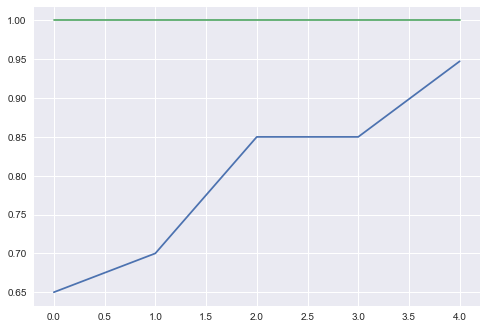

In [22]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.backend import clear_session

INIT_LR = 0.01
EPOCHS = 3000
BATCH_SIZE = 1
split = 5

def buildmodel():
    model = Sequential()
    model.add(Dense(512, input_shape=(768,), activation="sigmoid"))
    model.add(Dense(256, activation="sigmoid"))
    model.add(Dense(128, activation="sigmoid"))
    model.add(Dense(64, activation="sigmoid"))
    model.add(Dense(2, activation="softmax"))
    model.compile(loss="binary_crossentropy", optimizer=SGD(lr=INIT_LR), metrics=["accuracy"])
    
    return model

def get_model_name(fold_num):
    return r'model_{val_acc:.2f}.h5'

kf = KFold(n_splits = split, random_state = 100, shuffle = True)
skf = StratifiedKFold(n_splits = split, random_state = 100, shuffle = True) 

VALIDATION_ACCURACY, VALIDATION_LOSS, ACCURACY = [], [], []

save_dir = r"C:\Users\Admin\PycharmProjects\Kognitive NTI\Module 1\Task 3\saved_models\\"
fold_var = 1

for train_i, test_i in kf.split(x, y):
    
    train_x, train_y, test_x, test_y = x[train_i], y[train_i], x[test_i], y[test_i]

    model = buildmodel()
    checkpoint = ModelCheckpoint(save_dir + get_model_name(fold_var), monitor='val_acc', verbose=0, 
                                 save_best_only=True, mode='max')

    history = model.fit(train_x, train_y, validation_data=(test_x, test_y), 
                        epochs=EPOCHS, 
                        callbacks=[checkpoint])

    VALIDATION_ACCURACY.append(max(history.history['val_acc']))
    ACCURACY.append(max(history.history['acc']))
    VALIDATION_LOSS.append(history.history['loss'])
    clear_session()
    
    fold_var += 1

print()
print('val_acc')
print(VALIDATION_ACCURACY)
print(sum(VALIDATION_ACCURACY) / len(VALIDATION_ACCURACY))
plt.plot(VALIDATION_ACCURACY)
print("acc")
print(ACCURACY)
print(sum(ACCURACY) / len(ACCURACY))
plt.plot(ACCURACY)

In [9]:
from tensorflow import keras
import numpy as np
model = keras.models.load_model(r'C:\Users\Admin\PycharmProjects\Kognitive NTI\Module 1\Task 3\saved_models\model_0.95.h5')

data = []
file = open("my_sig.txt")

for sig in file.read().split('\n\n'):
    arr = np.array(sig.split(), dtype='int16')
    data.append(arr)

data = np.array(list(map(getF, data)))

pred = model.predict(data)
pred = np.array(list(map(lambda p: 1 if p[0] > p[1] else 2, pred)))
file.close()
print(' '.join(list(map(str, pred))))

2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 2 1 2 1 2 1 1 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2
